In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places,geo_tools, bloomdrivers as bd, evaltools as et
import xarray as xr
import datetime as dt
%matplotlib inline

In [2]:
# Load watermasks for pre- and post-September 2011 HRDPS grid

Watermask1 = xr.open_dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/GEM_watermask_for_gem_files_pre_22sep11.nc')
Watermask2 = xr.open_dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/GEM_watermask_for_gem_files_22sep11_onward.nc')

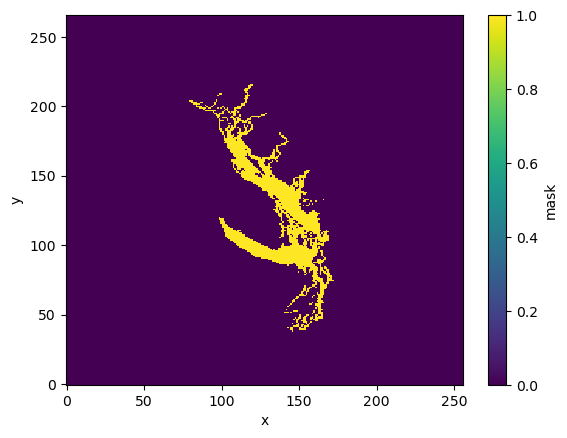

In [3]:
Watermask1.mask.plot()

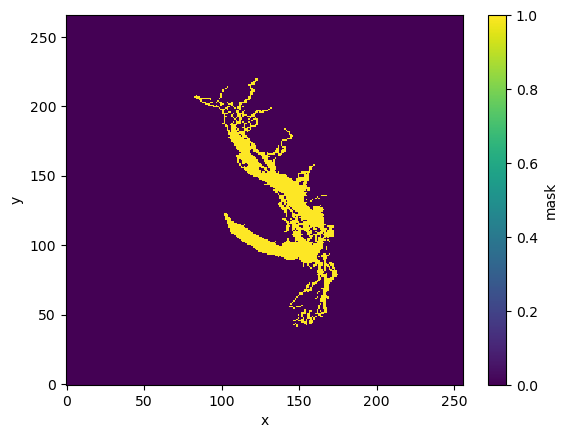

In [4]:
Watermask2.mask.plot()

In [5]:
# get grid corners (use 2015, pre Sept 22, 2011 and post Sept 22 2011 files)

<class 'netCDF4._netCDF4.Variable'>
float32 u_wind(time_counter, y, x)
    _FillValue: nan
    level: 10 m above surface
    long_name: U-Component of Wind
    standard_name: x_wind
    units: m/s
    ioos_category: wind speed and direction
unlimited dimensions: time_counter
current shape = (24, 266, 256)
filling on


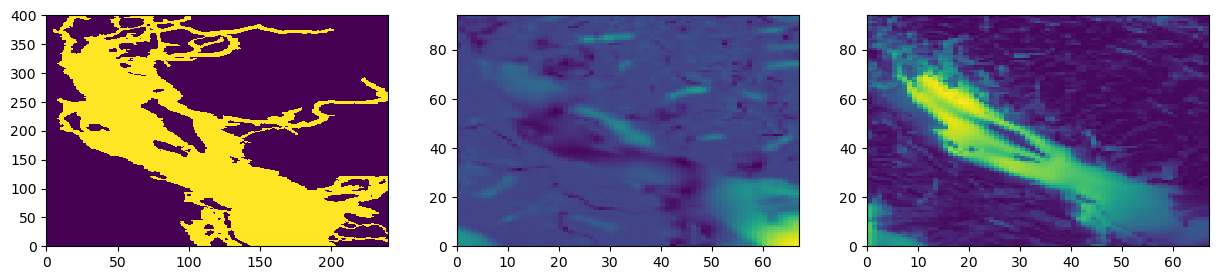

In [6]:
fig,ax=plt.subplots(1,3,figsize=(15,3))
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as mesh:
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]
    tmask=mesh.variables['tmask'][0,:,:,:]
    ax[0].pcolormesh(mesh.variables['tmask'][0,0,400:800,110:350])
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2015m03d01.nc') as g:
    ops_lon=g.variables['nav_lon'][:,:]
    ops_lat=g.variables['nav_lat'][:,:]
    ax[1].pcolormesh((g.variables['u_wind'][0,119:213,96:163]**2+\
                      g.variables['v_wind'][0,119:213,96:163]**2)**(1/2))
    #.pcolormesh(g.variables[])
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2011m09d21.nc') as g: 
    gl1_lon=g.variables['nav_lon'][:,:]
    gl1_lat=g.variables['nav_lat'][:,:]
    ax[2].pcolormesh((g.variables['u_wind'][0,119:213,96:163]**2+\
                      g.variables['v_wind'][0,119:213,96:163]**2)**(1/2))
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2011m09d22.nc') as g: 
    gl2_lon=g.variables['nav_lon'][:,:]
    gl2_lat=g.variables['nav_lat'][:,:]
    ax[2].pcolormesh((g.variables['u_wind'][0,119:213,96:163]**2+\
                      g.variables['v_wind'][0,119:213,96:163]**2)**(1/2))
    print(g.variables['u_wind'])

In [7]:
ll_lon=navlon[400,110]
lr_lon=navlon[400,350]
ul_lon=navlon[800,110]
ur_lon=navlon[800,350]
ll_lat=navlat[400,110]
lr_lat=navlat[400,350]
ul_lat=navlat[800,110]
ur_lat=navlat[800,350]

In [8]:
(ll_j_ops,ll_i_ops)=geo_tools.find_closest_model_point(ll_lon,ll_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(lr_j_ops,lr_i_ops)=geo_tools.find_closest_model_point(lr_lon,lr_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(ul_j_ops,ul_i_ops)=geo_tools.find_closest_model_point(ul_lon,ul_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(ur_j_ops,ur_i_ops)=geo_tools.find_closest_model_point(ur_lon,ur_lat,ops_lon-360,ops_lat,grid='GEM2.5')
print((ll_j_ops,ll_i_ops),(lr_j_ops,lr_i_ops),(ul_j_ops,ul_i_ops),(ur_j_ops,ur_i_ops))

(119, 121) (134, 163) (200, 96) (213, 136)


In [9]:
(ll_j_gl1,ll_i_gl1)=geo_tools.find_closest_model_point(ll_lon,ll_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
(lr_j_gl1,lr_i_gl1)=geo_tools.find_closest_model_point(lr_lon,lr_lat,gl1_lon-360,gl2_lat,grid='GEM2.5')
(ul_j_gl1,ul_i_gl1)=geo_tools.find_closest_model_point(ul_lon,ul_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
(ur_j_gl1,ur_i_gl1)=geo_tools.find_closest_model_point(ur_lon,ur_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
print((ll_j_gl1,ll_i_gl1),(lr_j_gl1,lr_i_gl1),(ul_j_gl1,ul_i_gl1),(ur_j_gl1,ur_i_gl1))

(114, 121) (132, 161) (189, 96) (202, 134)


In [10]:
(ll_j_gl2,ll_i_gl2)=geo_tools.find_closest_model_point(ll_lon,ll_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(lr_j_gl2,lr_i_gl2)=geo_tools.find_closest_model_point(lr_lon,lr_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(ul_j_gl2,ul_i_gl2)=geo_tools.find_closest_model_point(ul_lon,ul_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(ur_j_gl2,ur_i_gl2)=geo_tools.find_closest_model_point(ur_lon,ur_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
print((ll_j_gl2,ll_i_gl2),(lr_j_gl2,lr_i_gl2),(ul_j_gl2,ul_i_gl2),(ur_j_gl2,ur_i_gl2))

(117, 124) (131, 163) (193, 99) (205, 137)


In [11]:
# ops: use j: 119:213, i: 96:163
# gl1: use j: 114:202, i: 96:161
# gl2: use j: 117:205, i: 99:163

In [12]:
def getWindVars(day):
    if day>dt.datetime(2014,12,1): #or day.year>2014
        opsdir='/results/forcing/atmospheric/GEM2.5/operational/'
        nam_fmt='ops'
        jlims=(119,213)
        ilims=(96,163)
    elif day<dt.datetime(2011,9,22):
        opsdir='/results/forcing/atmospheric/GEM2.5/gemlam'
        nam_fmt='gemlam'
        jlims=(114,202)
        ilims=(96,161)
    else:
        opsdir='/results/forcing/atmospheric/GEM2.5/gemlam'
        nam_fmt='gemlam'
        jlims=(117,205)
        ilims=(99,163)
    return opsdir, nam_fmt, jlims,ilims

/tmp/ipykernel_1807168/3000062760.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],shading='auto')


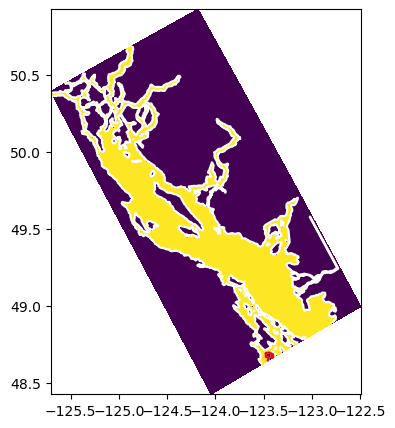

In [13]:
fig,ax=plt.subplots(1,1,figsize=(4,5))
ax.pcolormesh(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],shading='auto')
cl=ax.contour(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],[.5],colors='w')
plt.plot(cl.allsegs[0][0][:,0],cl.allsegs[0][0][:,1],'r-')

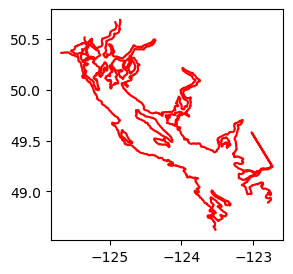

In [14]:
fig,ax=plt.subplots(1,1,figsize=(3,3))
lens=list()
modlines=list()
for ii in range(0,len(cl.allsegs[0])):
    lens.append(len(cl.allsegs[0][ii][:,1]))
    #if np.min(cl.allsegs[0][ii][:,1])<49.2 and np.max(cl.allsegs[0][ii][:,1])>50:
    if len(cl.allsegs[0][ii][:,1])>100:
        #print(ii)
        ax.plot(cl.allsegs[0][ii][:,0],cl.allsegs[0][ii][:,1],'r-')
        modlines.append((cl.allsegs[0][ii][:,0],cl.allsegs[0][ii][:,1]))

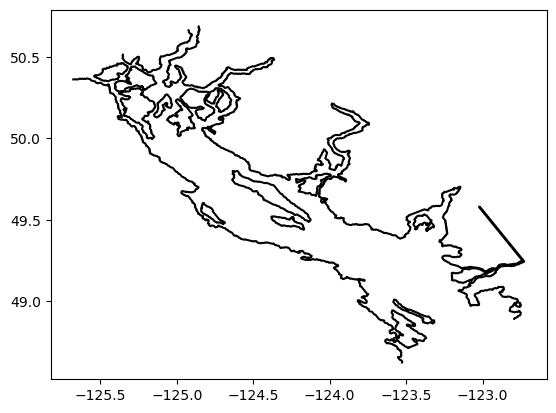

In [15]:
for (lons,lats) in modlines:
    plt.plot(lons,lats,'k-')

In [16]:
opslines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,ops_lon-360,ops_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    opslines.append((x[:,0],x[:,1]))

In [17]:
gl1lines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,gl1_lon-360,gl1_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    gl1lines.append((x[:,0],x[:,1]))

In [18]:
gl2lines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,gl2_lon-360,gl2_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    gl2lines.append((x[:,0],x[:,1]))

In [19]:
# extract march mean wind from one of each type of file:
## ops, 2015
year=2015
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
U3ops=(fu**2+fv**2)**(1/2) ## use 3/2 to get wind speed cubed
U3opsmean=np.mean(U3ops,0)

## gl1, 2007
year=2007
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
U3gl1=(fu**2+fv**2)**(1/2)
U3gl1mean=np.mean(U3gl1,0)

## gl2, 2012
year=2012
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
U3gl2=(fu**2+fv**2)**(1/2)
U3gl2mean=np.mean(U3gl2,0)

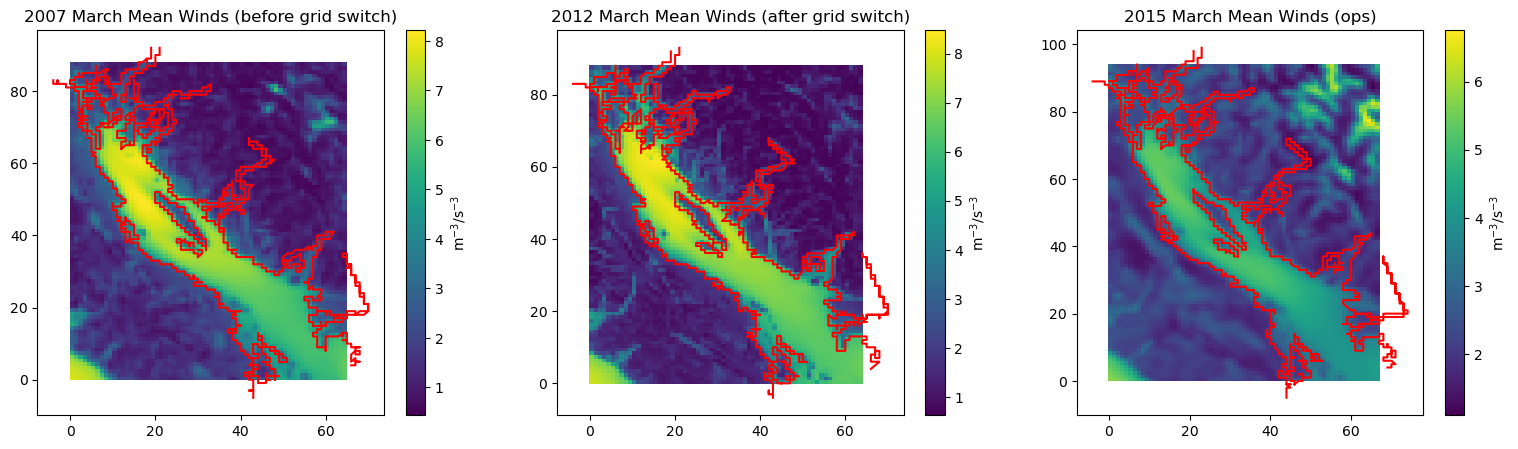

In [20]:
fig,ax=plt.subplots(1,3,figsize=(19,5))


iax=ax[0]
iax.set_title('2007 March Mean Winds (before grid switch)')
m=iax.pcolormesh(U3gl1mean)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
for (jj,ii) in gl1lines:
    iax.plot(ii-96,jj-114,'r-')

iax=ax[1]
iax.set_title('2012 March Mean Winds (after grid switch)')
m=iax.pcolormesh(U3gl2mean)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
for (jj,ii) in gl2lines:
    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[2]
iax.set_title('2015 March Mean Winds (ops)')
m=iax.pcolormesh(U3opsmean)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
for (jj,ii) in opslines:
    iax.plot(ii-96,jj-119,'r-')


## Test to make sure the land mask works

In [21]:
year=2008
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,2),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1]))for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
test=(fu**2+fv**2)**(1/2)
testmean=np.mean(test,0)

#
#.where(HRDPS.landmask)

In [22]:
test2008=np.nanmean(testmean)

In [23]:
fu.shape

(24, 88, 65)

In [24]:
fs[0]['u_wind'].shape

(24, 266, 256)

In [25]:
Watermask1.mask.shape

(266, 256)

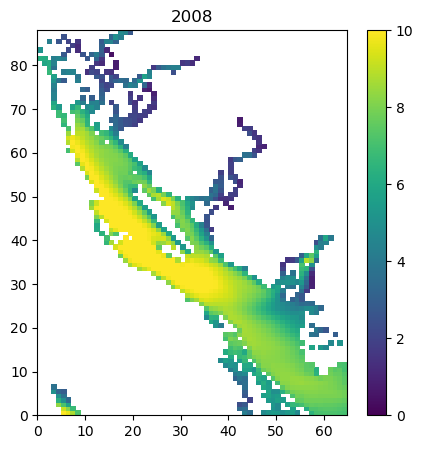

In [26]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
vmin=0
vmax=10

iax=ax
iax.set_title('2008')
m=iax.pcolormesh(testmean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

## January

In [27]:
# extract march mean wind from one of each type of file:

## gl1, 2007
#year=2007
#day=dt.datetime(year,1,1)
#opsdir, namfmt, jlims, ilims = getWindVars(day)
#flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
#                           flen=1,ftype='None',tres=24);
#fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
#fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
#fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
#gl12007=(fu**2+fv**2)**(1/2)
#margl12007mean=np.mean(gl12007,0)

## gl1, 2008
year=2008
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2008=(fujan2008**2+fvjan2008**2)**(1/2)
jan_ws2008mean=np.mean(jan_ws2008,0)
jan_wdir2008 = np.rad2deg(np.arctan2(fvjan2008, fujan2008)) - 90   # CCW from N
jan_wdir2008mean=np.mean(jan_wdir2008,0)

## gl1, 2007
year=2009
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2009=(fujan2009**2+fvjan2009**2)**(1/2)
jan_ws2009mean=np.mean(jan_ws2009,0)
jan_wdir2009 = np.rad2deg(np.arctan2(fvjan2009, fujan2009)) - 90   # CCW from N
jan_wdir2009mean=np.mean(jan_wdir2009,0)

## gl1, 2007
year=2010
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2010=(fujan2010**2+fvjan2010**2)**(1/2)
jan_ws2010mean=np.mean(jan_ws2010,0)
jan_wdir2010 = np.rad2deg(np.arctan2(fvjan2010, fujan2010)) - 90   # CCW from N
jan_wdir2010mean=np.mean(jan_wdir2010,0)

## gl1, 2007
year=2011
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2011=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2011=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2011=(fujan2011**2+fvjan2011**2)**(1/2)
jan_ws2011mean=np.mean(jan_ws2011,0)
jan_wdir2011 = np.rad2deg(np.arctan2(fvjan2011, fujan2011)) - 90   # CCW from N
jan_wdir2011mean=np.mean(jan_wdir2011,0)

## gl1, 2007
year=2012
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2012=(fujan2012**2+fvjan2012**2)**(1/2)
jan_ws2012mean=np.mean(jan_ws2012,0)
jan_wdir2012 = np.rad2deg(np.arctan2(fvjan2012, fujan2012)) - 90   # CCW from N
jan_wdir2012mean=np.mean(jan_wdir2012,0)

## gl1, 2007
year=2013
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2013=(fujan2013**2+fvjan2013**2)**(1/2)
jan_ws2013mean=np.mean(jan_ws2013,0)
jan_wdir2013 = np.rad2deg(np.arctan2(fvjan2013, fujan2013)) - 90   # CCW from N
jan_wdir2013mean=np.mean(jan_wdir2013,0)

## gl1, 2007
year=2014
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2014=(fujan2014**2+fvjan2014**2)**(1/2)
jan_ws2014mean=np.mean(jan_ws2014,0)
jan_wdir2014 = np.rad2deg(np.arctan2(fvjan2014, fujan2014)) - 90   # CCW from N
jan_wdir2014mean=np.mean(jan_wdir2014,0)

## gl1, 2007
year=2015
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2015=(fujan2015**2+fvjan2015**2)**(1/2)
jan_ws2015mean=np.mean(jan_ws2015,0)
jan_wdir2015 = np.rad2deg(np.arctan2(fvjan2015, fujan2015)) - 90   # CCW from N
jan_wdir2015mean=np.mean(jan_wdir2015,0)

## ops, 2015
year=2016
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2016=(fujan2016**2+fvjan2016**2)**(1/2)
jan_ws2016mean=np.mean(jan_ws2016,0)
jan_wdir2016 = np.rad2deg(np.arctan2(fvjan2016, fujan2016)) - 90   # CCW from N
jan_wdir2016mean=np.mean(jan_wdir2016,0)

## gl1, 2007
year=2017
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2017=(fujan2017**2+fvjan2017**2)**(1/2)
jan_ws2017mean=np.mean(jan_ws2017,0)
jan_wdir2017 = np.rad2deg(np.arctan2(fvjan2017, fujan2017)) - 90   # CCW from N
jan_wdir2017mean=np.mean(jan_wdir2017,0)

## gl1, 2007
year=2018
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2018=(fujan2018**2+fvjan2018**2)**(1/2)
jan_ws2018mean=np.mean(jan_ws2018,0)
jan_wdir2018 = np.rad2deg(np.arctan2(fvjan2018, fujan2018)) - 90   # CCW from N
jan_wdir2018mean=np.mean(jan_wdir2018,0)

## gl1, 2007
year=2019
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2019=(fujan2019**2+fvjan2019**2)**(1/2)
jan_ws2019mean=np.mean(jan_ws2019,0)
jan_wdir2019 = np.rad2deg(np.arctan2(fvjan2019, fujan2019)) - 90   # CCW from N
jan_wdir2019mean=np.mean(jan_wdir2019,0)

## gl1, 2007
year=2020
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2020=(fujan2020**2+fvjan2020**2)**(1/2)
jan_ws2020mean=np.mean(jan_ws2020,0)
jan_wdir2020 = np.rad2deg(np.arctan2(fvjan2020, fujan2020)) - 90   # CCW from N
jan_wdir2020mean=np.mean(jan_wdir2020,0)

In [28]:
#Jan2007=np.nanmean(jan_gl12007mean)
Jan2008=np.nanmean(jan_ws2008mean)
Jan2009=np.nanmean(jan_ws2009mean)
Jan2010=np.nanmean(jan_ws2010mean)
Jan2011=np.nanmean(jan_ws2011mean)
Jan2012=np.nanmean(jan_ws2012mean)
Jan2013=np.nanmean(jan_ws2013mean)
Jan2014=np.nanmean(jan_ws2014mean)
Jan2015=np.nanmean(jan_ws2015mean)
Jan2016=np.nanmean(jan_ws2016mean)
Jan2017=np.nanmean(jan_ws2017mean)
Jan2018=np.nanmean(jan_ws2018mean)
Jan2019=np.nanmean(jan_ws2019mean)
Jan2020=np.nanmean(jan_ws2020mean)

Text(0.5, 0.98, 'January Mean Wind Speed')

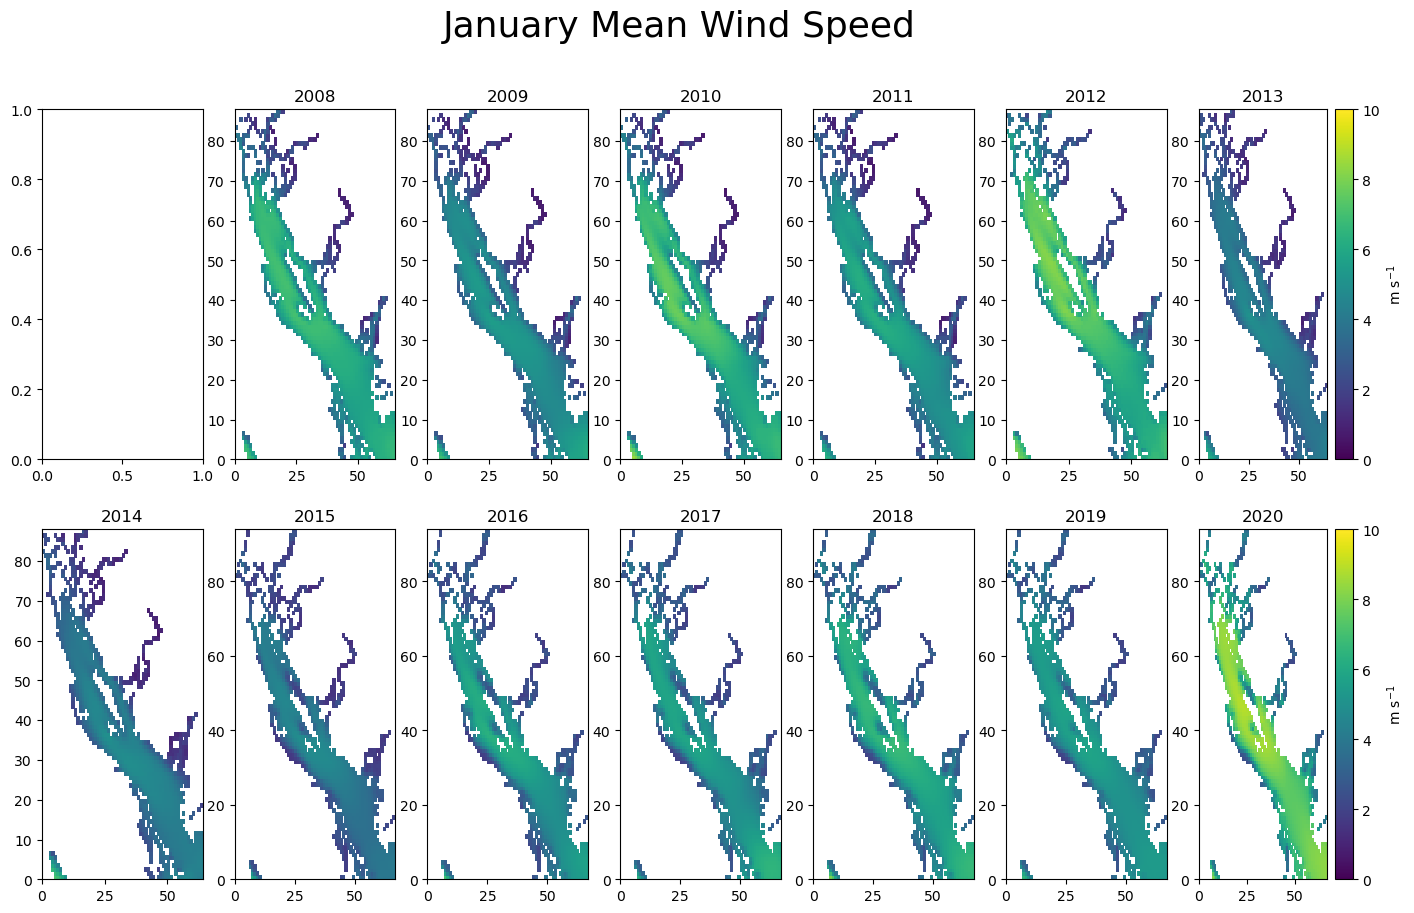

In [30]:
### January winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

#iax=ax[0,0]
#iax.set_title('2007')
#m=iax.pcolormesh(margl12007mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(jan_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(jan_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(jan_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(jan_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(jan_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(jan_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(jan_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(jan_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(jan_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(jan_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(jan_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(jan_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(jan_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('January Mean Wind Speed',fontsize=26)

## February

In [31]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2007=(fufeb2007**2+fvfeb2007**2)**(1/2)
feb_ws2007mean=np.mean(feb_ws2007,0)
feb_wdir2007 = np.rad2deg(np.arctan2(fvfeb2007, fufeb2007)) - 90   # CCW from N
feb_wdir2007mean=np.mean(feb_wdir2007,0)


year=2008
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2008=(fufeb2008**2+fvfeb2008**2)**(1/2)
feb_ws2008mean=np.mean(feb_ws2008,0)
feb_wdir2008 = np.rad2deg(np.arctan2(fvfeb2008, fufeb2008)) - 90   # CCW from N
feb_wdir2008mean=np.mean(feb_wdir2008,0)


year=2009
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2009=(fufeb2009**2+fvfeb2009**2)**(1/2)
feb_ws2009mean=np.mean(feb_ws2009,0)
feb_wdir2009 = np.rad2deg(np.arctan2(fvfeb2009, fufeb2009)) - 90   # CCW from N
feb_wdir2009mean=np.mean(feb_wdir2009,0)


year=2010
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2010=(fufeb2010**2+fvfeb2010**2)**(1/2)
feb_ws2010mean=np.mean(feb_ws2010,0)
feb_wdir2010 = np.rad2deg(np.arctan2(fvfeb2010, fufeb2010)) - 90   # CCW from N
feb_wdir2010mean=np.mean(feb_wdir2010,0)


year=2011
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2011=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2011=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2011=(fufeb2011**2+fvfeb2011**2)**(1/2)
feb_ws2011mean=np.mean(feb_ws2011,0)
feb_wdir2011 = np.rad2deg(np.arctan2(fvfeb2011, fufeb2011)) - 90   # CCW from N
feb_wdir2011mean=np.mean(feb_wdir2011,0)


year=2012
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2012=(fufeb2012**2+fvfeb2012**2)**(1/2)
feb_ws2012mean=np.mean(feb_ws2012,0)
feb_wdir2012 = np.rad2deg(np.arctan2(fvfeb2012, fufeb2012)) - 90   # CCW from N
feb_wdir2012mean=np.mean(feb_wdir2012,0)


year=2013
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2013=(fufeb2013**2+fvfeb2013**2)**(1/2)
feb_ws2013mean=np.mean(feb_ws2013,0)
feb_wdir2013 = np.rad2deg(np.arctan2(fvfeb2013, fufeb2013)) - 90   # CCW from N
feb_wdir2013mean=np.mean(feb_wdir2013,0)


year=2014
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2014=(fufeb2014**2+fvfeb2014**2)**(1/2)
feb_ws2014mean=np.mean(feb_ws2014,0)
feb_wdir2014 = np.rad2deg(np.arctan2(fvfeb2014, fufeb2014)) - 90   # CCW from N
feb_wdir2014mean=np.mean(feb_wdir2014,0)


year=2015
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2015=(fufeb2015**2+fvfeb2015**2)**(1/2)
feb_ws2015mean=np.mean(feb_ws2015,0)
feb_wdir2015 = np.rad2deg(np.arctan2(fvfeb2015, fufeb2015)) - 90   # CCW from N
feb_wdir2015mean=np.mean(feb_wdir2015,0)


year=2016
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2016=(fufeb2016**2+fvfeb2016**2)**(1/2)
feb_ws2016mean=np.mean(feb_ws2016,0)
feb_wdir2016 = np.rad2deg(np.arctan2(fvfeb2016, fufeb2016)) - 90   # CCW from N
feb_wdir2016mean=np.mean(feb_wdir2016,0)


year=2017
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2017=(fufeb2017**2+fvfeb2017**2)**(1/2)
feb_ws2017mean=np.mean(feb_ws2017,0)
feb_wdir2017 = np.rad2deg(np.arctan2(fvfeb2017, fufeb2017)) - 90   # CCW from N
feb_wdir2017mean=np.mean(feb_wdir2017,0)


year=2018
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2018=(fufeb2018**2+fvfeb2018**2)**(1/2)
feb_ws2018mean=np.mean(feb_ws2018,0)
feb_wdir2018 = np.rad2deg(np.arctan2(fvfeb2018, fufeb2018)) - 90   # CCW from N
feb_wdir2018mean=np.mean(feb_wdir2018,0)


year=2019
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2019=(fufeb2019**2+fvfeb2019**2)**(1/2)
feb_ws2019mean=np.mean(feb_ws2019,0)
feb_wdir2019 = np.rad2deg(np.arctan2(fvfeb2019, fufeb2019)) - 90   # CCW from N
feb_wdir2019mean=np.mean(feb_wdir2019,0)


year=2020
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fufeb2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvfeb2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ws2020=(fufeb2020**2+fvfeb2020**2)**(1/2)
feb_ws2020mean=np.mean(feb_ws2020,0)
feb_wdir2020 = np.rad2deg(np.arctan2(fvfeb2020, fufeb2020)) - 90   # CCW from N
feb_wdir2020mean=np.mean(feb_wdir2020,0)

In [32]:
Feb2007=np.nanmean(feb_ws2007mean)
Feb2008=np.nanmean(feb_ws2008mean)
Feb2009=np.nanmean(feb_ws2009mean)
Feb2010=np.nanmean(feb_ws2010mean)
Feb2011=np.nanmean(feb_ws2011mean)
Feb2012=np.nanmean(feb_ws2012mean)
Feb2013=np.nanmean(feb_ws2013mean)
Feb2014=np.nanmean(feb_ws2014mean)
Feb2015=np.nanmean(feb_ws2015mean)
Feb2016=np.nanmean(feb_ws2016mean)
Feb2017=np.nanmean(feb_ws2017mean)
Feb2018=np.nanmean(feb_ws2018mean)
Feb2019=np.nanmean(feb_ws2019mean)
Feb2020=np.nanmean(feb_ws2020mean)

Text(0.5, 0.98, 'February Mean Wind Speed')

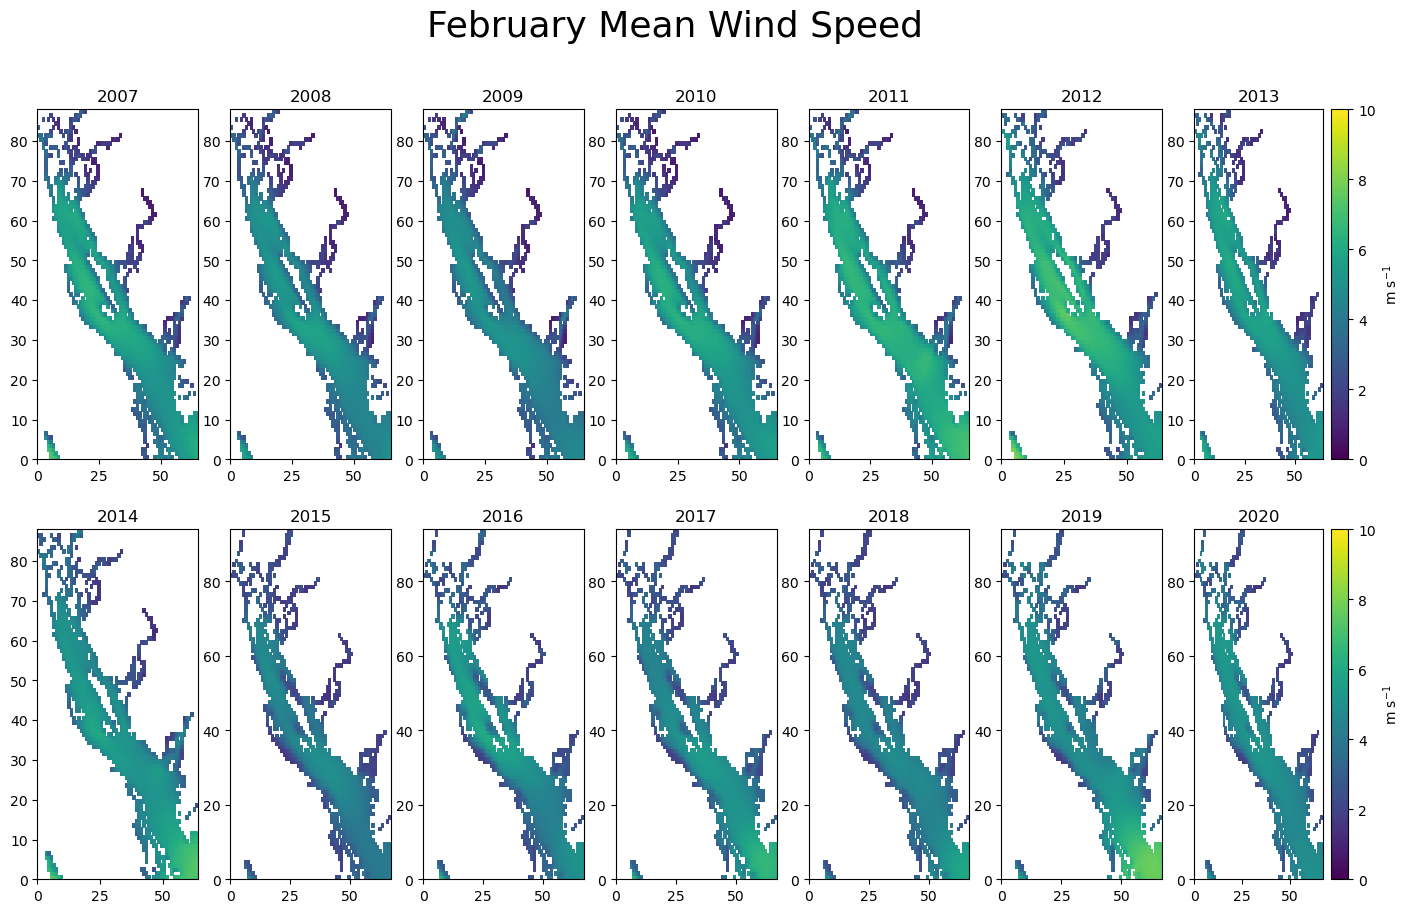

In [33]:
### February winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(feb_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(feb_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(feb_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(feb_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(feb_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(feb_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(feb_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(feb_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(feb_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(feb_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(feb_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(feb_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(feb_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(feb_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('February Mean Wind Speed',fontsize=26)

## March

In [36]:
# extract march mean wind from one of each type of file:

## gl1, 2007
year=2007
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2007=(fumar2007**2+fvmar2007**2)**(1/2)
mar_ws2007mean=np.mean(mar_ws2007,0)
mar_wdir2007 = np.rad2deg(np.arctan2(fvmar2007, fumar2007)) - 90   # CCW from N
mar_wdir2007mean=np.mean(mar_wdir2007,0)

## gl1, 2008
year=2008
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2008=(fumar2008**2+fvmar2008**2)**(1/2)
mar_ws2008mean=np.mean(mar_ws2008,0)
mar_wdir2008 = np.rad2deg(np.arctan2(fvmar2008, fumar2008)) - 90   # CCW from N
mar_wdir2008mean=np.mean(mar_wdir2008,0)

## gl1, 2007
year=2009
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2009=(fumar2009**2+fvmar2009**2)**(1/2)
mar_ws2009mean=np.mean(mar_ws2009,0)
mar_wdir2009 = np.rad2deg(np.arctan2(fvmar2009, fumar2009)) - 90   # CCW from N
mar_wdir2009mean=np.mean(mar_wdir2009,0)

## gl1, 2007
year=2010
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2010=(fumar2010**2+fvmar2010**2)**(1/2)
mar_ws2010mean=np.mean(mar_ws2010,0)
mar_wdir2010 = np.rad2deg(np.arctan2(fvmar2010, fumar2010)) - 90   # CCW from N
mar_wdir2010mean=np.mean(mar_wdir2010,0)

## gl1, 2007
year=2011
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2011=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2011=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2011=(fumar2011**2+fvmar2011**2)**(1/2)
mar_ws2011mean=np.mean(mar_ws2011,0)
mar_wdir2011 = np.rad2deg(np.arctan2(fvmar2011, fumar2011)) - 90   # CCW from N
mar_wdir2011mean=np.mean(mar_wdir2011,0)

## gl1, 2007
year=2012
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2012=(fumar2012**2+fvmar2012**2)**(1/2)
mar_ws2012mean=np.mean(mar_ws2012,0)
mar_wdir2012 = np.rad2deg(np.arctan2(fvmar2012, fumar2012)) - 90   # CCW from N
mar_wdir2012mean=np.mean(mar_wdir2012,0)

## gl1, 2007
year=2013
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2013=(fumar2013**2+fvmar2013**2)**(1/2)
mar_ws2013mean=np.mean(mar_ws2013,0)
mar_wdir2013 = np.rad2deg(np.arctan2(fvmar2013, fumar2013)) - 90   # CCW from N
mar_wdir2013mean=np.mean(mar_wdir2013,0)

## gl1, 2007
year=2014
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2014=(fumar2014**2+fvmar2014**2)**(1/2)
mar_ws2014mean=np.mean(mar_ws2014,0)
mar_wdir2014 = np.rad2deg(np.arctan2(fvmar2014, fumar2014)) - 90   # CCW from N
mar_wdir2014mean=np.mean(mar_wdir2014,0)

## gl1, 2007
year=2015
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2015=(fumar2015**2+fvmar2015**2)**(1/2)
mar_ws2015mean=np.mean(mar_ws2015,0)
mar_wdir2015 = np.rad2deg(np.arctan2(fvmar2015, fumar2015)) - 90   # CCW from N
mar_wdir2015mean=np.mean(mar_wdir2015,0)

## ops, 2015
year=2016
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2016=(fumar2016**2+fvmar2016**2)**(1/2)
mar_ws2016mean=np.mean(mar_ws2016,0)
mar_wdir2016 = np.rad2deg(np.arctan2(fvmar2016, fumar2016)) - 90   # CCW from N
mar_wdir2016mean=np.mean(mar_wdir2016,0)

## gl1, 2007
year=2017
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2017=(fumar2017**2+fvmar2017**2)**(1/2)
mar_ws2017mean=np.mean(mar_ws2017,0)
mar_wdir2017 = np.rad2deg(np.arctan2(fvmar2017, fumar2017)) - 90   # CCW from N
mar_wdir2017mean=np.mean(mar_wdir2017,0)

## gl1, 2007
year=2018
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2018=(fumar2018**2+fvmar2018**2)**(1/2)
mar_ws2018mean=np.mean(mar_ws2018,0)
mar_wdir2018 = np.rad2deg(np.arctan2(fvmar2018, fumar2018)) - 90   # CCW from N
mar_wdir2018mean=np.mean(mar_wdir2018,0)

## gl1, 2007
year=2019
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2019=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2019=(fumar2019**2+fvmar2019**2)**(1/2)
mar_ws2019mean=np.mean(mar_ws2019,0)
mar_wdir2019 = np.rad2deg(np.arctan2(fvmar2019, fumar2019)) - 90   # CCW from N
mar_wdir2019mean=np.mean(mar_wdir2019,0)

## gl1, 2007
year=2020
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumar2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmar2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ws2020=(fumar2020**2+fvmar2020**2)**(1/2)
mar_ws2020mean=np.mean(mar_ws2020,0)
mar_wdir2020 = np.rad2deg(np.arctan2(fvmar2020, fumar2020)) - 90   # CCW from N
mar_wdir2020mean=np.mean(mar_wdir2020,0)

In [38]:
Mar2007=np.nanmean(mar_ws2007mean)
Mar2008=np.nanmean(mar_ws2008mean)
Mar2009=np.nanmean(mar_ws2009mean)
Mar2010=np.nanmean(mar_ws2010mean)
Mar2011=np.nanmean(mar_ws2011mean)
Mar2012=np.nanmean(mar_ws2012mean)
Mar2013=np.nanmean(mar_ws2013mean)
Mar2014=np.nanmean(mar_ws2014mean)
Mar2015=np.nanmean(mar_ws2015mean)
Mar2016=np.nanmean(mar_ws2016mean)
Mar2017=np.nanmean(mar_ws2017mean)
Mar2018=np.nanmean(mar_ws2018mean)
Mar2019=np.nanmean(mar_ws2019mean)
Mar2020=np.nanmean(mar_ws2020mean)

Text(0.5, 0.98, 'March Mean Wind Speed')

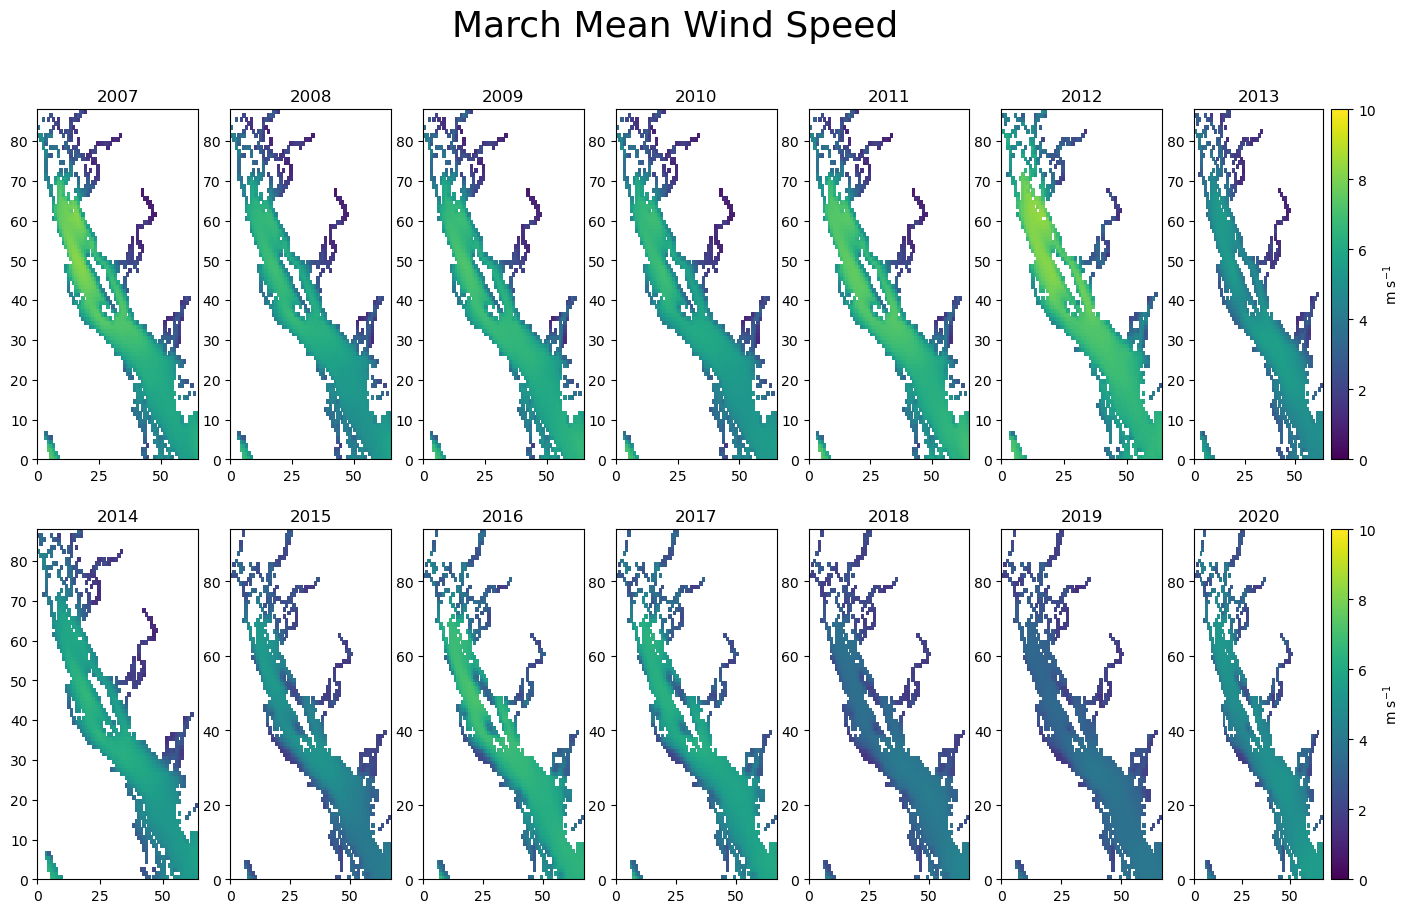

In [39]:
### March winds
fig,ax=plt.subplots(2,7,figsize=(17,10))

vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(mar_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(mar_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(mar_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(mar_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(mar_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(mar_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(mar_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(mar_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(mar_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(mar_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(mar_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(mar_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(mar_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(mar_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('March Mean Wind Speed',fontsize=26)

## April

In [40]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2007=(fuapr2007**2+fvapr2007**2)**(1/2)
apr_ws2007mean=np.mean(apr_ws2007,0)
apr_wdir2007 = np.rad2deg(np.arctan2(fvapr2007, fuapr2007)) - 90   # CCW from N
apr_wdir2007mean=np.mean(apr_wdir2007,0)


year=2008
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2008=(fuapr2008**2+fvapr2008**2)**(1/2)
apr_ws2008mean=np.mean(apr_ws2008,0)
apr_wdir2008 = np.rad2deg(np.arctan2(fvapr2008, fuapr2008)) - 90   # CCW from N
apr_wdir2008mean=np.mean(apr_wdir2008,0)


year=2009
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2009=(fuapr2009**2+fvapr2009**2)**(1/2)
apr_ws2009mean=np.mean(apr_ws2009,0)
apr_wdir2009 = np.rad2deg(np.arctan2(fvapr2009, fuapr2009)) - 90   # CCW from N
apr_wdir2009mean=np.mean(apr_wdir2009,0)


year=2010
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2010=(fuapr2010**2+fvapr2010**2)**(1/2)
apr_ws2010mean=np.mean(apr_ws2010,0)
apr_wdir2010 = np.rad2deg(np.arctan2(fvapr2010, fuapr2010)) - 90   # CCW from N
apr_wdir2010mean=np.mean(apr_wdir2010,0)


year=2011
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2011=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2011=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2011=(fuapr2011**2+fvapr2011**2)**(1/2)
apr_ws2011mean=np.mean(apr_ws2011,0)
apr_wdir2011 = np.rad2deg(np.arctan2(fvapr2011, fuapr2011)) - 90   # CCW from N
apr_wdir2011mean=np.mean(apr_wdir2011,0)


year=2012
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2012=(fuapr2012**2+fvapr2012**2)**(1/2)
apr_ws2012mean=np.mean(apr_ws2012,0)
apr_wdir2012 = np.rad2deg(np.arctan2(fvapr2012, fuapr2012)) - 90   # CCW from N
apr_wdir2012mean=np.mean(apr_wdir2012,0)


year=2013
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2013=(fuapr2013**2+fvapr2013**2)**(1/2)
apr_ws2013mean=np.mean(apr_ws2013,0)
apr_wdir2013 = np.rad2deg(np.arctan2(fvapr2013, fuapr2013)) - 90   # CCW from N
apr_wdir2013mean=np.mean(apr_wdir2013,0)


year=2014
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2014=(fuapr2014**2+fvapr2014**2)**(1/2)
apr_ws2014mean=np.mean(apr_ws2014,0)
apr_wdir2014 = np.rad2deg(np.arctan2(fvapr2014, fuapr2014)) - 90   # CCW from N
apr_wdir20014ean=np.mean(apr_wdir2014,0)


year=2015
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2015=(fuapr2015**2+fvapr2015**2)**(1/2)
apr_ws2015mean=np.mean(apr_ws2015,0)
apr_wdir2015 = np.rad2deg(np.arctan2(fvapr2015, fuapr2015)) - 90   # CCW from N
apr_wdir2015mean=np.mean(apr_wdir2015,0)


year=2016
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2016=(fuapr2016**2+fvapr2016**2)**(1/2)
apr_ws2016mean=np.mean(apr_ws2016,0)
apr_wdir2016 = np.rad2deg(np.arctan2(fvapr2016, fuapr2016)) - 90   # CCW from N
apr_wdir2016mean=np.mean(apr_wdir2016,0)


year=2017
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2017=(fuapr2017**2+fvapr2017**2)**(1/2)
apr_ws2017mean=np.mean(apr_ws2017,0)
apr_wdir2017 = np.rad2deg(np.arctan2(fvapr2017, fuapr2017)) - 90   # CCW from N
apr_wdir2017mean=np.mean(apr_wdir2017,0)


year=2018
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2018=(fuapr2018**2+fvapr2018**2)**(1/2)
apr_ws2018mean=np.mean(apr_ws2018,0)
apr_wdir2018 = np.rad2deg(np.arctan2(fvapr2018, fuapr2018)) - 90   # CCW from N
apr_wdir2018mean=np.mean(apr_wdir2018,0)


year=2019
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2019=(fuapr2019**2+fvapr2019**2)**(1/2)
apr_ws2019mean=np.mean(apr_ws2019,0)
apr_wdir2019 = np.rad2deg(np.arctan2(fvapr2019, fuapr2019)) - 90   # CCW from N
apr_wdir2019mean=np.mean(apr_wdir2019,0)


year=2020
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuapr2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvapr2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ws2020=(fuapr2020**2+fvapr2020**2)**(1/2)
apr_ws2020mean=np.mean(apr_ws2020,0)
apr_wdir2020 = np.rad2deg(np.arctan2(fvapr2020, fuapr2020)) - 90   # CCW from N
apr_wdir2020mean=np.mean(apr_wdir2020,0)

Text(0.5, 0.98, 'April Mean Wind Speed')

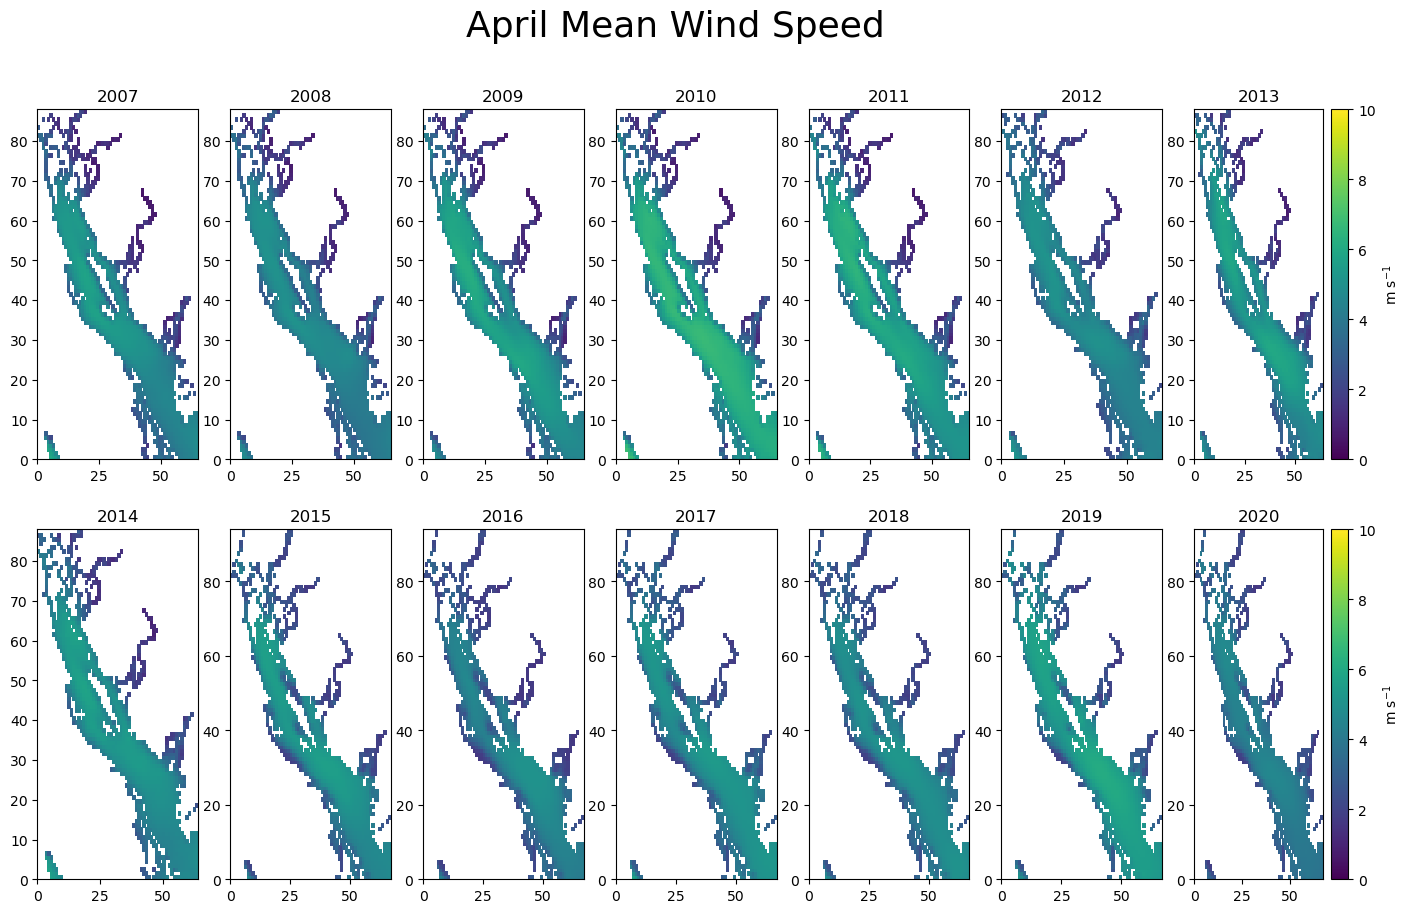

In [41]:
### April winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(apr_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(apr_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(apr_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(apr_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(apr_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(apr_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(apr_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(apr_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(apr_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(apr_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(apr_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(apr_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(apr_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(apr_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('April Mean Wind Speed',fontsize=26)

In [42]:
Apr2007=np.nanmean(apr_ws2007mean)
Apr2008=np.nanmean(apr_ws2008mean)
Apr2009=np.nanmean(apr_ws2009mean)
Apr2010=np.nanmean(apr_ws2010mean)
Apr2011=np.nanmean(apr_ws2011mean)
Apr2012=np.nanmean(apr_ws2012mean)
Apr2013=np.nanmean(apr_ws2013mean)
Apr2014=np.nanmean(apr_ws2014mean)
Apr2015=np.nanmean(apr_ws2015mean)
Apr2016=np.nanmean(apr_ws2016mean)
Apr2017=np.nanmean(apr_ws2017mean)
Apr2018=np.nanmean(apr_ws2018mean)
Apr2019=np.nanmean(apr_ws2019mean)
Apr2020=np.nanmean(apr_ws2020mean)

## May

In [43]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2007=(fumay2007**2+fvmay2007**2)**(1/2)
may_ws2007mean=np.mean(may_ws2007,0)
may_wdir2007 = np.rad2deg(np.arctan2(fvmay2007, fumay2007)) - 90   # CCW from N
may_wdir2007mean=np.mean(may_wdir2007,0)


year=2008
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2008=(fumay2008**2+fvmay2008**2)**(1/2)
may_ws2008mean=np.mean(may_ws2008,0)
may_wdir2008 = np.rad2deg(np.arctan2(fvmay2008, fumay2008)) - 90   # CCW from N
may_wdir2008mean=np.mean(may_wdir2008,0)


year=2009
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2009=(fumay2009**2+fvmay2009**2)**(1/2)
may_ws2009mean=np.mean(may_ws2009,0)
may_wdir2009 = np.rad2deg(np.arctan2(fvmay2009, fumay2009)) - 90   # CCW from N
may_wdir2009mean=np.mean(may_wdir2009,0)


year=2010
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2010=(fumay2010**2+fvmay2010**2)**(1/2)
may_ws2010mean=np.mean(may_ws2010,0)
may_wdir2010 = np.rad2deg(np.arctan2(fvmay2010, fumay2010)) - 90   # CCW from N
may_wdir2010mean=np.mean(may_wdir2010,0)


year=2011
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2011=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2011=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2011=(fumay2011**2+fvmay2011**2)**(1/2)
may_ws2011mean=np.mean(may_ws2011,0)
may_wdir2011 = np.rad2deg(np.arctan2(fvmay2011, fumay2011)) - 90   # CCW from N
may_wdir2011mean=np.mean(may_wdir2011,0)


year=2012
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2012=(fumay2012**2+fvmay2012**2)**(1/2)
may_ws2012mean=np.mean(may_ws2012,0)
may_wdir2012 = np.rad2deg(np.arctan2(fvmay2012, fumay2012)) - 90   # CCW from N
may_wdir2012mean=np.mean(may_wdir2012,0)


year=2013
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2013=(fumay2013**2+fvmay2013**2)**(1/2)
may_ws2013mean=np.mean(may_ws2013,0)
may_wdir2013 = np.rad2deg(np.arctan2(fvmay2013, fumay2013)) - 90   # CCW from N
may_wdir2013mean=np.mean(may_wdir2013,0)


year=2014
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2014=(fumay2014**2+fvmay2014**2)**(1/2)
may_ws2014mean=np.mean(may_ws2014,0)
may_wdir2014 = np.rad2deg(np.arctan2(fvmay2014, fumay2014)) - 90   # CCW from N
may_wdir2014mean=np.mean(may_wdir2014,0)


year=2015
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2015=(fumay2015**2+fvmay2015**2)**(1/2)
may_ws2015mean=np.mean(may_ws2015,0)
may_wdir2015 = np.rad2deg(np.arctan2(fvmay2015, fumay2015)) - 90   # CCW from N
may_wdir2015mean=np.mean(may_wdir2015,0)


year=2016
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2016=(fumay2016**2+fvmay2016**2)**(1/2)
may_ws2016mean=np.mean(may_ws2016,0)
may_wdir2016 = np.rad2deg(np.arctan2(fvmay2016, fumay2016)) - 90   # CCW from N
may_wdir2016mean=np.mean(may_wdir2016,0)


year=2017
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2017=(fumay2017**2+fvmay2017**2)**(1/2)
may_ws2017mean=np.mean(may_ws2017,0)
may_wdir2017 = np.rad2deg(np.arctan2(fvmay2017, fumay2017)) - 90   # CCW from N
may_wdir2017mean=np.mean(may_wdir2017,0)


year=2018
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2018=(fumay2018**2+fvmay2018**2)**(1/2)
may_ws2018mean=np.mean(may_ws2018,0)
may_wdir2018 = np.rad2deg(np.arctan2(fvmay2018, fumay2018)) - 90   # CCW from N
may_wdir2018mean=np.mean(may_wdir2018,0)


year=2019
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2019=(fumay2019**2+fvmay2019**2)**(1/2)
may_ws2019mean=np.mean(may_ws2019,0)
may_wdir2019 = np.rad2deg(np.arctan2(fvmay2019, fumay2019)) - 90   # CCW from N
may_wdir2019mean=np.mean(may_wdir2019,0)


year=2020
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fumay2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvmay2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ws2020=(fumay2020**2+fvmay2020**2)**(1/2)
may_ws2020mean=np.mean(may_ws2020,0)
may_wdir2020 = np.rad2deg(np.arctan2(fvmay2020, fumay2020)) - 90   # CCW from N
may_wdir2020mean=np.mean(may_wdir2020,0)

Text(0.5, 0.98, 'May Mean Wind Speed')

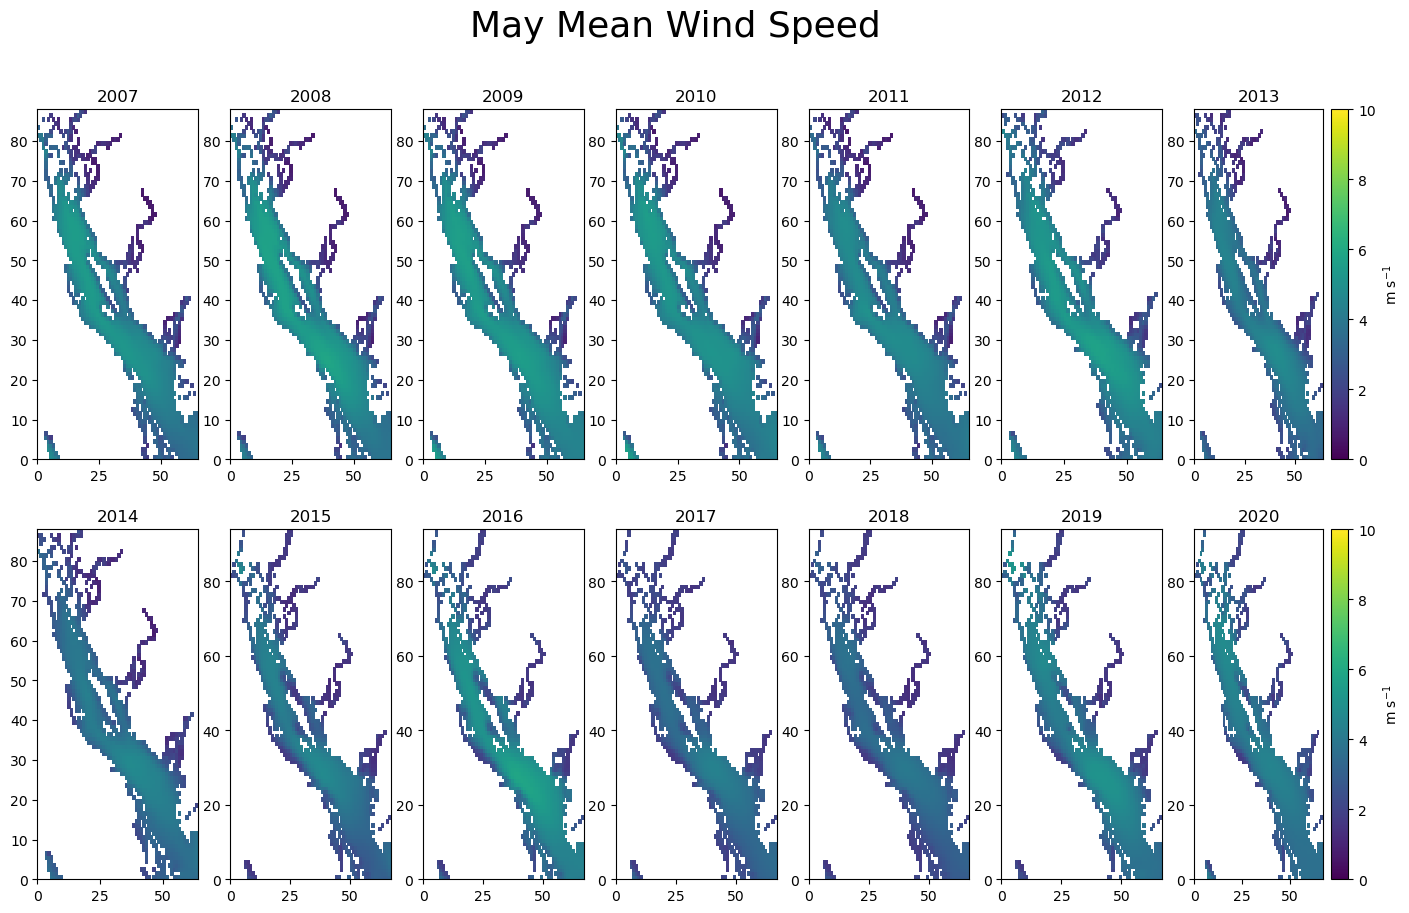

In [44]:
### May winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(may_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(may_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(may_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(may_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(may_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(may_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(may_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(may_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(may_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(may_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(may_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(may_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(may_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(may_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('May Mean Wind Speed',fontsize=26)

In [45]:
May2007=np.nanmean(may_ws2007mean)
May2008=np.nanmean(may_ws2008mean)
May2009=np.nanmean(may_ws2009mean)
May2010=np.nanmean(may_ws2010mean)
May2011=np.nanmean(may_ws2011mean)
May2012=np.nanmean(may_ws2012mean)
May2013=np.nanmean(may_ws2013mean)
May2014=np.nanmean(may_ws2014mean)
May2015=np.nanmean(may_ws2015mean)
May2016=np.nanmean(may_ws2016mean)
May2017=np.nanmean(may_ws2017mean)
May2018=np.nanmean(may_ws2018mean)
May2019=np.nanmean(may_ws2019mean)
May2020=np.nanmean(may_ws2020mean)

## June

In [47]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2007=(fujun2007**2+fvjun2007**2)**(1/2)
jun_ws2007mean=np.mean(jun_ws2007,0)
jun_wdir2007 = np.rad2deg(np.arctan2(fvjun2007, fujun2007)) - 90   # CCW from N
jun_wdir2007mean=np.mean(jun_wdir2007,0)


year=2008
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2008=(fujun2008**2+fvjun2008**2)**(1/2)
jun_ws2008mean=np.mean(jun_ws2008,0)
jun_wdir2008 = np.rad2deg(np.arctan2(fvjun2008, fujun2008)) - 90   # CCW from N
jun_wdir2008mean=np.mean(jun_wdir2008,0)


year=2009
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2009=(fujun2009**2+fvjun2009**2)**(1/2)
jun_ws2009mean=np.mean(jun_ws2009,0)
jun_wdir2009 = np.rad2deg(np.arctan2(fvjun2009, fujun2009)) - 90   # CCW from N
jun_wdir2009mean=np.mean(jun_wdir2009,0)


year=2010
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2010=(fujun2010**2+fvjun2010**2)**(1/2)
jun_ws2010mean=np.mean(jun_ws2010,0)
jun_wdir2010 = np.rad2deg(np.arctan2(fvjun2010, fujun2010)) - 90   # CCW from N
jun_wdir2010mean=np.mean(jun_wdir2010,0)


year=2011
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2011=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2011=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2011=(fujun2011**2+fvjun2011**2)**(1/2)
jun_ws2011mean=np.mean(jun_ws2011,0)
jun_wdir2011 = np.rad2deg(np.arctan2(fvjun2011, fujun2011)) - 90   # CCW from N
jun_wdir2011mean=np.mean(jun_wdir2011,0)


year=2012
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2012=(fujun2012**2+fvjun2012**2)**(1/2)
jun_ws2012mean=np.mean(jun_ws2012,0)
jun_wdir2012 = np.rad2deg(np.arctan2(fvjun2012, fujun2012)) - 90   # CCW from N
jun_wdir2012mean=np.mean(jun_wdir2012,0)


year=2013
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2013=(fujun2013**2+fvjun2013**2)**(1/2)
jun_ws2013mean=np.mean(jun_ws2013,0)
jun_wdir2013 = np.rad2deg(np.arctan2(fvjun2013, fujun2013)) - 90   # CCW from N
jun_wdir2013mean=np.mean(jun_wdir2013,0)


year=2014
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2014=(fujun2014**2+fvjun2014**2)**(1/2)
jun_ws2014mean=np.mean(jun_ws2014,0)
jun_wdir2014 = np.rad2deg(np.arctan2(fvjun2014, fujun2014)) - 90   # CCW from N
jun_wdir2014mean=np.mean(jun_wdir2014,0)


year=2015
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2015=(fujun2015**2+fvjun2015**2)**(1/2)
jun_ws2015mean=np.mean(jun_ws2015,0)
jun_wdir2015 = np.rad2deg(np.arctan2(fvjun2015, fujun2015)) - 90   # CCW from N
jun_wdir2015mean=np.mean(jun_wdir2015,0)


year=2016
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2016=(fujun2016**2+fvjun2016**2)**(1/2)
jun_ws2016mean=np.mean(jun_ws2016,0)
jun_wdir2016 = np.rad2deg(np.arctan2(fvjun2016, fujun2016)) - 90   # CCW from N
jun_wdir2016mean=np.mean(jun_wdir2016,0)


year=2017
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2017=(fujun2017**2+fvjun2017**2)**(1/2)
jun_ws2017mean=np.mean(jun_ws2017,0)
jun_wdir2017 = np.rad2deg(np.arctan2(fvjun2017, fujun2017)) - 90   # CCW from N
jun_wdir2017mean=np.mean(jun_wdir2017,0)


year=2018
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2018=(fujun2018**2+fvjun2018**2)**(1/2)
jun_ws2018mean=np.mean(jun_ws2018,0)
jun_wdir2018 = np.rad2deg(np.arctan2(fvjun2018, fujun2018)) - 90   # CCW from N
jun_wdir2018mean=np.mean(jun_wdir2018,0)


year=2019
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2019=(fujun2019**2+fvjun2019**2)**(1/2)
jun_ws2019mean=np.mean(jun_ws2019,0)
jun_wdir2019 = np.rad2deg(np.arctan2(fvjun2019, fujun2019)) - 90   # CCW from N
jun_wdir2019mean=np.mean(jun_wdir2019,0)


year=2020
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujun2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjun2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ws2020=(fujun2020**2+fvjun2020**2)**(1/2)
jun_ws2020mean=np.mean(jun_ws2020,0)
jun_wdir2020 = np.rad2deg(np.arctan2(fvjun2020, fujun2020)) - 90   # CCW from N
jun_wdir2020mean=np.mean(jun_wdir2020,0)

Text(0.5, 0.98, 'June Mean Wind Speed')

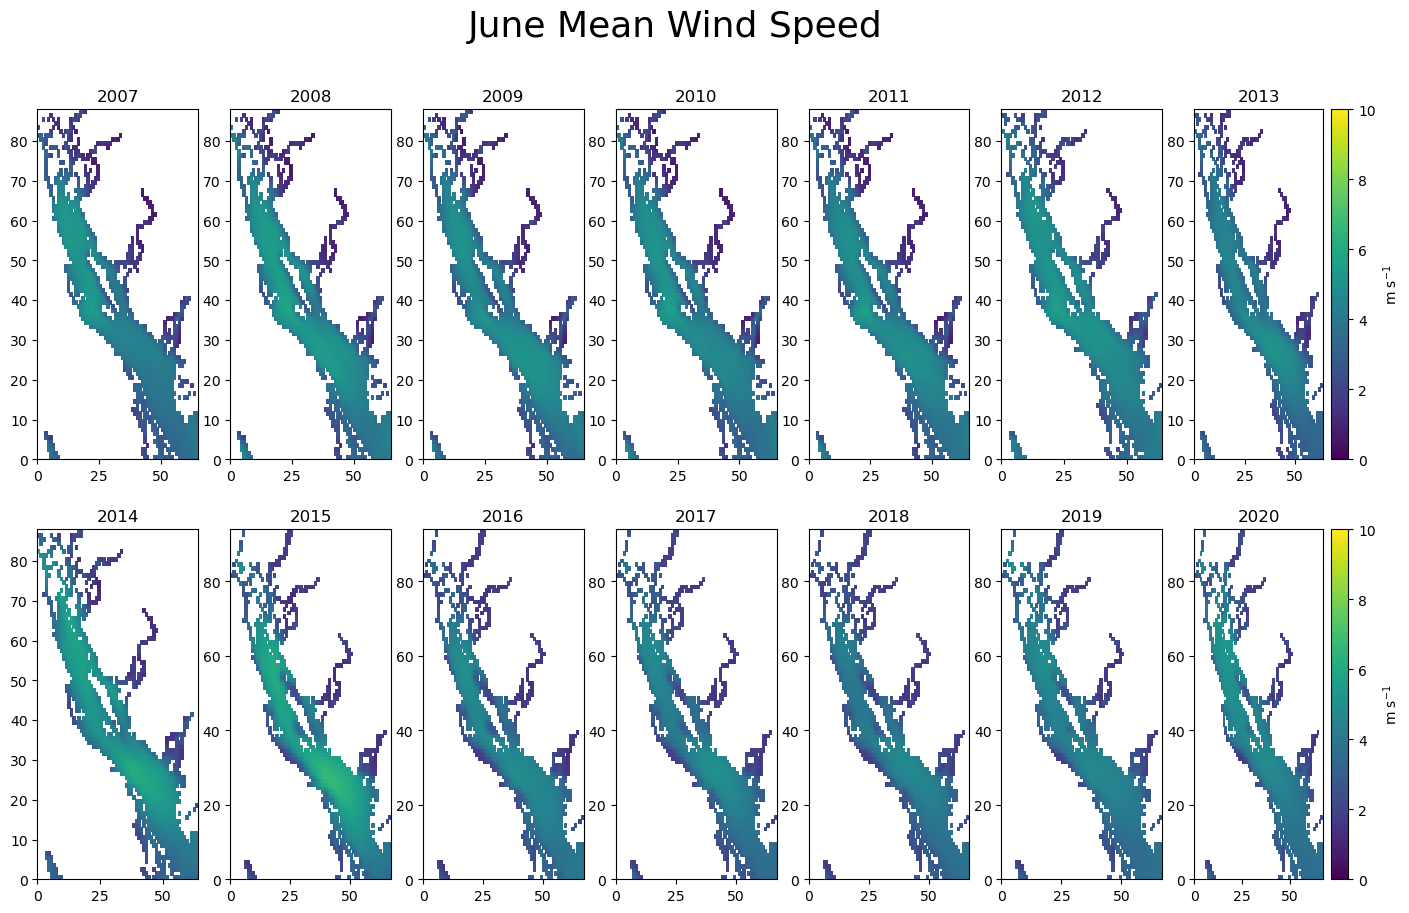

In [48]:
### June winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(jun_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(jun_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(jun_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(jun_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(jun_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(jun_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(jun_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(jun_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(jun_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(jun_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(jun_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(jun_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(jun_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(jun_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('June Mean Wind Speed',fontsize=26)

In [49]:
Jun2007=np.nanmean(jun_ws2007mean)
Jun2008=np.nanmean(jun_ws2008mean)
Jun2009=np.nanmean(jun_ws2009mean)
Jun2010=np.nanmean(jun_ws2010mean)
Jun2011=np.nanmean(jun_ws2011mean)
Jun2012=np.nanmean(jun_ws2012mean)
Jun2013=np.nanmean(jun_ws2013mean)
Jun2014=np.nanmean(jun_ws2014mean)
Jun2015=np.nanmean(jun_ws2015mean)
Jun2016=np.nanmean(jun_ws2016mean)
Jun2017=np.nanmean(jun_ws2017mean)
Jun2018=np.nanmean(jun_ws2018mean)
Jun2019=np.nanmean(jun_ws2019mean)
Jun2020=np.nanmean(jun_ws2020mean)

## July

In [51]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2007=(fujul2007**2+fvjul2007**2)**(1/2)
jul_ws2007mean=np.mean(jul_ws2007,0)
jul_wdir2007 = np.rad2deg(np.arctan2(fvjul2007, fujul2007)) - 90   # CCW from N
jul_wdir2007mean=np.mean(jul_wdir2007,0)


year=2008
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2008=(fujul2008**2+fvjul2008**2)**(1/2)
jul_ws2008mean=np.mean(jun_ws2008,0)
jul_wdir2008 = np.rad2deg(np.arctan2(fvjul2008, fujul2008)) - 90   # CCW from N
jul_wdir2008mean=np.mean(jul_wdir2008,0)


year=2009
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2009=(fujul2009**2+fvjul2009**2)**(1/2)
jul_ws2009mean=np.mean(jun_ws2009,0)
jul_wdir2009 = np.rad2deg(np.arctan2(fvjul2009, fujul2009)) - 90   # CCW from N
jul_wdir2009mean=np.mean(jul_wdir2009,0)


year=2010
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2010=(fujul2010**2+fvjul2010**2)**(1/2)
jul_ws2010mean=np.mean(jun_ws2010,0)
jul_wdir2010 = np.rad2deg(np.arctan2(fvjul2010, fujul2010)) - 90   # CCW from N
jul_wdir2010mean=np.mean(jul_wdir2010,0)


year=2011
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2011=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2011=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2011=(fujul2011**2+fvjul2011**2)**(1/2)
jul_ws2011mean=np.mean(jun_ws2011,0)
jul_wdir2011 = np.rad2deg(np.arctan2(fvjul2011, fujul2011)) - 90   # CCW from N
jul_wdir2011mean=np.mean(jul_wdir2011,0)


year=2012
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2012=(fujul2012**2+fvjul2012**2)**(1/2)
jul_ws2012mean=np.mean(jun_ws2012,0)
jul_wdir2012 = np.rad2deg(np.arctan2(fvjul2012, fujul2012)) - 90   # CCW from N
jul_wdir2012mean=np.mean(jul_wdir2012,0)


year=2013
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2013=(fujul2013**2+fvjul2013**2)**(1/2)
jul_ws2013mean=np.mean(jun_ws2013,0)
jul_wdir2013 = np.rad2deg(np.arctan2(fvjul2013, fujul2013)) - 90   # CCW from N
jul_wdir2013mean=np.mean(jul_wdir2013,0)


year=2014
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2014=(fujul2014**2+fvjul2014**2)**(1/2)
jul_ws2014mean=np.mean(jun_ws2014,0)
jul_wdir2014 = np.rad2deg(np.arctan2(fvjul2014, fujul2014)) - 90   # CCW from N
jul_wdir2014mean=np.mean(jul_wdir2014,0)


year=2015
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2015=(fujul2015**2+fvjul2015**2)**(1/2)
jul_ws2015mean=np.mean(jun_ws2015,0)
jul_wdir2015 = np.rad2deg(np.arctan2(fvjul2015, fujul2015)) - 90   # CCW from N
jul_wdir2015mean=np.mean(jul_wdir2015,0)


year=2016
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2016=(fujul2016**2+fvjul2016**2)**(1/2)
jul_ws2016mean=np.mean(jun_ws2016,0)
jul_wdir2016 = np.rad2deg(np.arctan2(fvjul2016, fujul2016)) - 90   # CCW from N
jul_wdir2016mean=np.mean(jul_wdir2016,0)


year=2017
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2017=(fujul2017**2+fvjul2017**2)**(1/2)
jul_ws2017mean=np.mean(jun_ws2017,0)
jul_wdir2017 = np.rad2deg(np.arctan2(fvjul2017, fujul2017)) - 90   # CCW from N
jul_wdir2017mean=np.mean(jul_wdir2017,0)


year=2018
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2018=(fujul2018**2+fvjul2018**2)**(1/2)
jul_ws2018mean=np.mean(jun_ws2018,0)
jul_wdir2018 = np.rad2deg(np.arctan2(fvjul2018, fujul2018)) - 90   # CCW from N
jul_wdir2018mean=np.mean(jul_wdir2018,0)


year=2019
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2019=(fujul2019**2+fvjul2019**2)**(1/2)
jul_ws2019mean=np.mean(jun_ws2019,0)
jul_wdir2019 = np.rad2deg(np.arctan2(fvjul2019, fujul2019)) - 90   # CCW from N
jul_wdir2019mean=np.mean(jul_wdir2019,0)


year=2020
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujul2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjul2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ws2020=(fujul2020**2+fvjul2020**2)**(1/2)
jul_ws2020mean=np.mean(jun_ws2020,0)
jul_wdir2020 = np.rad2deg(np.arctan2(fvjul2020, fujul2020)) - 90   # CCW from N
jul_wdir2020mean=np.mean(jul_wdir2020,0)

Text(0.5, 0.98, 'July Mean Wind Speed')

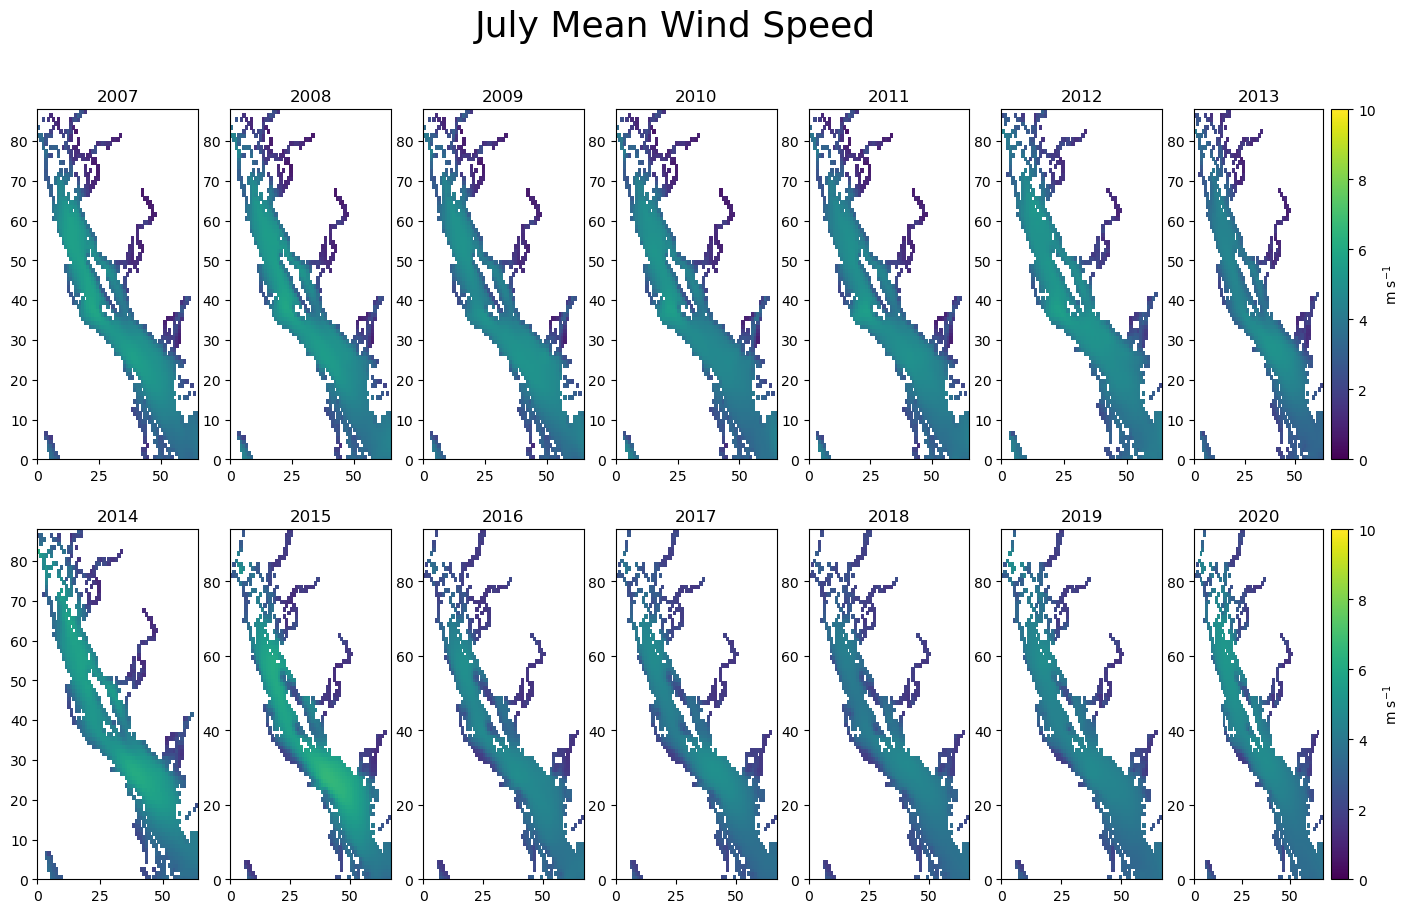

In [52]:
### July winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(jul_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(jul_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(jul_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(jul_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(jul_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(jul_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(jul_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(jul_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(jul_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(jul_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(jul_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(jul_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(jul_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(jul_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('July Mean Wind Speed',fontsize=26)

In [53]:
Jul2007=np.nanmean(jul_ws2007mean)
Jul2008=np.nanmean(jul_ws2008mean)
Jul2009=np.nanmean(jul_ws2009mean)
Jul2010=np.nanmean(jul_ws2010mean)
Jul2011=np.nanmean(jul_ws2011mean)
Jul2012=np.nanmean(jul_ws2012mean)
Jul2013=np.nanmean(jul_ws2013mean)
Jul2014=np.nanmean(jul_ws2014mean)
Jul2015=np.nanmean(jul_ws2015mean)
Jul2016=np.nanmean(jul_ws2016mean)
Jul2017=np.nanmean(jul_ws2017mean)
Jul2018=np.nanmean(jul_ws2018mean)
Jul2019=np.nanmean(jul_ws2019mean)
Jul2020=np.nanmean(jul_ws2020mean)

## August

In [54]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2007=(fuaug2007**2+fvaug2007**2)**(1/2)
aug_ws2007mean=np.mean(aug_ws2007,0)
aug_wdir2007 = np.rad2deg(np.arctan2(fvaug2007, fuaug2007)) - 90   # CCW from N
aug_wdir2007mean=np.mean(aug_wdir2007,0)


year=2008
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2008=(fuaug2008**2+fvaug2008**2)**(1/2)
aug_ws2008mean=np.mean(aug_ws2008,0)
aug_wdir2008 = np.rad2deg(np.arctan2(fvaug2008, fuaug2008)) - 90   # CCW from N
aug_wdir2008mean=np.mean(aug_wdir2008,0)


year=2009
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2009=(fuaug2009**2+fvaug2009**2)**(1/2)
aug_ws2009mean=np.mean(aug_ws2009,0)
aug_wdir2009 = np.rad2deg(np.arctan2(fvaug2009, fuaug2009)) - 90   # CCW from N
aug_wdir2009mean=np.mean(aug_wdir2009,0)


year=2010
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2010=(fuaug2010**2+fvaug2010**2)**(1/2)
aug_ws2010mean=np.mean(aug_ws2010,0)
aug_wdir2010 = np.rad2deg(np.arctan2(fvaug2010, fuaug2010)) - 90   # CCW from N
aug_wdir2010mean=np.mean(aug_wdir2010,0)


year=2011
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2011=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2011=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2011=(fuaug2011**2+fvaug2011**2)**(1/2)
aug_ws2011mean=np.mean(aug_ws2011,0)
aug_wdir2011 = np.rad2deg(np.arctan2(fvaug2011, fuaug2011)) - 90   # CCW from N
aug_wdir2011mean=np.mean(aug_wdir2011,0)


year=2012
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2012=(fuaug2012**2+fvaug2012**2)**(1/2)
aug_ws2012mean=np.mean(aug_ws2012,0)
aug_wdir2012 = np.rad2deg(np.arctan2(fvaug2012, fuaug2012)) - 90   # CCW from N
aug_wdir2012mean=np.mean(aug_wdir2012,0)


year=2013
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2013=(fuaug2013**2+fvaug2013**2)**(1/2)
aug_ws2013mean=np.mean(aug_ws2013,0)
aug_wdir2013 = np.rad2deg(np.arctan2(fvaug2013, fuaug2013)) - 90   # CCW from N
aug_wdir2013mean=np.mean(aug_wdir2013,0)


year=2014
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2014=(fuaug2014**2+fvaug2014**2)**(1/2)
aug_ws2014mean=np.mean(aug_ws2014,0)
aug_wdir2014 = np.rad2deg(np.arctan2(fvaug2014, fuaug2014)) - 90   # CCW from N
aug_wdir2014mean=np.mean(aug_wdir2014,0)


year=2015
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2015=(fuaug2015**2+fvaug2015**2)**(1/2)
aug_ws2015mean=np.mean(aug_ws2015,0)
aug_wdir2015 = np.rad2deg(np.arctan2(fvaug2015, fuaug2015)) - 90   # CCW from N
aug_wdir2015mean=np.mean(aug_wdir2015,0)


year=2016
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2016=(fuaug2016**2+fvaug2016**2)**(1/2)
aug_ws2016mean=np.mean(aug_ws2016,0)
aug_wdir2016 = np.rad2deg(np.arctan2(fvaug2016, fuaug2016)) - 90   # CCW from N
aug_wdir2016mean=np.mean(aug_wdir2016,0)


year=2017
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2017=(fuaug2017**2+fvaug2017**2)**(1/2)
aug_ws2017mean=np.mean(aug_ws2017,0)
aug_wdir2017 = np.rad2deg(np.arctan2(fvaug2017, fuaug2017)) - 90   # CCW from N
aug_wdir2017mean=np.mean(aug_wdir2017,0)

year=2018
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2018=(fuaug2018**2+fvaug2018**2)**(1/2)
aug_ws2018mean=np.mean(aug_ws2018,0)
aug_wdir2018 = np.rad2deg(np.arctan2(fvaug2018, fuaug2018)) - 90   # CCW from N
aug_wdir2018mean=np.mean(aug_wdir2018,0)


year=2019
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2019=(fuaug2019**2+fvaug2019**2)**(1/2)
aug_ws2019mean=np.mean(aug_ws2019,0)
aug_wdir2019 = np.rad2deg(np.arctan2(fvaug2019, fuaug2019)) - 90   # CCW from N
aug_wdir2019mean=np.mean(aug_wdir2019,0)


year=2020
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuaug2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvaug2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ws2020=(fuaug2020**2+fvaug2020**2)**(1/2)
aug_ws2020mean=np.mean(aug_ws2020,0)
aug_wdir2020 = np.rad2deg(np.arctan2(fvaug2020, fuaug2020)) - 90   # CCW from N
aug_wdir2020mean=np.mean(aug_wdir2020,0)

Text(0.5, 0.98, 'August Mean Wind Speed')

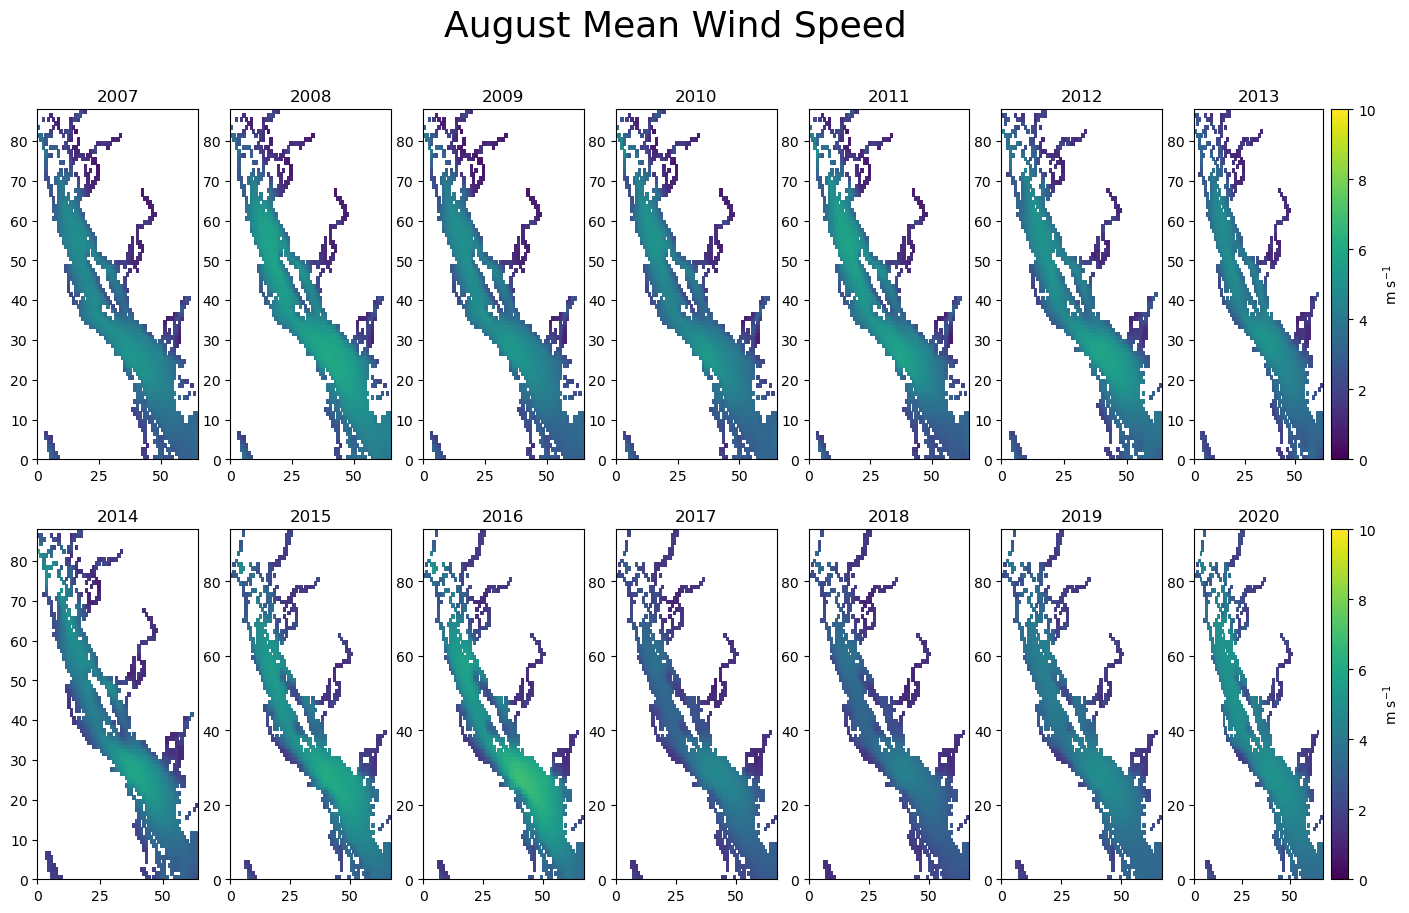

In [55]:
### August winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(aug_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(aug_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(aug_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(aug_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(aug_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(aug_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(aug_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(aug_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(aug_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(aug_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(aug_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(aug_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(aug_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(aug_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('August Mean Wind Speed',fontsize=26)

In [56]:
Aug2007=np.nanmean(aug_ws2007mean)
Aug2008=np.nanmean(aug_ws2008mean)
Aug2009=np.nanmean(aug_ws2009mean)
Aug2010=np.nanmean(aug_ws2010mean)
Aug2011=np.nanmean(aug_ws2011mean)
Aug2012=np.nanmean(aug_ws2012mean)
Aug2013=np.nanmean(aug_ws2013mean)
Aug2014=np.nanmean(aug_ws2014mean)
Aug2015=np.nanmean(aug_ws2015mean)
Aug2016=np.nanmean(aug_ws2016mean)
Aug2017=np.nanmean(aug_ws2017mean)
Aug2018=np.nanmean(aug_ws2018mean)
Aug2019=np.nanmean(aug_ws2019mean)
Aug2020=np.nanmean(aug_ws2020mean)

## September

In [57]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2007=(fusep2007**2+fvsep2007**2)**(1/2)
sep_ws2007mean=np.mean(sep_ws2007,0)
sep_wdir2007 = np.rad2deg(np.arctan2(fvsep2007, fusep2007)) - 90   # CCW from N
sep_wdir2007mean=np.mean(sep_wdir2007,0)


year=2008
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2008=(fusep2008**2+fvsep2008**2)**(1/2)
sep_ws2008mean=np.mean(sep_ws2008,0)
sep_wdir2008 = np.rad2deg(np.arctan2(fvsep2008, fusep2008)) - 90   # CCW from N
sep_wdir2008mean=np.mean(sep_wdir2008,0)


year=2009
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2009=(fusep2009**2+fvsep2009**2)**(1/2)
sep_ws2009mean=np.mean(sep_ws2009,0)
sep_wdir2009 = np.rad2deg(np.arctan2(fvsep2009, fusep2009)) - 90   # CCW from N
sep_wdir2009mean=np.mean(sep_wdir2009,0)


year=2010
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2010=(fusep2010**2+fvsep2010**2)**(1/2)
sep_ws2010mean=np.mean(sep_ws2010,0)
sep_wdir2010 = np.rad2deg(np.arctan2(fvsep2010, fusep2010)) - 90   # CCW from N
sep_wdir2010mean=np.mean(sep_wdir2010,0)

year=2011
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,22),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2011=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2011=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2011=(fusep2011**2+fvsep2011**2)**(1/2)
sep_ws2011mean=np.mean(sep_ws2011,0)
sep_wdir2011 = np.rad2deg(np.arctan2(fvsep2011, fusep2011)) - 90   # CCW from N
sep_wdir2011mean=np.mean(sep_wdir2011,0)


year=2012
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2012=(fusep2012**2+fvsep2012**2)**(1/2)
sep_ws2012mean=np.mean(sep_ws2012,0)
sep_wdir2012 = np.rad2deg(np.arctan2(fvsep2012, fusep2012)) - 90   # CCW from N
sep_wdir2012mean=np.mean(sep_wdir2012,0)


year=2013
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2013=(fusep2013**2+fvsep2013**2)**(1/2)
sep_ws2013mean=np.mean(sep_ws2013,0)
sep_wdir2013 = np.rad2deg(np.arctan2(fvsep2013, fusep2013)) - 90   # CCW from N
sep_wdir2013mean=np.mean(sep_wdir2013,0)


year=2014
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2014=(fusep2014**2+fvsep2014**2)**(1/2)
sep_ws2014mean=np.mean(sep_ws2014,0)
sep_wdir2014 = np.rad2deg(np.arctan2(fvsep2014, fusep2014)) - 90   # CCW from N
sep_wdir2014mean=np.mean(sep_wdir2014,0)


year=2015
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2015=(fusep2015**2+fvsep2015**2)**(1/2)
sep_ws2015mean=np.mean(sep_ws2015,0)
sep_wdir2015 = np.rad2deg(np.arctan2(fvsep2015, fusep2015)) - 90   # CCW from N
sep_wdir2015mean=np.mean(sep_wdir2015,0)


year=2016
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2016=(fusep2016**2+fvsep2016**2)**(1/2)
sep_ws2016mean=np.mean(sep_ws2016,0)
sep_wdir2016 = np.rad2deg(np.arctan2(fvsep2016, fusep2016)) - 90   # CCW from N
sep_wdir2016mean=np.mean(sep_wdir2016,0)


year=2017
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2017=(fusep2017**2+fvsep2017**2)**(1/2)
sep_ws2017mean=np.mean(sep_ws2017,0)
sep_wdir2017 = np.rad2deg(np.arctan2(fvsep2017, fusep2017)) - 90   # CCW from N
sep_wdir2017mean=np.mean(sep_wdir2017,0)

year=2018
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2018=(fusep2018**2+fvsep2018**2)**(1/2)
sep_ws2018mean=np.mean(sep_ws2018,0)
sep_wdir2018 = np.rad2deg(np.arctan2(fvsep2018, fusep2018)) - 90   # CCW from N
sep_wdir2018mean=np.mean(sep_wdir2018,0)


year=2019
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2019=(fusep2019**2+fvsep2019**2)**(1/2)
sep_ws2019mean=np.mean(sep_ws2019,0)
sep_wdir2019 = np.rad2deg(np.arctan2(fvsep2019, fusep2019)) - 90   # CCW from N
sep_wdir2019mean=np.mean(sep_wdir2019,0)


year=2020
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fusep2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvsep2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ws2020=(fusep2020**2+fvsep2020**2)**(1/2)
sep_ws2020mean=np.mean(sep_ws2020,0)
sep_wdir2020 = np.rad2deg(np.arctan2(fvsep2020, fusep2020)) - 90   # CCW from N
sep_wdir2020mean=np.mean(sep_wdir2020,0)

Text(0.5, 0.98, 'September Mean Wind Speed')

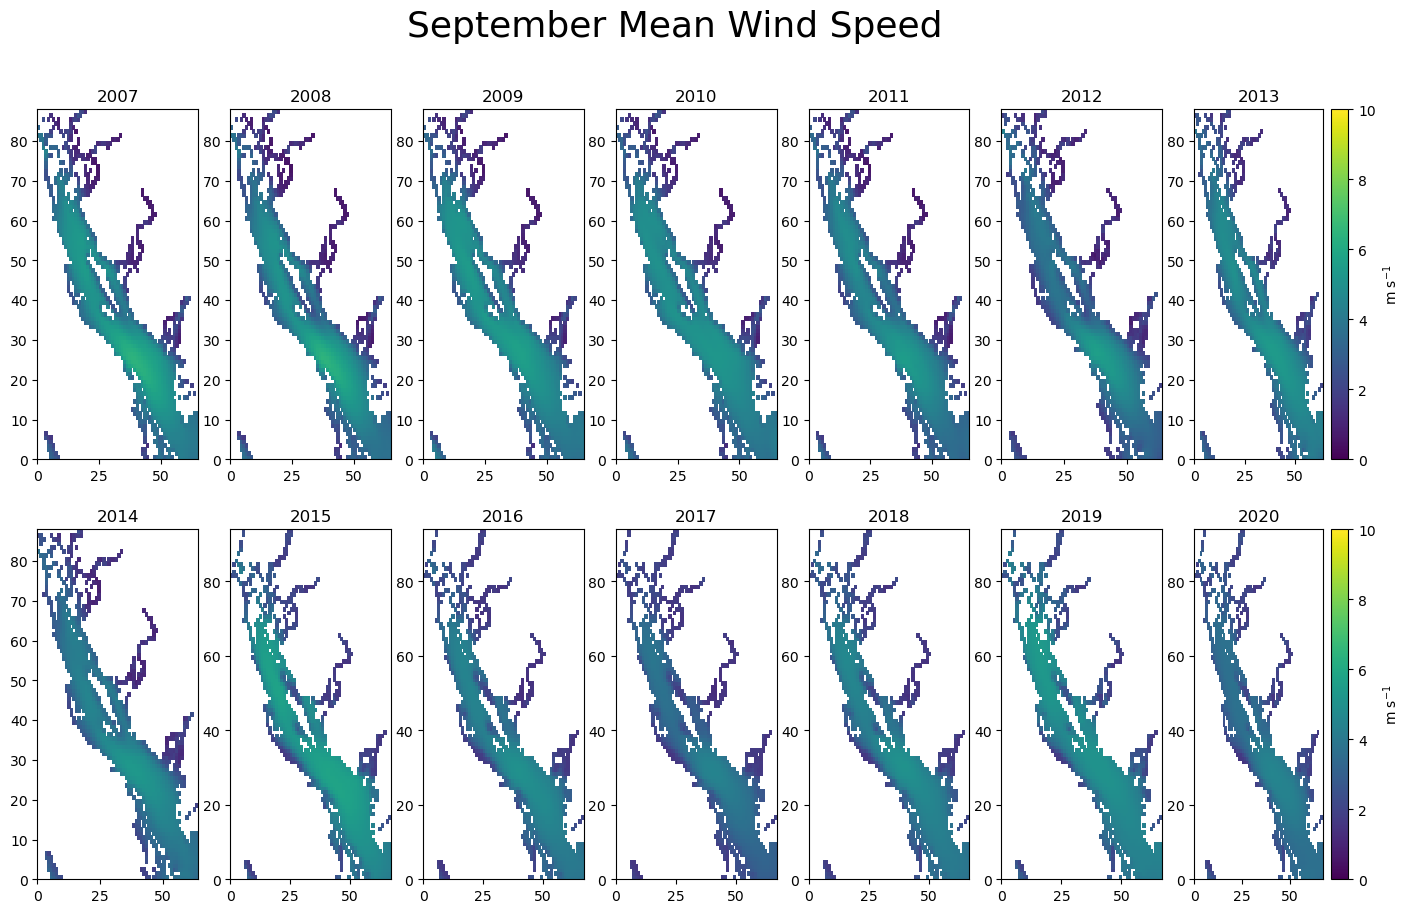

In [58]:
### September winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(sep_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(sep_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(sep_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(sep_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(sep_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(sep_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(sep_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(sep_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(sep_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(sep_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(sep_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(sep_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(sep_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(sep_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('September Mean Wind Speed',fontsize=26)

In [60]:
Sep2007=np.nanmean(sep_ws2007mean)
Sep2008=np.nanmean(sep_ws2008mean)
Sep2009=np.nanmean(sep_ws2009mean)
Sep2010=np.nanmean(sep_ws2010mean)
Sep2011=np.nanmean(sep_ws2011mean)
Sep2012=np.nanmean(sep_ws2012mean)
Sep2013=np.nanmean(sep_ws2013mean)
Sep2014=np.nanmean(sep_ws2014mean)
Sep2015=np.nanmean(sep_ws2015mean)
Sep2016=np.nanmean(sep_ws2016mean)
Sep2017=np.nanmean(sep_ws2017mean)
Sep2018=np.nanmean(sep_ws2018mean)
Sep2019=np.nanmean(sep_ws2019mean)
Sep2020=np.nanmean(sep_ws2020mean)

## October

In [61]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2007=(fuoct2007**2+fvoct2007**2)**(1/2)
oct_ws2007mean=np.mean(oct_ws2007,0)
oct_wdir2007 = np.rad2deg(np.arctan2(fvoct2007, fuoct2007)) - 90   # CCW from N
oct_wdir2007mean=np.mean(oct_wdir2007,0)


year=2008
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2008=(fuoct2008**2+fvoct2008**2)**(1/2)
oct_ws2008mean=np.mean(oct_ws2008,0)
oct_wdir2008 = np.rad2deg(np.arctan2(fvoct2008, fuoct2008)) - 90   # CCW from N
oct_wdir2008mean=np.mean(oct_wdir2008,0)


year=2009
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2009=(fuoct2009**2+fvoct2009**2)**(1/2)
oct_ws2009mean=np.mean(oct_ws2009,0)
oct_wdir2009 = np.rad2deg(np.arctan2(fvoct2009, fuoct2009)) - 90   # CCW from N
oct_wdir2009mean=np.mean(oct_wdir2009,0)


year=2010
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2010=(fuoct2010**2+fvoct2010**2)**(1/2)
oct_ws2010mean=np.mean(oct_ws2010,0)
oct_wdir2010 = np.rad2deg(np.arctan2(fvoct2010, fuoct2010)) - 90   # CCW from N
oct_wdir2010mean=np.mean(oct_wdir2010,0)


year=2011
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2011=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2011=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2011=(fuoct2011**2+fvoct2011**2)**(1/2)
oct_ws2011mean=np.mean(oct_ws2011,0)
oct_wdir2011 = np.rad2deg(np.arctan2(fvoct2011, fuoct2011)) - 90   # CCW from N
oct_wdir2011mean=np.mean(oct_wdir2011,0)


year=2012
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2012=(fuoct2012**2+fvoct2012**2)**(1/2)
oct_ws2012mean=np.mean(oct_ws2012,0)
oct_wdir2012 = np.rad2deg(np.arctan2(fvoct2012, fuoct2012)) - 90   # CCW from N
oct_wdir2012mean=np.mean(oct_wdir2012,0)


year=2013
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2013=(fuoct2013**2+fvoct2013**2)**(1/2)
oct_ws2013mean=np.mean(oct_ws2013,0)
oct_wdir2013 = np.rad2deg(np.arctan2(fvoct2013, fuoct2013)) - 90   # CCW from N
oct_wdir2013mean=np.mean(oct_wdir2013,0)


year=2014
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2014=(fuoct2014**2+fvoct2014**2)**(1/2)
oct_ws2014mean=np.mean(oct_ws2014,0)
oct_wdir2014 = np.rad2deg(np.arctan2(fvoct2014, fuoct2014)) - 90   # CCW from N
oct_wdir2014mean=np.mean(oct_wdir2014,0)


year=2015
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2015=(fuoct2015**2+fvoct2015**2)**(1/2)
oct_ws2015mean=np.mean(oct_ws2015,0)
oct_wdir2015 = np.rad2deg(np.arctan2(fvoct2015, fuoct2015)) - 90   # CCW from N
oct_wdir2015mean=np.mean(oct_wdir2015,0)


year=2016
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2016=(fuoct2016**2+fvoct2016**2)**(1/2)
oct_ws2016mean=np.mean(oct_ws2016,0)
oct_wdir2016 = np.rad2deg(np.arctan2(fvoct2016, fuoct2016)) - 90   # CCW from N
oct_wdir2016mean=np.mean(oct_wdir2016,0)


year=2017
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2017=(fuoct2017**2+fvoct2017**2)**(1/2)
oct_ws2017mean=np.mean(oct_ws2017,0)
oct_wdir2017 = np.rad2deg(np.arctan2(fvoct2017, fuoct2017)) - 90   # CCW from N
oct_wdir2017mean=np.mean(oct_wdir2017,0)


year=2018
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2018=(fuoct2018**2+fvoct2018**2)**(1/2)
oct_ws2018mean=np.mean(oct_ws2018,0)
oct_wdir2018 = np.rad2deg(np.arctan2(fvoct2018, fuoct2018)) - 90   # CCW from N
oct_wdir2018mean=np.mean(oct_wdir2018,0)


year=2019
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2019=(fuoct2019**2+fvoct2019**2)**(1/2)
oct_ws2019mean=np.mean(oct_ws2019,0)
oct_wdir2019 = np.rad2deg(np.arctan2(fvoct2019, fuoct2019)) - 90   # CCW from N
oct_wdir2019mean=np.mean(oct_wdir2019,0)


year=2020
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fuoct2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvoct2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ws2020=(fuoct2020**2+fvoct2020**2)**(1/2)
oct_ws2020mean=np.mean(oct_ws2020,0)
oct_wdir2020 = np.rad2deg(np.arctan2(fvoct2020, fuoct2020)) - 90   # CCW from N
oct_wdir2020mean=np.mean(oct_wdir2020,0)

Text(0.5, 0.98, 'October Mean Wind Speed')

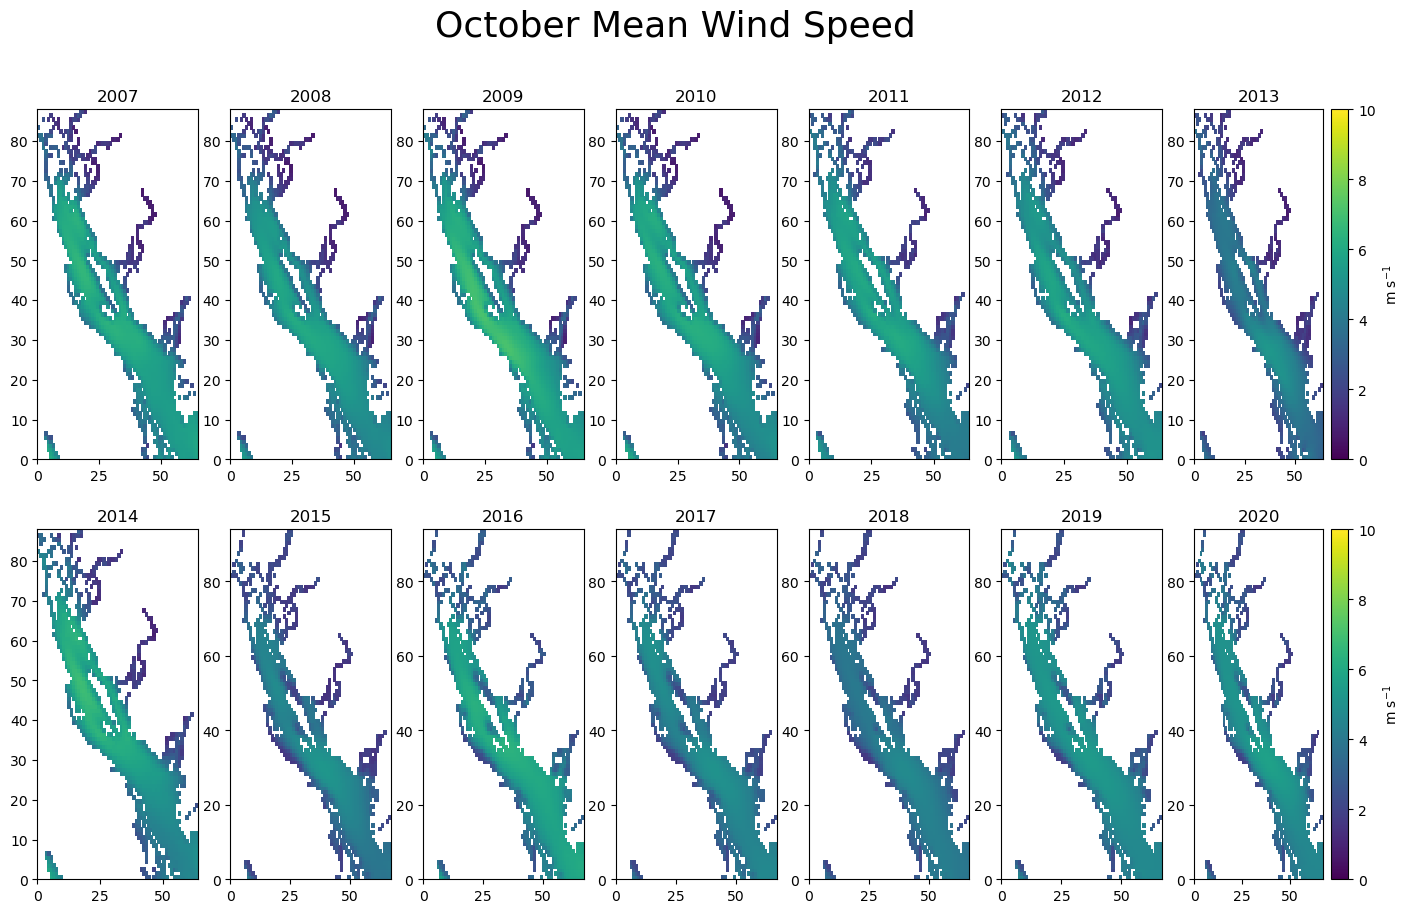

In [62]:
### October winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(oct_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(oct_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(oct_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(oct_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(oct_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(oct_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(oct_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(oct_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(oct_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(oct_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(oct_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(oct_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(oct_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(oct_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('October Mean Wind Speed',fontsize=26)

In [63]:
Oct2007=np.nanmean(oct_ws2007mean)
Oct2008=np.nanmean(oct_ws2008mean)
Oct2009=np.nanmean(oct_ws2009mean)
Oct2010=np.nanmean(oct_ws2010mean)
Oct2011=np.nanmean(oct_ws2011mean)
Oct2012=np.nanmean(oct_ws2012mean)
Oct2013=np.nanmean(oct_ws2013mean)
Oct2014=np.nanmean(oct_ws2014mean)
Oct2015=np.nanmean(oct_ws2015mean)
Oct2016=np.nanmean(oct_ws2016mean)
Oct2017=np.nanmean(oct_ws2017mean)
Oct2018=np.nanmean(oct_ws2018mean)
Oct2019=np.nanmean(oct_ws2019mean)
Oct2020=np.nanmean(oct_ws2020mean)

## November

In [64]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2007=(funov2007**2+fvnov2007**2)**(1/2)
nov_ws2007mean=np.mean(nov_ws2007,0)
nov_wdir2007 = np.rad2deg(np.arctan2(fvnov2007, funov2007)) - 90   # CCW from N
nov_wdir2007mean=np.mean(nov_wdir2007,0)


year=2008
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2008=(funov2008**2+fvnov2008**2)**(1/2)
nov_ws2008mean=np.mean(nov_ws2008,0)
nov_wdir2008 = np.rad2deg(np.arctan2(fvnov2008, funov2008)) - 90   # CCW from N
nov_wdir2008mean=np.mean(nov_wdir2008,0)


year=2009
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2009=(funov2009**2+fvnov2009**2)**(1/2)
nov_ws2009mean=np.mean(nov_ws2009,0)
nov_wdir2009 = np.rad2deg(np.arctan2(fvnov2009, funov2009)) - 90   # CCW from N
nov_wdir2009mean=np.mean(nov_wdir2009,0)


year=2010
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2010=(funov2010**2+fvnov2010**2)**(1/2)
nov_ws2010mean=np.mean(nov_ws2010,0)
nov_wdir2010 = np.rad2deg(np.arctan2(fvnov2010, funov2010)) - 90   # CCW from N
nov_wdir2010mean=np.mean(nov_wdir2010,0)


year=2011
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2011=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2011=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2011=(funov2011**2+fvnov2011**2)**(1/2)
nov_ws2011mean=np.mean(nov_ws2011,0)
nov_wdir2011 = np.rad2deg(np.arctan2(fvnov2011, funov2011)) - 90   # CCW from N
nov_wdir2011mean=np.mean(nov_wdir2011,0)


year=2012
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2012=(funov2012**2+fvnov2012**2)**(1/2)
nov_ws2012mean=np.mean(nov_ws2012,0)
nov_wdir2012 = np.rad2deg(np.arctan2(fvnov2012, funov2012)) - 90   # CCW from N
nov_wdir2012mean=np.mean(nov_wdir2012,0)


year=2013
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2013=(funov2013**2+fvnov2013**2)**(1/2)
nov_ws2013mean=np.mean(nov_ws2013,0)
nov_wdir2013 = np.rad2deg(np.arctan2(fvnov2013, funov2013)) - 90   # CCW from N
nov_wdir2013mean=np.mean(nov_wdir2013,0)


year=2014
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,18),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2014=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2014=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2014=(funov2014**2+fvnov2014**2)**(1/2)
nov_ws2014mean=np.mean(nov_ws2014,0)
nov_wdir2014 = np.rad2deg(np.arctan2(fvnov2014, funov2014)) - 90   # CCW from N
nov_wdir2014mean=np.mean(nov_wdir2014,0)


year=2015
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2015=(funov2015**2+fvnov2015**2)**(1/2)
nov_ws2015mean=np.mean(nov_ws2015,0)
nov_wdir2015 = np.rad2deg(np.arctan2(fvnov2015, funov2015)) - 90   # CCW from N
nov_wdir2015mean=np.mean(nov_wdir2015,0)


year=2016
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2016=(funov2016**2+fvnov2016**2)**(1/2)
nov_ws2016mean=np.mean(nov_ws2016,0)
nov_wdir2016 = np.rad2deg(np.arctan2(fvnov2016, funov2016)) - 90   # CCW from N
nov_wdir2016mean=np.mean(nov_wdir2016,0)


year=2017
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2017=(funov2017**2+fvnov2017**2)**(1/2)
nov_ws2017mean=np.mean(nov_ws2017,0)
nov_wdir2017 = np.rad2deg(np.arctan2(fvnov2017, funov2017)) - 90   # CCW from N
nov_wdir2017mean=np.mean(nov_wdir2017,0)


year=2018
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2018=(funov2018**2+fvnov2018**2)**(1/2)
nov_ws2018mean=np.mean(nov_ws2018,0)
nov_wdir2018 = np.rad2deg(np.arctan2(fvnov2018, funov2018)) - 90   # CCW from N
nov_wdir2018mean=np.mean(nov_wdir2018,0)


year=2019
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2019=(funov2019**2+fvnov2019**2)**(1/2)
nov_ws2019mean=np.mean(nov_ws2019,0)
nov_wdir2019 = np.rad2deg(np.arctan2(fvnov2019, funov2019)) - 90   # CCW from N
nov_wdir2019mean=np.mean(nov_wdir2019,0)


year=2020
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
funov2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvnov2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ws2020=(funov2020**2+fvnov2020**2)**(1/2)
nov_ws2020mean=np.mean(nov_ws2020,0)
nov_wdir2020 = np.rad2deg(np.arctan2(fvnov2020, funov2020)) - 90   # CCW from N
nov_wdir2020mean=np.mean(nov_wdir2020,0)

Text(0.5, 0.98, 'November Mean Wind Speed')

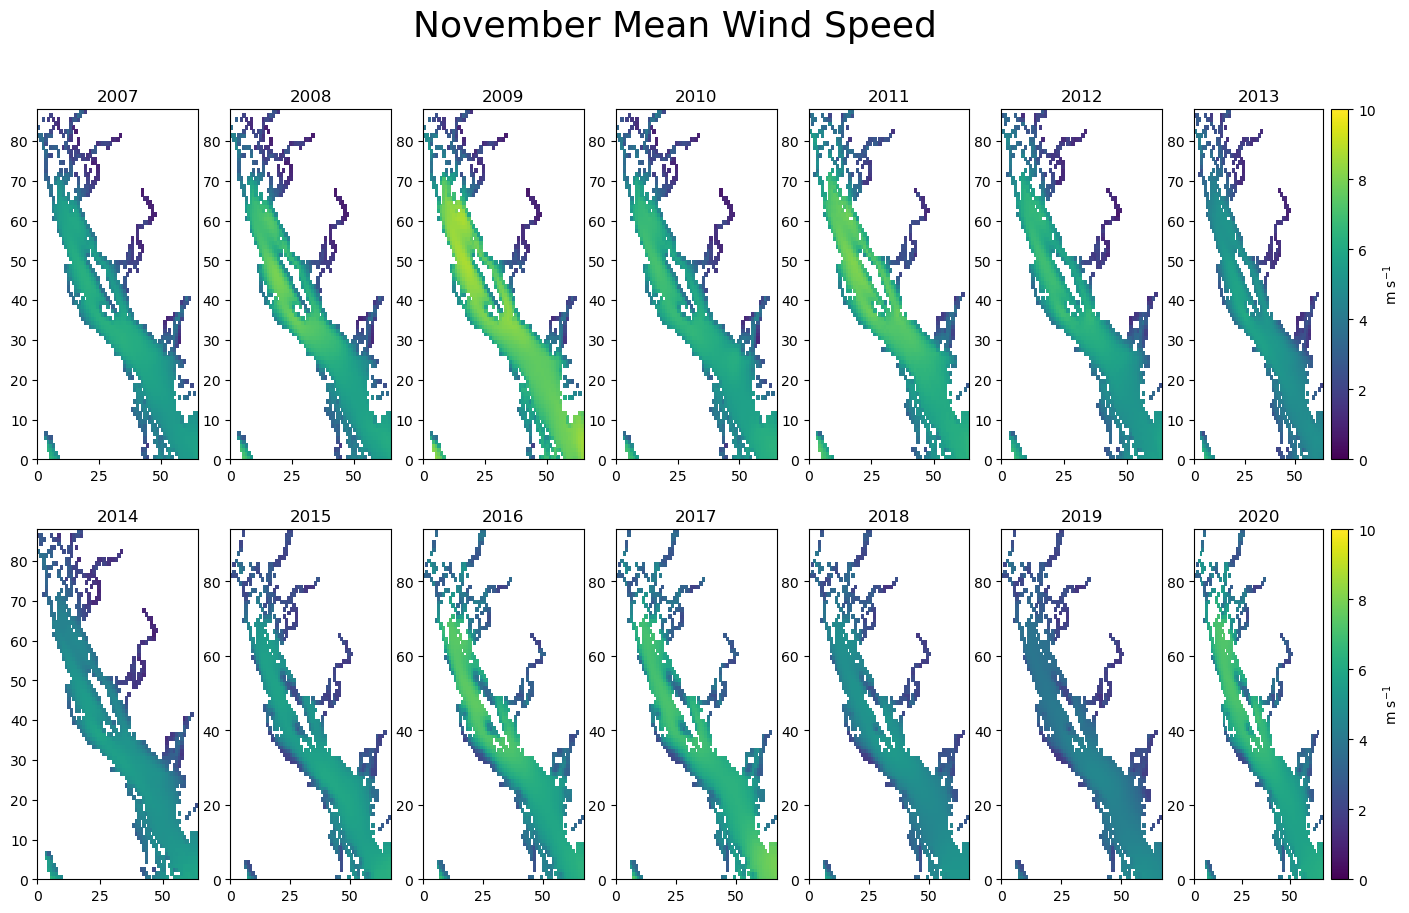

In [65]:
### November winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(nov_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(nov_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(nov_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(nov_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(nov_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(nov_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(nov_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(nov_ws2014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(nov_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(nov_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(nov_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(nov_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(nov_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(nov_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('November Mean Wind Speed',fontsize=26)

In [66]:
Nov2007=np.nanmean(nov_ws2007mean)
Nov2008=np.nanmean(nov_ws2008mean)
Nov2009=np.nanmean(nov_ws2009mean)
Nov2010=np.nanmean(nov_ws2010mean)
Nov2011=np.nanmean(nov_ws2011mean)
Nov2012=np.nanmean(nov_ws2012mean)
Nov2013=np.nanmean(nov_ws2013mean)
Nov2014=np.nanmean(nov_ws2014mean)
Nov2015=np.nanmean(nov_ws2015mean)
Nov2016=np.nanmean(nov_ws2016mean)
Nov2017=np.nanmean(nov_ws2017mean)
Nov2018=np.nanmean(nov_ws2018mean)
Nov2019=np.nanmean(nov_ws2019mean)
Nov2020=np.nanmean(nov_ws2020mean)

## December

In [67]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2007=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2007=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2007=(fudec2007**2+fvdec2007**2)**(1/2)
dec_ws2007mean=np.mean(dec_ws2007,0)
dec_wdir2007 = np.rad2deg(np.arctan2(fvdec2007, fudec2007)) - 90   # CCW from N
dec_wdir2007mean=np.mean(dec_wdir2007,0)


year=2008
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2008=(fudec2008**2+fvdec2008**2)**(1/2)
dec_ws2008mean=np.mean(dec_ws2008,0)
dec_wdir2008 = np.rad2deg(np.arctan2(fvdec2008, fudec2008)) - 90   # CCW from N
dec_wdir2008mean=np.mean(dec_wdir2008,0)


year=2009
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2009=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2009=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2009=(fudec2009**2+fvdec2009**2)**(1/2)
dec_ws2009mean=np.mean(dec_ws2009,0)
dec_wdir2009 = np.rad2deg(np.arctan2(fvdec2009, fudec2009)) - 90   # CCW from N
dec_wdir2009mean=np.mean(dec_wdir2009,0)


year=2010
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2010=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2010=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2010=(fudec2010**2+fvdec2010**2)**(1/2)
dec_ws2010mean=np.mean(dec_ws2010,0)
dec_wdir2010 = np.rad2deg(np.arctan2(fvdec2010, fudec2010)) - 90   # CCW from N
dec_wdir2010mean=np.mean(dec_wdir2010,0)


year=2011
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2011=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2011=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2011=(fudec2011**2+fvdec2011**2)**(1/2)
dec_ws2011mean=np.mean(dec_ws2011,0)
dec_wdir2011 = np.rad2deg(np.arctan2(fvdec2011, fudec2011)) - 90   # CCW from N
dec_wdir2011mean=np.mean(dec_wdir2011,0)


year=2012
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2012=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2012=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2012=(fudec2012**2+fvdec2012**2)**(1/2)
dec_ws2012mean=np.mean(dec_ws2012,0)
dec_wdir2012 = np.rad2deg(np.arctan2(fvdec2012, fudec2012)) - 90   # CCW from N
dec_wdir2012mean=np.mean(dec_wdir2012,0)


year=2013
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2013=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2013=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2013=(fudec2013**2+fvdec2013**2)**(1/2)
dec_ws2013mean=np.mean(dec_ws2013,0)
dec_wdir2013 = np.rad2deg(np.arctan2(fvdec2013, fudec2013)) - 90   # CCW from N
dec_wdir2013mean=np.mean(dec_wdir2013,0)

#year=2014
#day=dt.datetime(year,12,1)
#opsdir, namfmt, jlims, ilims = getWindVars(day)
#flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
#                           flen=1,ftype='None',tres=24);
#fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
#fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
#fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
#dec_ops2014=(fu**2+fv**2)**(1/2)
#dec_ops2014mean=np.mean(dec_ops2014,0)


year=2015
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2015=xr.concat([ii['u_wind'].where(Watermask2.mask).where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2015=xr.concat([ii['v_wind'].where(Watermask2.mask).where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2015=(fudec2015**2+fvdec2015**2)**(1/2)
dec_ws2015mean=np.mean(dec_ws2015,0)
dec_wdir2015 = np.rad2deg(np.arctan2(fvdec2015, fudec2015)) - 90   # CCW from N
dec_wdir2015mean=np.mean(dec_wdir2015,0)


year=2016
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2016=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2016=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2016=(fudec2016**2+fvdec2016**2)**(1/2)
dec_ws2016mean=np.mean(dec_ws2016,0)
dec_wdir2016 = np.rad2deg(np.arctan2(fvdec2016, fudec2016)) - 90   # CCW from N
dec_wdir2016mean=np.mean(dec_wdir2016,0)


year=2017
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2017=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2017=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2017=(fudec2017**2+fvdec2017**2)**(1/2)
dec_ws2017mean=np.mean(dec_ws2017,0)
dec_wdir2017 = np.rad2deg(np.arctan2(fvdec2017, fudec2017)) - 90   # CCW from N
dec_wdir2017mean=np.mean(dec_wdir2017,0)


year=2018
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2018=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2018=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2018=(fudec2018**2+fvdec2018**2)**(1/2)
dec_ws2018mean=np.mean(dec_ws2018,0)
dec_wdir2018 = np.rad2deg(np.arctan2(fvdec2018, fudec2018)) - 90   # CCW from N
dec_wdir2018mean=np.mean(dec_wdir2018,0)

year=2019
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2019=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2019=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2019=(fudec2019**2+fvdec2019**2)**(1/2)
dec_ws2019mean=np.mean(dec_ws2019,0)
dec_wdir2019 = np.rad2deg(np.arctan2(fvdec2019, fudec2019)) - 90   # CCW from N
dec_wdir2019mean=np.mean(dec_wdir2019,0)


year=2020
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fudec2020=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvdec2020=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ws2020=(fudec2020**2+fvdec2020**2)**(1/2)
dec_ws2020mean=np.mean(dec_ws2020,0)
dec_wdir2020 = np.rad2deg(np.arctan2(fvdec2020, fudec2020)) - 90   # CCW from N
dec_wdir2020mean=np.mean(dec_wdir2020,0)

Text(0.5, 0.98, 'December Mean Wind Speed')

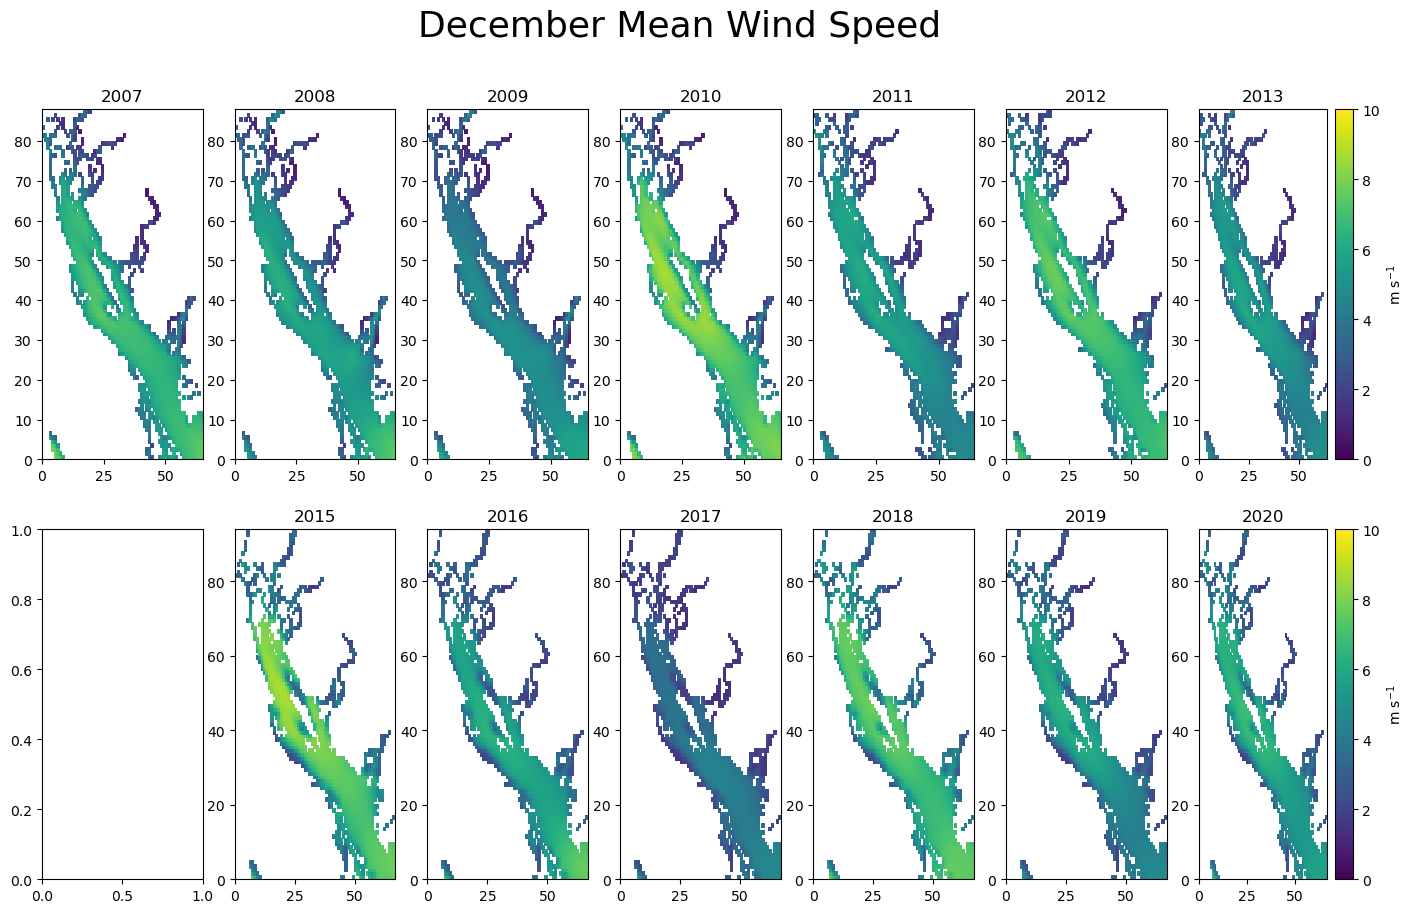

In [68]:
### December winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(dec_ws2007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(dec_ws2008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(dec_ws2009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(dec_ws2010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(dec_ws2011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(dec_ws2012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(dec_ws2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
#iax=ax[1,0]
#iax.set_title('2014')
#m=iax.pcolormesh(dec_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(dec_ws2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(dec_ws2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(dec_ws2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(dec_ws2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(dec_ws2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(dec_ws2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m s$^{-1}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('December Mean Wind Speed',fontsize=26)

In [69]:
Dec2007=np.nanmean(dec_ws2007mean)
Dec2008=np.nanmean(dec_ws2008mean)
Dec2009=np.nanmean(dec_ws2009mean)
Dec2010=np.nanmean(dec_ws2010mean)
Dec2011=np.nanmean(dec_ws2011mean)
Dec2012=np.nanmean(dec_ws2012mean)
Dec2013=np.nanmean(dec_ws2013mean)
#Dec2014=np.nanmean(dec_gl22014mean)
Dec2015=np.nanmean(dec_ws2015mean)
Dec2016=np.nanmean(dec_ws2016mean)
Dec2017=np.nanmean(dec_ws2017mean)
Dec2018=np.nanmean(dec_ws2018mean)
Dec2019=np.nanmean(dec_ws2019mean)
Dec2020=np.nanmean(dec_ws2020mean)

In [70]:
Jan_W=(Jan2015+Jan2018+Jan2019+Jan2020)/4
Feb_W=(Feb2015+Feb2018+Feb2019+Jan2020)/4
Mar_W=(Mar2015+Mar2018+Mar2019+Mar2020)/4
Apr_W=(Apr2015+Apr2018+Apr2019+Apr2020)/4
May_W=(May2015+May2018+May2019+May2020)/4
Jun_W=(Jun2015+Jun2018+Jun2019+Jun2020)/4
Jul_W=(Jul2015+Jul2018+Jul2019+Jul2020)/4
Aug_W=(Aug2015+Aug2018+Aug2019+Aug2020)/4
Sep_W=(Sep2015+Sep2018+Sep2019+Sep2020)/4
Oct_W=(Oct2015+Oct2018+Oct2019+Oct2020)/4
Nov_W=(Nov2015+Nov2018+Nov2019+Nov2020)/4
Dec_W=(Dec2015+Dec2018+Dec2019+Dec2020)/4

In [71]:
Jan_3W=(Jan2018+Jan2019+Jan2020)/3
Feb_3W=(Feb2018+Feb2019+Jan2020)/3
Mar_3W=(Mar2018+Mar2019+Mar2020)/3
Apr_3W=(Apr2018+Apr2019+Apr2020)/3
May_3W=(May2018+May2019+May2020)/3
Jun_3W=(Jun2018+Jun2019+Jun2020)/3
Jul_3W=(Jul2018+Jul2019+Jul2020)/3
Aug_3W=(Aug2018+Aug2019+Aug2020)/3
Sep_3W=(Sep2018+Sep2019+Sep2020)/3
Oct_3W=(Oct2018+Oct2019+Oct2020)/3
Nov_3W=(Nov2018+Nov2019+Nov2020)/3
Dec_3W=(Dec2018+Dec2019+Dec2020)/3

In [72]:
Jan_C=(Jan2008+Jan2010+Jan2011+Jan2012)/4
Feb_C=(Feb2008+Feb2010+Feb2011+Jan2012)/4
Mar_C=(Mar2008+Mar2010+Mar2011+Mar2012)/4
Apr_C=(Apr2008+Apr2010+Apr2011+Apr2012)/4
May_C=(May2008+May2010+May2011+May2012)/4
Jun_C=(Jun2008+Jun2010+Jun2011+Jun2012)/4
Jul_C=(Jul2008+Jul2010+Jul2011+Jul2012)/4
Aug_C=(Aug2008+Aug2010+Aug2011+Aug2012)/4
Sep_C=(Sep2008+Sep2010+Sep2011+Sep2012)/4
Oct_C=(Oct2008+Oct2010+Oct2011+Oct2012)/4
Nov_C=(Nov2008+Nov2010+Nov2011+Nov2012)/4
Dec_C=(Dec2008+Dec2010+Dec2011+Dec2012)/4

In [73]:
Jan_3C=(Jan2008+Jan2010+Jan2012)/3
Feb_3C=(Feb2008+Feb2010+Jan2012)/3
Mar_3C=(Mar2008+Mar2010+Mar2012)/3
Apr_3C=(Apr2008+Apr2010+Apr2012)/3
May_3C=(May2008+May2010+May2012)/3
Jun_3C=(Jun2008+Jun2010+Jun2012)/3
Jul_3C=(Jul2008+Jul2010+Jul2012)/3
Aug_3C=(Aug2008+Aug2010+Aug2012)/3
Sep_3C=(Sep2008+Sep2010+Sep2012)/3
Oct_3C=(Oct2008+Oct2010+Oct2012)/3
Nov_3C=(Nov2008+Nov2010+Nov2012)/3
Dec_3C=(Dec2008+Dec2010+Dec2012)/3

In [74]:
Spring2007=(Mar2007+Apr2007+May2007)/3
Spring2008=(Mar2008+Apr2008+May2008)/3
Spring2009=(Mar2009+Apr2009+May2009)/3
Spring2010=(Mar2010+Apr2010+May2010)/3
Spring2011=(Mar2011+Apr2011+May2011)/3
Spring2012=(Mar2012+Apr2012+May2012)/3
Spring2013=(Mar2013+Apr2013+May2013)/3
Spring2014=(Mar2014+Apr2014+May2014)/3
Spring2015=(Mar2015+Apr2015+May2015)/3
Spring2016=(Mar2016+Apr2016+May2016)/3
Spring2017=(Mar2017+Apr2017+May2017)/3
Spring2018=(Mar2018+Apr2018+May2018)/3
Spring2019=(Mar2019+Apr2019+May2019)/3
Spring2020=(Mar2020+Apr2020+May2020)/3

In [75]:
SpringClimatology=(Spring2007+Spring2008+Spring2009+Spring2010+Spring2011+Spring2012+Spring2013+Spring2014+Spring2015+\
                  Spring2016+Spring2017+Spring2018+Spring2019+Spring2020)/14

Text(0, 0.5, 'm s$^{-1}$')

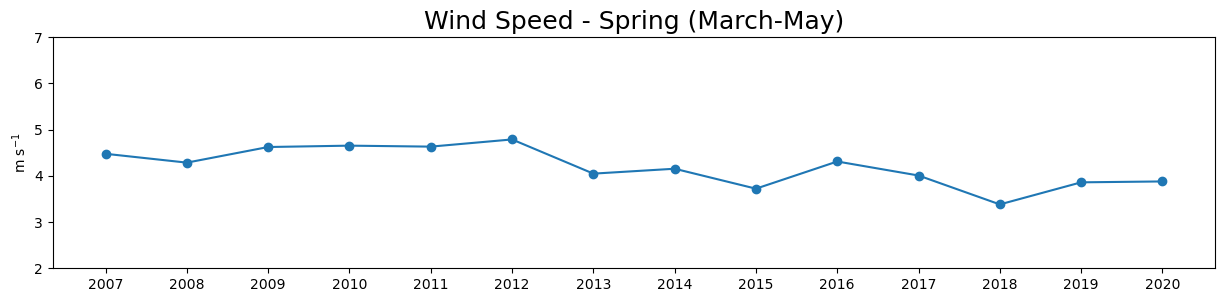

In [129]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[Spring2007,Spring2008,Spring2009,Spring2010,Spring2011,Spring2012,Spring2013,Spring2014,Spring2015,Spring2016,Spring2017,Spring2018,Spring2019,Spring2020]


ax.plot(x, y,marker='o',label='')

ax.set_title('Wind Speed - Spring (March-May)',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(2,7)
ax.set_ylabel('m s$^{-1}$')


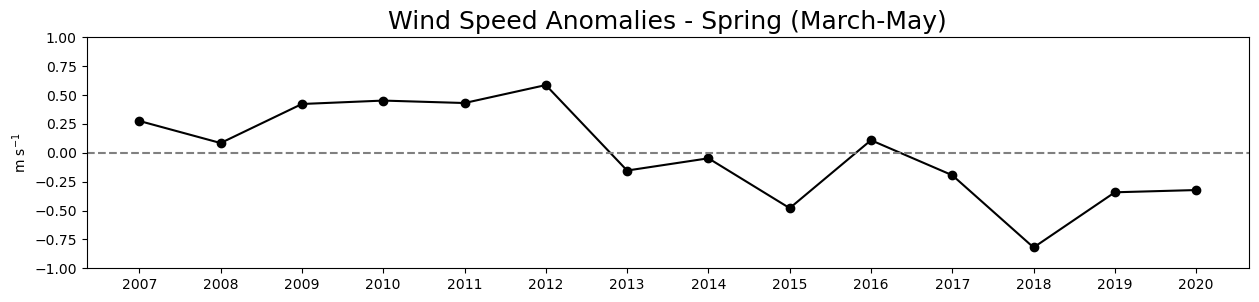

In [77]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[Spring2007-SpringClimatology,Spring2008-SpringClimatology,Spring2009-SpringClimatology,\
   Spring2010-SpringClimatology,Spring2011-SpringClimatology,Spring2012-SpringClimatology,\
   Spring2013-SpringClimatology,Spring2014-SpringClimatology,Spring2015-SpringClimatology,\
   Spring2016-SpringClimatology,Spring2017-SpringClimatology,Spring2018-SpringClimatology,\
   Spring2019-SpringClimatology,Spring2020-SpringClimatology]


ax.plot(x, y,marker='o',label='',color='k')
#ax.bar(x,y,color='k')

ax.set_title('Wind Speed Anomalies - Spring (March-May)',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(-1,1)
ax.set_ylabel('m s$^{-1}$')
ax.axhline(y=0,color='grey',linestyle='--')


In [78]:
Summer2007=(Jun2007+Jul2007+Aug2007)/3
Summer2008=(Jun2008+Jul2008+Aug2008)/3
Summer2009=(Jun2009+Jul2009+Aug2009)/3
Summer2010=(Jun2010+Jul2010+Aug2010)/3
Summer2011=(Jun2011+Jul2011+Aug2011)/3
Summer2012=(Jun2012+Jul2012+Aug2012)/3
Summer2013=(Jun2013+Jul2013+Aug2013)/3
Summer2014=(Jun2014+Jul2014+Aug2014)/3
Summer2015=(Jun2015+Jul2015+Aug2015)/3
Summer2016=(Jun2016+Jul2016+Aug2016)/3
Summer2017=(Jun2017+Jul2017+Aug2017)/3
Summer2018=(Jun2018+Jul2018+Aug2018)/3
Summer2019=(Jun2019+Jul2019+Aug2019)/3
Summer2020=(Jun2020+Jul2020+Aug2020)/3

In [79]:
SummerClimatology=(Summer2007+Summer2008+Summer2009+Summer2010+Summer2011+Summer2012+Summer2013+Summer2014+Summer2015+\
                  Summer2016+Summer2017+Summer2018+Summer2019+Summer2020)/14

Text(0, 0.5, 'm s$^{-1}$')

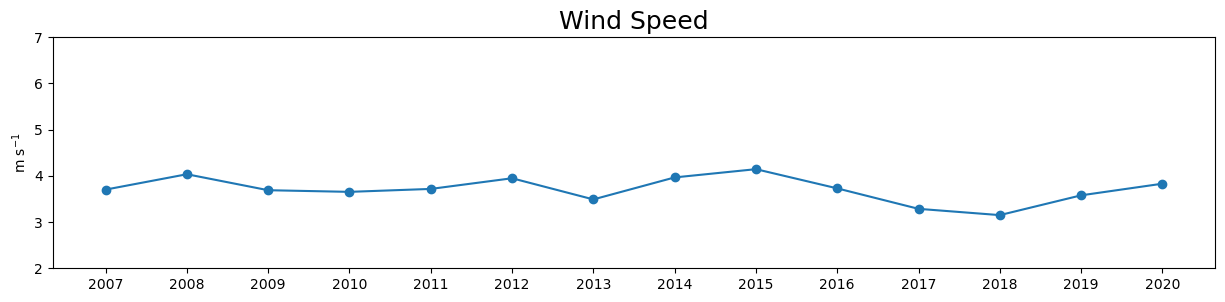

In [128]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[Summer2007,Summer2008,Summer2009,Summer2010,Summer2011,Summer2012,Summer2013,Summer2014,Summer2015,Summer2016,Summer2017,Summer2018,Summer2019,Summer2020]


ax.plot(x, y,marker='o',label='')

ax.set_title('Wind Speed',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(2,7)
ax.set_ylabel('m s$^{-1}$')


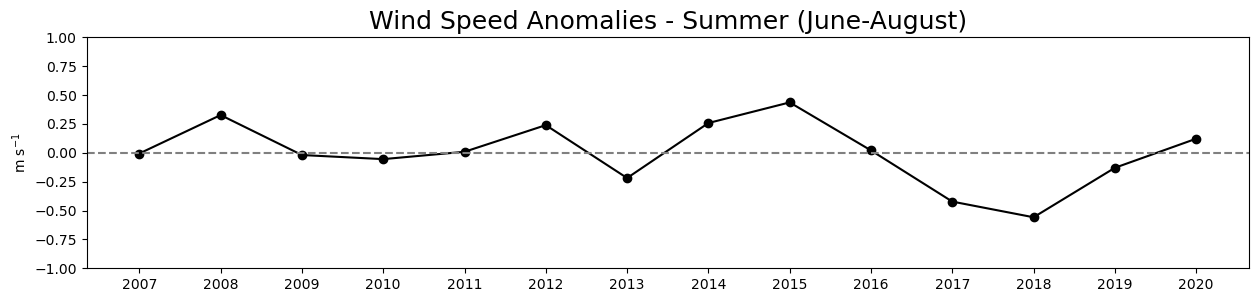

In [81]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[Summer2007-SummerClimatology,Summer2008-SummerClimatology,Summer2009-SummerClimatology,\
   Summer2010-SummerClimatology,Summer2011-SummerClimatology,Summer2012-SummerClimatology,\
   Summer2013-SummerClimatology,Summer2014-SummerClimatology,Summer2015-SummerClimatology,\
   Summer2016-SummerClimatology,Summer2017-SummerClimatology,Summer2018-SummerClimatology,\
   Summer2019-SummerClimatology,Summer2020-SummerClimatology]


ax.plot(x, y,marker='o',label='',color='k')
#ax.bar(x,y,color='k')

ax.set_title('Wind Speed Anomalies - Summer (June-August)',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(-1,1)
ax.set_ylabel('m s$^{-1}$')
ax.axhline(y=0,color='grey',linestyle='--')


In [82]:
SprSummer2007=(Mar2007+Apr2007+May2007+Jun2007+Jul2007+Aug2007)/6
SprSummer2008=(Mar2008+Apr2008+May2008+Jun2008+Jul2008+Aug2008)/6
SprSummer2009=(Mar2009+Apr2009+May2009+Jun2009+Jul2009+Aug2009)/6
SprSummer2010=(Mar2010+Apr2010+May2010+Jun2010+Jul2010+Aug2010)/6
SprSummer2011=(Mar2011+Apr2011+May2011+Jun2011+Jul2011+Aug2011)/6
SprSummer2012=(Mar2012+Apr2012+May2012+Jun2012+Jul2012+Aug2012)/6
SprSummer2013=(Mar2013+Apr2013+May2013+Jun2013+Jul2013+Aug2013)/6
SprSummer2014=(Mar2014+Apr2014+May2014+Jun2014+Jul2014+Aug2014)/6
SprSummer2015=(Mar2015+Apr2015+May2015+Jun2015+Jul2015+Aug2015)/6
SprSummer2016=(Mar2016+Apr2016+May2016+Jun2016+Jul2016+Aug2016)/6
SprSummer2017=(Mar2017+Apr2017+May2017+Jun2017+Jul2017+Aug2017)/6
SprSummer2018=(Mar2018+Apr2018+May2018+Jun2018+Jul2018+Aug2018)/6
SprSummer2019=(Mar2019+Apr2019+May2019+Jun2019+Jul2019+Aug2019)/6
SprSummer2020=(Mar2020+Apr2020+May2020+Jun2020+Jul2020+Aug2020)/6

In [83]:
SprSummerClimatology=(SprSummer2007+SprSummer2008+SprSummer2009+SprSummer2010+SprSummer2011+SprSummer2012+SprSummer2013+SprSummer2014+SprSummer2015+\
                  SprSummer2016+SprSummer2017+SprSummer2018+SprSummer2019+SprSummer2020)/14

Text(0, 0.5, 'm s$^{-1}$')

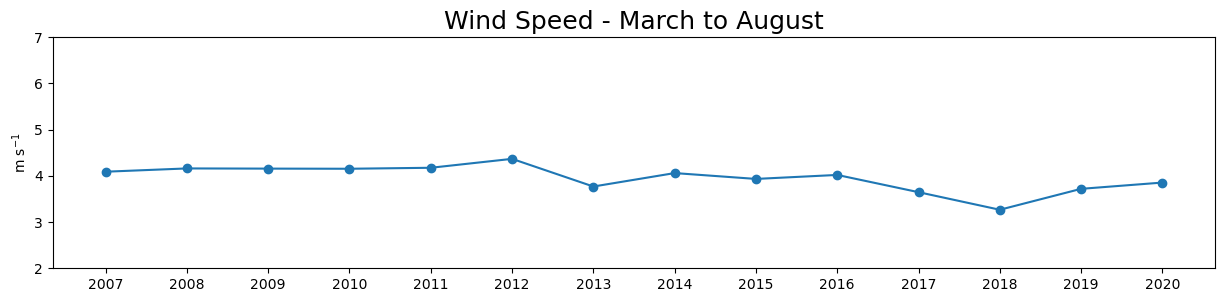

In [127]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[SprSummer2007,SprSummer2008,SprSummer2009,SprSummer2010,SprSummer2011,SprSummer2012,SprSummer2013,SprSummer2014,SprSummer2015,SprSummer2016,SprSummer2017,SprSummer2018,SprSummer2019,SprSummer2020]


ax.plot(x, y,marker='o',label='')

ax.set_title('Wind Speed - March to August',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(2,7)
ax.set_ylabel('m s$^{-1}$')


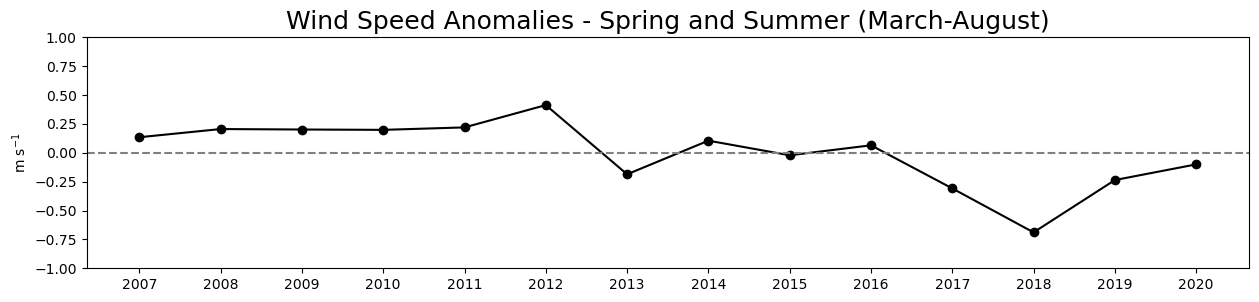

In [85]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[SprSummer2007-SprSummerClimatology,SprSummer2008-SprSummerClimatology,SprSummer2009-SprSummerClimatology,\
   SprSummer2010-SprSummerClimatology,SprSummer2011-SprSummerClimatology,SprSummer2012-SprSummerClimatology,\
   SprSummer2013-SprSummerClimatology,SprSummer2014-SprSummerClimatology,SprSummer2015-SprSummerClimatology,\
   SprSummer2016-SprSummerClimatology,SprSummer2017-SprSummerClimatology,SprSummer2018-SprSummerClimatology,\
   SprSummer2019-SprSummerClimatology,SprSummer2020-SprSummerClimatology]


ax.plot(x, y,marker='o',label='',color='k')
#ax.bar(x,y,color='k')

ax.set_title('Wind Speed Anomalies - Spring and Summer (March-August)',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(-1,1)
ax.set_ylabel('m s$^{-1}$')
ax.axhline(y=0,color='grey',linestyle='--')


In [86]:
Annual2007=(Feb2007+Mar2007+Apr2007+May2007+Jun2007+Jul2007+Aug2007+Sep2007+Oct2007+Nov2007+Dec2007)/11
Annual2008=(Jan2008+Feb2008+Mar2008+Apr2008+May2008+Jun2008+Jul2008+Aug2008+Sep2008+Oct2008+Nov2008+Dec2008)/12
Annual2009=(Jan2009+Feb2009+Mar2009+Apr2009+May2009+Jun2009+Jul2009+Aug2009+Sep2009+Oct2009+Nov2009+Dec2009)/12
Annual2010=(Jan2010+Feb2010+Mar2010+Apr2010+May2010+Jun2010+Jul2010+Aug2010+Sep2010+Oct2010+Nov2010+Dec2010)/12
Annual2011=(Jan2011+Feb2011+Mar2011+Apr2011+May2011+Jun2011+Jul2011+Aug2011+Sep2011+Oct2011+Nov2011+Dec2011)/12
Annual2012=(Jan2012+Feb2012+Mar2012+Apr2012+May2012+Jun2012+Jul2012+Aug2012+Sep2012+Oct2012+Nov2012+Dec2012)/12
Annual2013=(Jan2013+Feb2013+Mar2013+Apr2013+May2013+Jun2013+Jul2013+Aug2013+Sep2013+Oct2013+Nov2013+Dec2013)/12
Annual2014=(Jan2014+Feb2014+Mar2014+Apr2014+May2014+Jun2014+Jul2014+Aug2014+Sep2014+Oct2014+Nov2014)/11
Annual2015=(Jan2015+Feb2015+Mar2015+Apr2015+May2015+Jun2015+Jul2015+Aug2015+Sep2015+Oct2015+Nov2015+Dec2015)/12
Annual2016=(Jan2016+Feb2016+Mar2016+Apr2016+May2016+Jun2016+Jul2016+Aug2016+Sep2016+Oct2016+Nov2016+Dec2016)/12
Annual2017=(Jan2017+Feb2017+Mar2017+Apr2017+May2017+Jun2017+Jul2017+Aug2017+Sep2017+Oct2017+Nov2017+Dec2017)/12
Annual2018=(Jan2018+Feb2018+Mar2018+Apr2018+May2018+Jun2018+Jul2018+Aug2018+Sep2018+Oct2018+Nov2018+Dec2018)/12
Annual2019=(Jan2019+Feb2019+Mar2019+Apr2019+May2019+Jun2019+Jul2019+Aug2019+Sep2019+Oct2019+Nov2019+Dec2019)/12
Annual2020=(Jan2020+Feb2020+Mar2020+Apr2020+May2020+Jun2020+Jul2020+Aug2020+Sep2020+Oct2020+Nov2020+Dec2020)/12

In [87]:
AnnualClimatology=(Annual2007+Annual2008+Annual2009+Annual2010+Annual2011+Annual2012+Annual2013+Annual2014+Annual2015+\
                  Annual2016+Annual2017+Annual2018+Annual2019+Annual2020)/14

Text(0, 0.5, 'm s$^{-1}$')

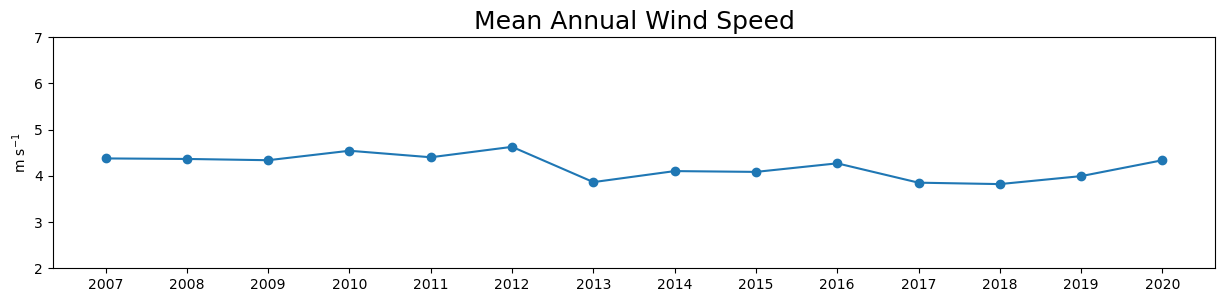

In [126]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[Annual2007,Annual2008,Annual2009,Annual2010,Annual2011,Annual2012,Annual2013,Annual2014,Annual2015,Annual2016,Annual2017,Annual2018,Annual2019,Annual2020]


ax.plot(x, y,marker='o',label='')

ax.set_title('Mean Annual Wind Speed',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(2,7)
ax.set_ylabel('m s$^{-1}$')


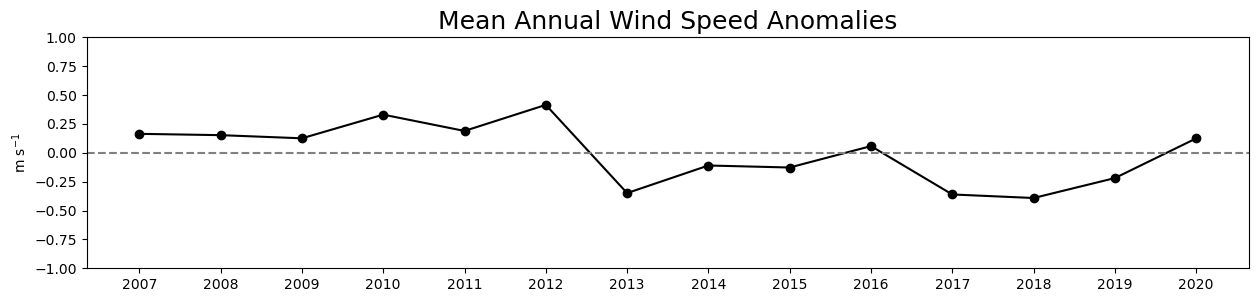

In [89]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[Annual2007-AnnualClimatology,Annual2008-AnnualClimatology,Annual2009-AnnualClimatology,\
Annual2010-AnnualClimatology,Annual2011-AnnualClimatology,Annual2012-AnnualClimatology,\
Annual2013-AnnualClimatology,Annual2014-AnnualClimatology,Annual2015-AnnualClimatology,\
Annual2016-AnnualClimatology,Annual2017-AnnualClimatology,Annual2018-AnnualClimatology,\
Annual2019-AnnualClimatology,Annual2020-AnnualClimatology]


ax.plot(x, y,marker='o',label='',color='k')
#ax.bar(x,y,color='k')

ax.set_title('Mean Annual Wind Speed Anomalies',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(-1,1)
ax.set_ylabel('m s$^{-1}$')
ax.axhline(y=0,color='grey',linestyle='--')


In [90]:
print(Annual2007-AnnualClimatology,Annual2008-AnnualClimatology,Annual2009-AnnualClimatology,\
Annual2010-AnnualClimatology,Annual2011-AnnualClimatology,Annual2012-AnnualClimatology,\
Annual2013-AnnualClimatology,Annual2014-AnnualClimatology,Annual2015-AnnualClimatology,\
Annual2016-AnnualClimatology,Annual2017-AnnualClimatology,Annual2018-AnnualClimatology,\
Annual2019-AnnualClimatology,Annual2020-AnnualClimatology)

0.1639892693721885 0.15258346904407816 0.1253385832815459 0.330263484608043 0.1889804493297227 0.4146763772675488 -0.3489137996326792 -0.11017059557365627 -0.1274998693755176 0.057814626982717776 -0.3609246918649385 -0.3916024872750947 -0.2190433848987925 0.12450856873483396


In [91]:
print(Jan_C,Feb_C, Mar_C, Apr_C,May_C,\
      Jun_C, Jul_C,Aug_C,Sep_C,Oct_C,\
     Nov_C,Dec_C)

5.216588020324707 4.883832931518555 5.353035926818848 4.424528121948242 3.994469165802002 3.8667848110198975 3.8667848110198975 3.783360481262207 3.613126754760742 4.432134628295898 5.267931938171387 5.313381195068359


In [92]:
print(Jan_W,Feb_W, Mar_W, Apr_W,May_W,\
      Jun_W,Jul_W,Aug_W,Sep_W,Oct_W,\
     Nov_W,Dec_W)

4.935733318328857 4.702711582183838 3.62410831451416 4.1799235343933105 3.329972505569458 3.7586867809295654 3.7586867809295654 3.5119287967681885 3.80841326713562 3.9070136547088623 4.426621437072754 5.418337821960449


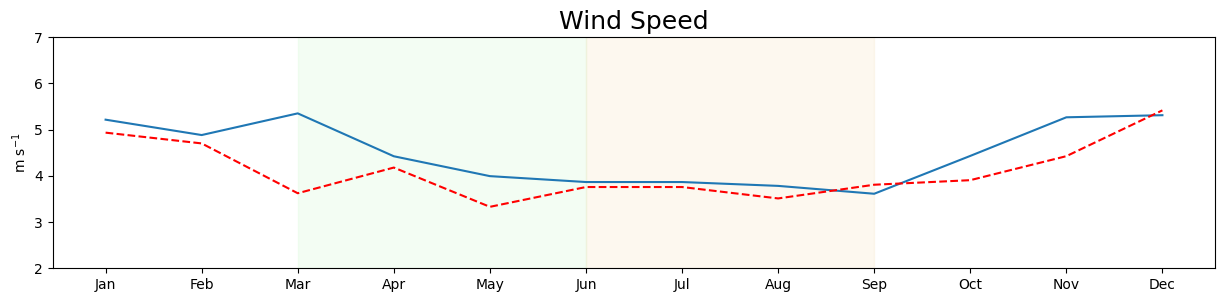

In [119]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y=[Jan_C,Feb_C,Mar_C,Apr_C,May_C,Jun_C,Jul_C,Aug_C,Sep_C,Oct_C,Nov_C,Dec_C]
y2=[Jan_W,Feb_W,Mar_W,Apr_W,May_W,Jun_W,Jul_W,Aug_W,Sep_W,Oct_W,Nov_W,Dec_W]

ax.plot(x, y,label='NPGO+ coldest')
ax.plot(x, y2,label='NPGO- warmest',color='r',linestyle='--')

ax.set_title('Wind Speed',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(2,7)
ax.set_ylabel('m s$^{-1}$')

a=2
b=5
c=5
d=8
plt.fill([a, a, b, b], [0, 200, 200, 0], color = 'lightgreen', alpha = 0.1)
plt.fill([c, c, d, d], [0, 200, 200, 0], color = 'wheat', alpha = 0.2)

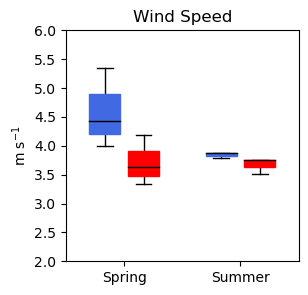

In [118]:
def color_boxplot(data, color, pos=[0], ax=None):
    ax = ax or plt.gca()
    bp = ax.boxplot(data, patch_artist=True,  showmeans=False, positions=pos,widths=0.4)
    for item in ['boxes']:
        plt.setp(bp[item], color=color)
    for item in ['whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[item], color='k')


data1 = [Mar_C,Apr_C,May_C]
data2 = [Mar_W,Apr_W,May_W]
data3 = [Jun_C,Jul_C,Aug_C]
data4 = [Jun_W,Jul_W,Aug_W]

fig, ax = plt.subplots(figsize=(3,3))
bp1 = color_boxplot(data1, 'royalblue', [1])
bp2 = color_boxplot(data2, 'r', [1.5])
bp3 = color_boxplot(data3, 'royalblue', [2.5])
bp4 = color_boxplot(data4, 'r', [3])
#ax.autoscale()
ax.set(xticks=[1.25,2.75], xticklabels=['Spring','Summer'])
ax.set_ylim(2,6)
ax.set_ylabel('m s$^{-1}$')
ax.set_title('Wind Speed') #(with 2015)
#ax.legend([bp1["boxes"], bp2["boxes"], ['A', 'B'], loc='upper right')
plt.show()

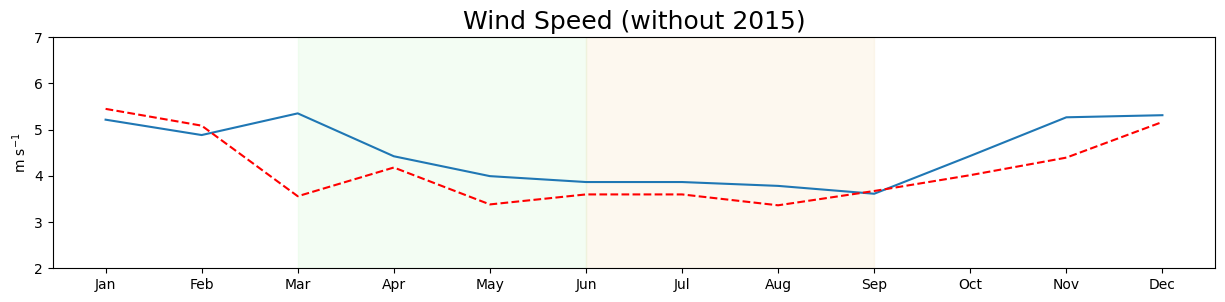

In [117]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y=[Jan_C,Feb_C,Mar_C,Apr_C,May_C,Jun_C,Jul_C,Aug_C,Sep_C,Oct_C,Nov_C,Dec_C]
y2=[Jan_3W,Feb_3W,Mar_3W,Apr_3W,May_3W,Jun_3W,Jul_3W,Aug_3W,Sep_3W,Oct_3W,Nov_3W,Dec_3W]

ax.plot(x, y,label='NPGO+ coldest')
ax.plot(x, y2,label='NPGO- warmest',color='r',linestyle='--')

ax.set_title('Wind Speed (without 2015)',fontsize=18)
ax.legend((),frameon=False)
ax.set_ylim(2,7)
ax.set_ylabel('m s$^{-1}$')

a=2
b=5
c=5
d=8
plt.fill([a, a, b, b], [0, 200, 200, 0], color = 'lightgreen', alpha = 0.1)
plt.fill([c, c, d, d], [0, 200, 200, 0], color = 'wheat', alpha = 0.2)

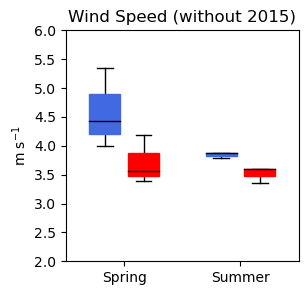

In [116]:
def color_boxplot(data, color, pos=[0], ax=None):
    ax = ax or plt.gca()
    bp = ax.boxplot(data, patch_artist=True,  showmeans=False, positions=pos,widths=0.4)
    for item in ['boxes']:
        plt.setp(bp[item], color=color)
    for item in ['whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[item], color='k')


data1 = [Mar_C,Apr_C,May_C]
data2 = [Mar_3W,Apr_3W,May_3W]
data3 = [Jun_C,Jul_C,Aug_C]
data4 = [Jun_3W,Jul_3W,Aug_3W]

fig, ax = plt.subplots(figsize=(3,3))
bp1 = color_boxplot(data1, 'royalblue', [1])
bp2 = color_boxplot(data2, 'r', [1.5])
bp3 = color_boxplot(data3, 'royalblue', [2.5])
bp4 = color_boxplot(data4, 'r', [3])
#ax.autoscale()
ax.set(xticks=[1.25,2.75], xticklabels=['Spring','Summer'])
ax.set_ylim(2,6)
ax.set_ylabel('m s$^{-1}$')
ax.set_title('Wind Speed (without 2015)')
#ax.legend([bp1["boxes"], bp2["boxes"], ['A', 'B'], loc='upper right')
plt.show()

Text(0, 0.5, 'm s$^{-1}$')

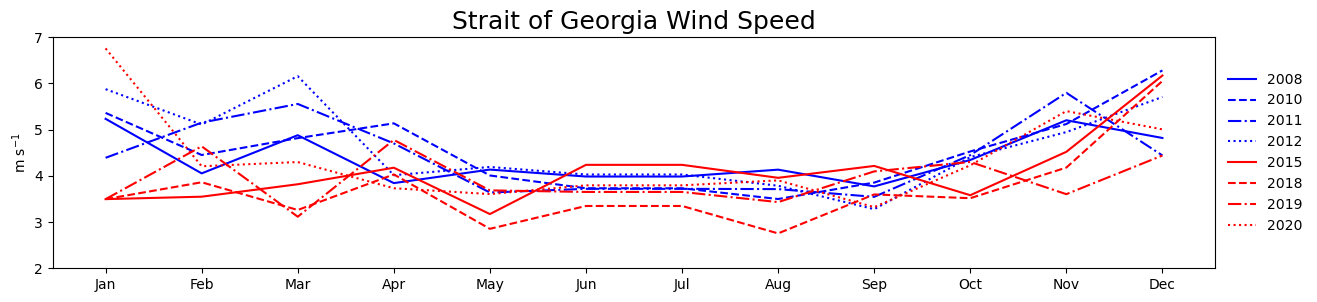

In [120]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y1=[None,Feb2007,Mar2007,Apr2007,May2007,Jun2007,Jul2007,Aug2007,Sep2007,Oct2007,Nov2007,Dec2007]
y2=[Jan2008,Feb2008,Mar2008,Apr2008,May2008,Jun2008,Jul2008,Aug2008,Sep2008,Oct2008,Nov2008,Dec2008]
y3=[Jan2009,Feb2009,Mar2009,Apr2009,May2009,Jun2009,Jul2009,Aug2009,Sep2009,Oct2009,Nov2009,Dec2009]
y4=[Jan2010,Feb2010,Mar2010,Apr2010,May2010,Jun2010,Jul2010,Aug2010,Sep2010,Oct2010,Nov2010,Dec2010]
y5=[Jan2011,Feb2011,Mar2011,Apr2011,May2011,Jun2011,Jul2011,Aug2011,Sep2011,Oct2011,Nov2011,Dec2011]
y6=[Jan2012,Feb2012,Mar2012,Apr2012,May2012,Jun2012,Jul2012,Aug2012,Sep2012,Oct2012,Nov2012,Dec2012]
y7=[Jan2013,Feb2013,Mar2013,Apr2013,May2013,Jun2013,Jul2013,Aug2013,Sep2013,Oct2013,Nov2013,Dec2013]
y8=[Jan2013,Feb2014,Mar2014,Apr2014,May2014,Jun2014,Jul2014,Aug2014,Sep2014,Oct2014,Nov2014,None]
y9=[Jan2013,Feb2015,Mar2015,Apr2015,May2015,Jun2015,Jul2015,Aug2015,Sep2015,Oct2015,Nov2015,Dec2015]
y10=[Jan2013,Feb2016,Mar2016,Apr2016,May2016,Jun2016,Jul2016,Aug2016,Sep2016,Oct2016,Nov2016,Dec2016]
y11=[Jan2013,Feb2017,Mar2017,Apr2017,May2017,Jun2017,Jul2017,Aug2017,Sep2017,Oct2017,Nov2017,Dec2017]
y12=[Jan2013,Feb2018,Mar2018,Apr2018,May2018,Jun2018,Jul2018,Aug2018,Sep2018,Oct2018,Nov2018,Dec2018]
y13=[Jan2013,Feb2019,Mar2019,Apr2019,May2019,Jun2019,Jul2019,Aug2019,Sep2019,Oct2019,Nov2019,Dec2019]
y14=[Jan2020,Feb2020,Mar2020,Apr2020,May2020,Jun2020,Jul2020,Aug2020,Sep2020,Oct2020,Nov2020,Dec2020]

#ax.plot(x, y1,label='2007')
ax.plot(x, y2,label='2008',color='b',linestyle='-')
#ax.plot(x, y3,label='2009')
ax.plot(x, y4,label='2010',color='b',linestyle='--')
ax.plot(x, y5,label='2011',color='b',linestyle='-.')
ax.plot(x, y6,label='2012',color='b',linestyle=':')
#ax.plot(x, y7,label='2013')
#ax.plot(x, y8,label='2014',linestyle='--'
#ax.plot(x, y9,label='2015',linestyle='--')
#ax.plot(x, y10,label='2016',linestyle='--')
ax.plot(x, y9,label='2015',color='r',linestyle='-')
ax.plot(x, y12,label='2018',color='r',linestyle='--')
ax.plot(x, y13,label='2019',color='r',linestyle='-.')
ax.plot(x, y14,label='2020',color='r',linestyle=':')

ax.set_title('Strait of Georgia Wind Speed',fontsize=18)
ax.legend(frameon=False,loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylim(2,7)
ax.set_ylabel('m s$^{-1}$')

Text(0, 0.5, 'm s$^{-1}$')

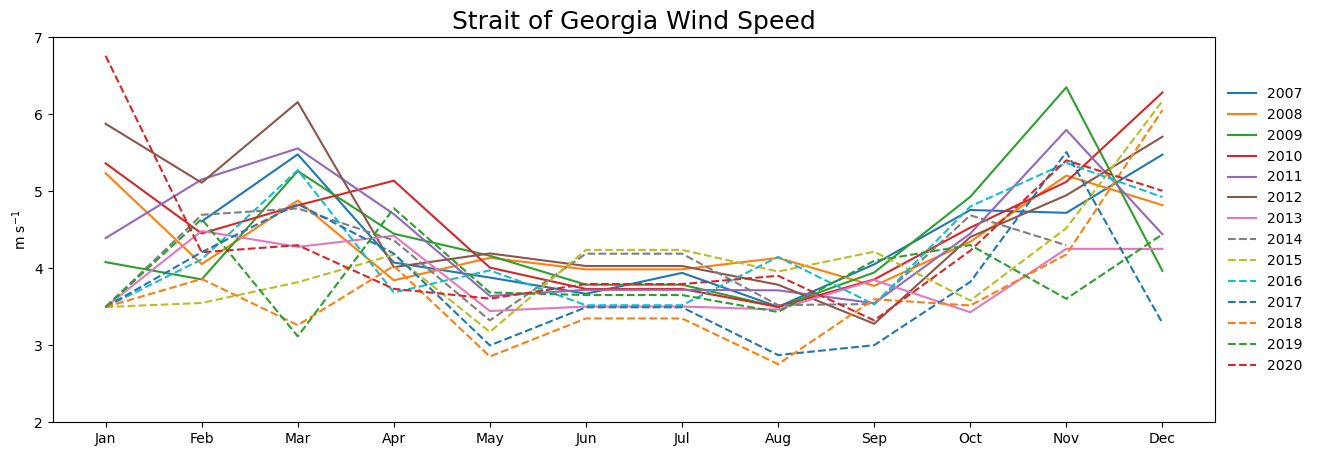

In [121]:
fig, ax = plt.subplots(figsize=(15, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y1=[None,Feb2007,Mar2007,Apr2007,May2007,Jun2007,Jul2007,Aug2007,Sep2007,Oct2007,Nov2007,Dec2007]
y2=[Jan2008,Feb2008,Mar2008,Apr2008,May2008,Jun2008,Jul2008,Aug2008,Sep2008,Oct2008,Nov2008,Dec2008]
y3=[Jan2009,Feb2009,Mar2009,Apr2009,May2009,Jun2009,Jul2009,Aug2009,Sep2009,Oct2009,Nov2009,Dec2009]
y4=[Jan2010,Feb2010,Mar2010,Apr2010,May2010,Jun2010,Jul2010,Aug2010,Sep2010,Oct2010,Nov2010,Dec2010]
y5=[Jan2011,Feb2011,Mar2011,Apr2011,May2011,Jun2011,Jul2011,Aug2011,Sep2011,Oct2011,Nov2011,Dec2011]
y6=[Jan2012,Feb2012,Mar2012,Apr2012,May2012,Jun2012,Jul2012,Aug2012,Sep2012,Oct2012,Nov2012,Dec2012]
y7=[Jan2013,Feb2013,Mar2013,Apr2013,May2013,Jun2013,Jul2013,Aug2013,Sep2013,Oct2013,Nov2013,Dec2013]
y8=[Jan2013,Feb2014,Mar2014,Apr2014,May2014,Jun2014,Jul2014,Aug2014,Sep2014,Oct2014,Nov2014,None]
y9=[Jan2013,Feb2015,Mar2015,Apr2015,May2015,Jun2015,Jul2015,Aug2015,Sep2015,Oct2015,Nov2015,Dec2015]
y10=[Jan2013,Feb2016,Mar2016,Apr2016,May2016,Jun2016,Jul2016,Aug2016,Sep2016,Oct2016,Nov2016,Dec2016]
y11=[Jan2013,Feb2017,Mar2017,Apr2017,May2017,Jun2017,Jul2017,Aug2017,Sep2017,Oct2017,Nov2017,Dec2017]
y12=[Jan2013,Feb2018,Mar2018,Apr2018,May2018,Jun2018,Jul2018,Aug2018,Sep2018,Oct2018,Nov2018,Dec2018]
y13=[Jan2013,Feb2019,Mar2019,Apr2019,May2019,Jun2019,Jul2019,Aug2019,Sep2019,Oct2019,Nov2019,Dec2019]
y14=[Jan2020,Feb2020,Mar2020,Apr2020,May2020,Jun2020,Jul2020,Aug2020,Sep2020,Oct2020,Nov2020,Dec2020]

ax.plot(x, y1,label='2007')
ax.plot(x, y2,label='2008')
ax.plot(x, y3,label='2009')
ax.plot(x, y4,label='2010')
ax.plot(x, y5,label='2011')
ax.plot(x, y6,label='2012')
ax.plot(x, y7,label='2013')
ax.plot(x, y8,label='2014',linestyle='--')
ax.plot(x, y9,label='2015',linestyle='--')
ax.plot(x, y10,label='2016',linestyle='--')
ax.plot(x, y11,label='2017',linestyle='--')
ax.plot(x, y12,label='2018',linestyle='--')
ax.plot(x, y13,label='2019',linestyle='--')
ax.plot(x, y14,label='2020',linestyle='--')

ax.set_title('Strait of Georgia Wind Speed',fontsize=18)
ax.legend(frameon=False,loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylim(2,7)
ax.set_ylabel('m s$^{-1}$')

In [122]:
JanMean=(Jan2008+Jan2009+Jan2010+Jan2011+Jan2012+Jan2013+Jan2014+Jan2015+Jan2016+Jan2017+Jan2018+Jan2019+Jan2020)/13
FebMean=(Feb2007+Feb2008+Feb2009+Feb2010+Feb2011+Feb2012+Feb2013+Feb2014+Feb2015+Feb2016+Feb2017+Feb2018+Feb2019+Feb2020)/14
MarMean=(Mar2007+Mar2008+Mar2009+Mar2010+Mar2011+Mar2012+Mar2013+Mar2014+Mar2015+Mar2016+Mar2017+Mar2018+Mar2019+Mar2020)/14
AprMean=(Apr2007+Apr2008+Apr2009+Apr2010+Apr2011+Apr2012+Apr2013+Apr2014+Apr2015+Apr2016+Apr2017+Apr2018+Apr2019+Apr2020)/14
MayMean=(May2007+May2008+May2009+May2010+May2011+May2012+May2013+May2014+May2015+May2016+May2017+May2018+May2019+May2020)/14
JunMean=(Jun2007+Jun2008+Jun2009+Jun2010+Jun2011+Jun2012+Jun2013+Jun2014+Jun2015+Jun2016+Jun2017+Jun2018+Jun2019+Jun2020)/14
JulMean=(Jul2007+Jul2008+Jul2009+Jul2010+Jul2011+Jul2012+Jul2013+Jul2014+Jul2015+Jul2016+Jul2017+Jul2018+Jul2019+Jul2020)/14
AugMean=(Aug2007+Aug2008+Aug2009+Aug2010+Aug2011+Aug2012+Aug2013+Aug2014+Aug2015+Aug2016+Aug2017+Aug2018+Aug2019+Aug2020)/14
SepMean=(Sep2007+Sep2008+Sep2009+Sep2010+Sep2011+Sep2012+Sep2013+Sep2014+Sep2015+Sep2016+Sep2017+Sep2018+Sep2019+Sep2020)/14
OctMean=(Oct2007+Oct2008+Oct2009+Oct2010+Oct2011+Oct2012+Oct2013+Oct2014+Oct2015+Oct2016+Oct2017+Oct2018+Oct2019+Oct2020)/14
NovMean=(Nov2007+Nov2008+Nov2009+Nov2010+Nov2011+Nov2012+Nov2013+Nov2014+Nov2015+Nov2016+Nov2017+Nov2018+Nov2019+Nov2020)/14
DecMean=(Dec2007+Dec2008+Dec2009+Dec2010+Dec2011+Dec2012+Dec2013+Dec2015+Dec2016+Dec2017+Dec2018+Dec2019+Dec2020)/13

Text(0, 0.5, 'Anomalies (m s$^{-1}$)')

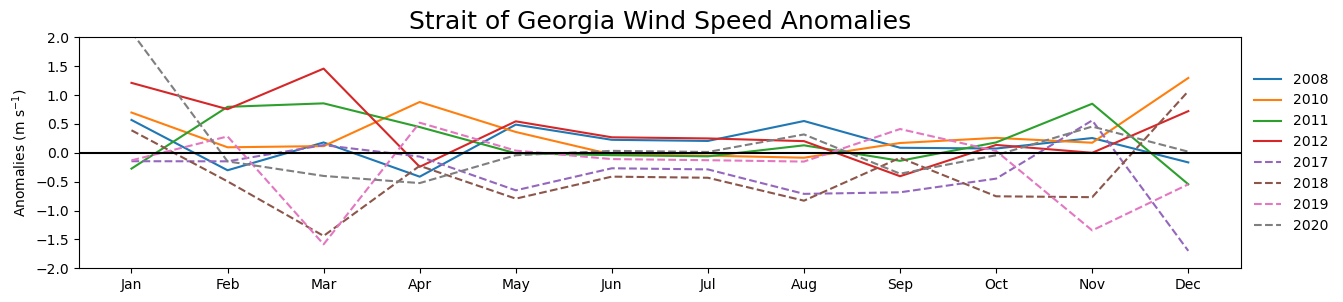

In [123]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y1=[None,(Feb2007-FebMean),(Mar2007-MarMean),(Apr2007-AprMean),(May2007-MayMean),(Jun2007-JunMean),(Jul2007-JulMean),(Aug2007-AugMean),(Sep2007-SepMean),(Oct2007-OctMean),(Nov2007-NovMean),(Dec2007-DecMean)]
y2=[(Jan2008-JanMean),(Feb2008-FebMean),(Mar2008-MarMean),(Apr2008-AprMean),(May2008-MayMean),(Jun2008-JunMean),(Jul2008-JulMean),(Aug2008-AugMean),(Sep2008-SepMean),(Oct2008-OctMean),(Nov2008-NovMean),(Dec2008-DecMean)]
#y3=[(Jan2009-JanMean),(Feb2009-FebMean),(Mar2009-MarMean),(Apr2009-AprMean),(May2009-MayMean),(Jun2009-JunMean),(Jul2009-JulMean),(Aug2009-AugMean),(Sep2009-SepMean),(Oct2009-OctMean),(Nov2009-NovMean),(Dec2009-DecMean)]
y4=[(Jan2010-JanMean),(Feb2010-FebMean),(Mar2010-MarMean),(Apr2010-AprMean),(May2010-MayMean),(Jun2010-JunMean),(Jul2010-JulMean),(Aug2010-AugMean),(Sep2010-SepMean),(Oct2010-OctMean),(Nov2010-NovMean),(Dec2010-DecMean)]
y5=[(Jan2011-JanMean),(Feb2011-FebMean),(Mar2011-MarMean),(Apr2011-AprMean),(May2011-MayMean),(Jun2011-JunMean),(Jul2011-JulMean),(Aug2011-AugMean),(Sep2011-SepMean),(Oct2011-OctMean),(Nov2011-NovMean),(Dec2011-DecMean)]
y6=[(Jan2012-JanMean),(Feb2012-FebMean),(Mar2012-MarMean),(Apr2012-AprMean),(May2012-MayMean),(Jun2012-JunMean),(Jul2012-JulMean),(Aug2012-AugMean),(Sep2012-SepMean),(Oct2012-OctMean),(Nov2012-NovMean),(Dec2012-DecMean)]
y7=[(Jan2013-JanMean),(Feb2013-FebMean),(Mar2013-MarMean),(Apr2013-AprMean),(May2013-MayMean),(Jun2013-JunMean),(Jul2013-JulMean),(Aug2013-AugMean),(Sep2013-SepMean),(Oct2013-OctMean),(Nov2013-NovMean),(Dec2013-DecMean)]
y8=[(Jan2014-JanMean),(Feb2014-FebMean),(Mar2014-MarMean),(Apr2014-AprMean),(May2014-MayMean),(Jun2014-JunMean),(Jul2014-JulMean),(Aug2014-AugMean),(Sep2014-SepMean),(Oct2014-OctMean),(Nov2014-NovMean),None]
y9=[(Jan2015-JanMean),(Feb2015-FebMean),(Mar2015-MarMean),(Apr2015-AprMean),(May2015-MayMean),(Jun2015-JunMean),(Jul2015-JulMean),(Aug2015-AugMean),(Sep2015-SepMean),(Oct2015-OctMean),(Nov2015-NovMean),(Dec2015-DecMean)]
y10=[(Jan2016-JanMean),(Feb2016-FebMean),(Mar2016-MarMean),(Apr2016-AprMean),(May2016-MayMean),(Jun2016-JunMean),(Jul2016-JulMean),(Aug2016-AugMean),(Sep2016-SepMean),(Oct2016-OctMean),(Nov2016-NovMean),(Dec2016-DecMean)]
y11=[(Jan2017-JanMean),(Feb2017-FebMean),(Mar2017-MarMean),(Apr2017-AprMean),(May2017-MayMean),(Jun2017-JunMean),(Jul2017-JulMean),(Aug2017-AugMean),(Sep2017-SepMean),(Oct2017-OctMean),(Nov2017-NovMean),(Dec2017-DecMean)]
y12=[(Jan2018-JanMean),(Feb2018-FebMean),(Mar2018-MarMean),(Apr2018-AprMean),(May2018-MayMean),(Jun2018-JunMean),(Jul2018-JulMean),(Aug2018-AugMean),(Sep2018-SepMean),(Oct2018-OctMean),(Nov2018-NovMean),(Dec2018-DecMean)]
y13=[(Jan2019-JanMean),(Feb2019-FebMean),(Mar2019-MarMean),(Apr2019-AprMean),(May2019-MayMean),(Jun2019-JunMean),(Jul2019-JulMean),(Aug2019-AugMean),(Sep2019-SepMean),(Oct2019-OctMean),(Nov2019-NovMean),(Dec2019-DecMean)]
y14=[(Jan2020-JanMean),(Feb2020-FebMean),(Mar2020-MarMean),(Apr2020-AprMean),(May2020-MayMean),(Jun2020-JunMean),(Jul2020-JulMean),(Aug2020-AugMean),(Sep2020-SepMean),(Oct2020-OctMean),(Nov2020-NovMean),(Dec2020-DecMean)]

#ax.plot(x, y1,label='2007')
ax.plot(x, y2,label='2008')
#ax.plot(x, y3,label='2009')
ax.plot(x, y4,label='2010')
ax.plot(x, y5,label='2011')
ax.plot(x, y6,label='2012')
#ax.plot(x, y7,label='2013')
#ax.plot(x, y8,label='2014',linestyle='--')
#ax.plot(x, y9,label='2015',linestyle='--')
#ax.plot(x, y10,label='2016',linestyle='--')
ax.plot(x, y11,label='2017',linestyle='--')
ax.plot(x, y12,label='2018',linestyle='--')
ax.plot(x, y13,label='2019',linestyle='--')
ax.plot(x, y14,label='2020',linestyle='--')
ax.axhline(y=0,linestyle='-',color='k')

ax.set_title('Strait of Georgia Wind Speed Anomalies',fontsize=18)
ax.legend(frameon=False,loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylim(-2,2)
ax.set_ylabel('Anomalies (m s$^{-1}$)')

In [124]:
Jan_Clim=(Jan2008+Jan2009+Jan2010+Jan2011+Jan2012+Jan2013+Jan2014+Jan2015+Jan2016+Jan2017+Jan2018+Jan2019+Jan2020)/13

Text(0, 0.5, 'm s$^{-1}$')

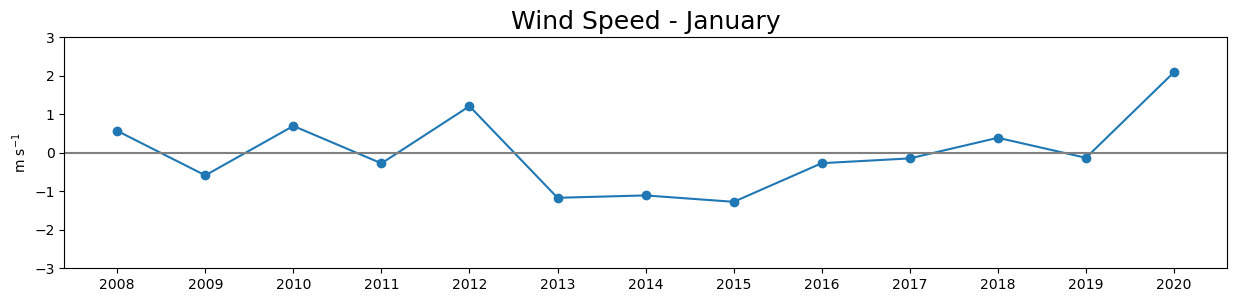

In [125]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[None,(Jan2008-Jan_Clim),(Jan2009-Jan_Clim),(Jan2010-Jan_Clim),(Jan2011-Jan_Clim),(Jan2012-Jan_Clim),(Jan2013-Jan_Clim),(Jan2014-Jan_Clim),(Jan2015-Jan_Clim),(Jan2016-Jan_Clim),(Jan2017-Jan_Clim),(Jan2018-Jan_Clim),(Jan2019-Jan_Clim),(Jan2020-Jan_Clim)]


ax.plot(x, y,marker='o',label='')

ax.set_title('Wind Speed - January',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(-3,3)
ax.axhline(y=0,color='grey')
ax.set_ylabel('m s$^{-1}$')

In [103]:
Feb_Clim=(Feb2007+Feb2008+Feb2009+Feb2010+Feb2011+Feb2012+Feb2013+Feb2014+Feb2015+Feb2016+Feb2017+Feb2018+Feb2019+Feb2020)/14

Text(0, 0.5, 'm s$^{-1}$')

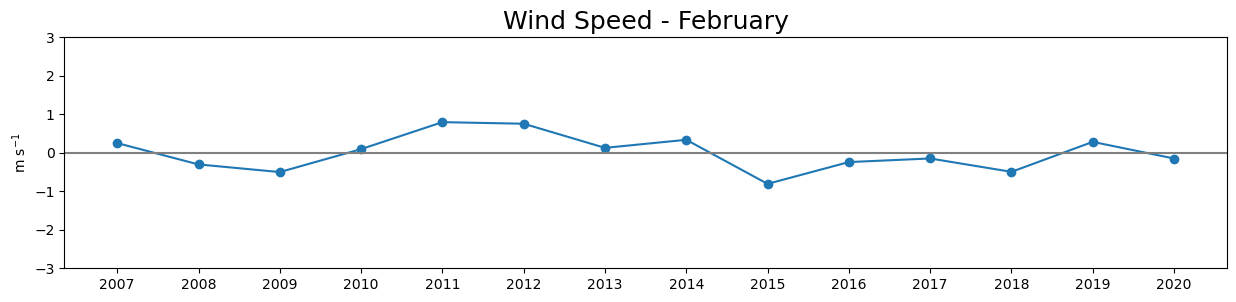

In [104]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[(Feb2007-Feb_Clim),(Feb2008-Feb_Clim),(Feb2009-Feb_Clim),(Feb2010-Feb_Clim),(Feb2011-Feb_Clim),(Feb2012-Feb_Clim),(Feb2013-Feb_Clim),(Feb2014-Feb_Clim),(Feb2015-Feb_Clim),(Feb2016-Feb_Clim),(Feb2017-Feb_Clim),(Feb2018-Feb_Clim),(Feb2019-Feb_Clim),(Feb2020-Feb_Clim)]


ax.plot(x, y,marker='o',label='')

ax.set_title('Wind Speed - February',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(-3,3)
ax.axhline(y=0,color='grey')
ax.set_ylabel('m s$^{-1}$')

In [105]:
Mar_Clim=(Mar2007+Mar2008+Mar2009+Mar2010+Mar2011+Mar2012+Mar2013+Mar2014+Mar2015+Mar2016+Mar2017+Mar2018+Mar2019+Mar2020)/14

Text(0, 0.5, 'm s$^{-1}$')

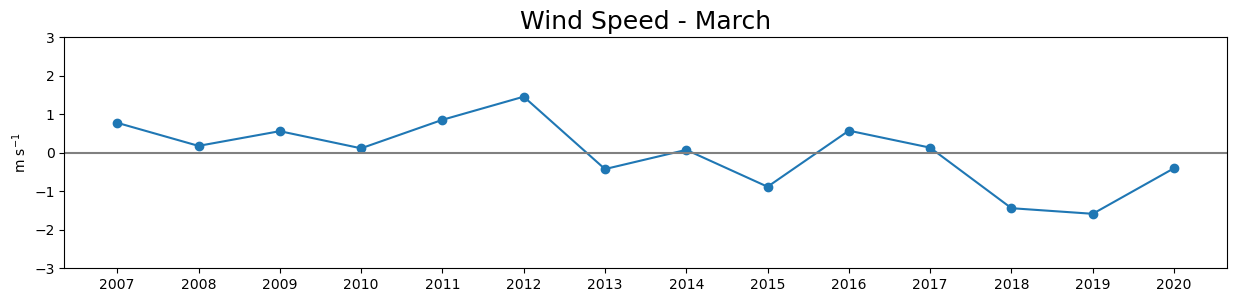

In [106]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[(Mar2007-Mar_Clim),(Mar2008-Mar_Clim),(Mar2009-Mar_Clim),(Mar2010-Mar_Clim),(Mar2011-Mar_Clim),(Mar2012-Mar_Clim),(Mar2013-Mar_Clim),(Mar2014-Mar_Clim),(Mar2015-Mar_Clim),(Mar2016-Mar_Clim),(Mar2017-Mar_Clim),(Mar2018-Mar_Clim),(Mar2019-Mar_Clim),(Mar2020-Mar_Clim)]


ax.plot(x, y,marker='o',label='')

ax.set_title('Wind Speed - March',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(-3,3)
ax.axhline(y=0,color='grey')
ax.set_ylabel('m s$^{-1}$')

In [107]:
Apr_Clim=(Apr2007+Apr2008+Apr2009+Apr2010+Apr2011+Apr2012+Apr2013+Apr2014+Apr2015+Apr2016+Apr2017+Apr2018+Apr2019+Apr2020)/14

Text(0, 0.5, 'm s$^{-1}$')

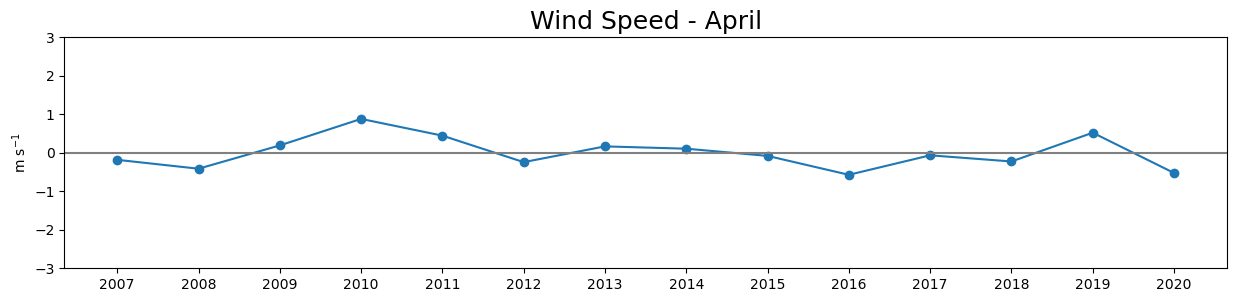

In [108]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[(Apr2007-Apr_Clim),(Apr2008-Apr_Clim),(Apr2009-Apr_Clim),(Apr2010-Apr_Clim),(Apr2011-Apr_Clim),(Apr2012-Apr_Clim),(Apr2013-Apr_Clim),(Apr2014-Apr_Clim),(Apr2015-Apr_Clim),(Apr2016-Apr_Clim),(Apr2017-Apr_Clim),(Apr2018-Apr_Clim),(Apr2019-Apr_Clim),(Apr2020-Apr_Clim)]


ax.plot(x, y,marker='o',label='')

ax.set_title('Wind Speed - April',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(-3,3)
ax.axhline(y=0,color='grey')
ax.set_ylabel('m s$^{-1}$')

In [109]:
May_Clim=(May2007+May2008+May2009+May2010+May2011+May2012+May2013+May2014+May2015+May2016+May2017+May2018+May2019+May2020)/14

Text(0, 0.5, 'm s$^{-1}$')

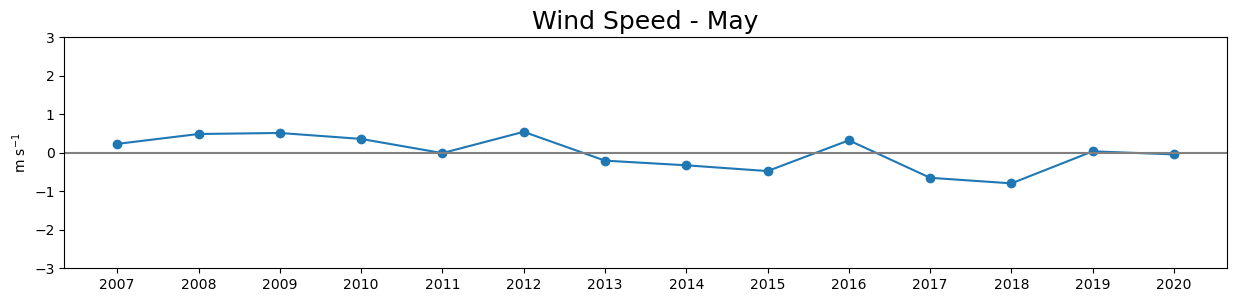

In [110]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[(May2007-May_Clim),(May2008-May_Clim),(May2009-May_Clim),(May2010-May_Clim),(May2011-May_Clim),(May2012-May_Clim),(May2013-May_Clim),(May2014-May_Clim),(May2015-May_Clim),(May2016-May_Clim),(May2017-May_Clim),(May2018-May_Clim),(May2019-May_Clim),(May2020-May_Clim)]


ax.plot(x, y,marker='o',label='')

ax.set_title('Wind Speed - May',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(-3,3)
ax.axhline(y=0,color='grey')
ax.set_ylabel('m s$^{-1}$')

In [111]:
Jun_Clim=(Jun2007+Jun2008+Jun2009+Jun2010+Jun2011+Jun2012+Jun2013+Jun2014+Jun2015+Jun2016+Jun2017+Jun2018+Jun2019+Jun2020)/14

Text(0, 0.5, 'm s$^{-1}$')

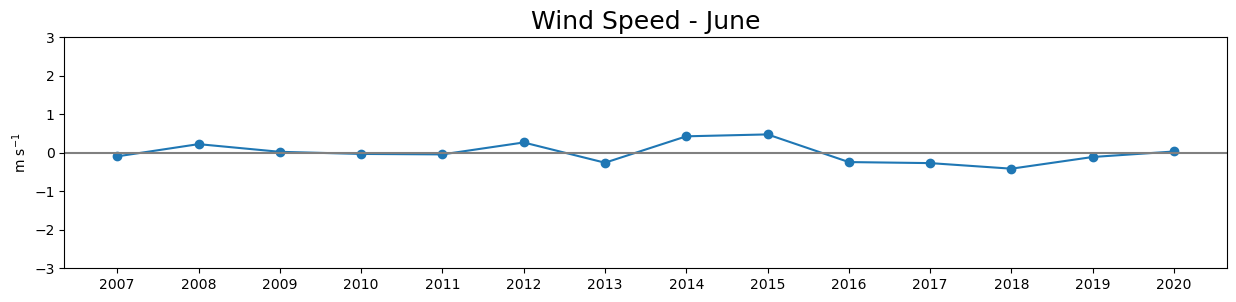

In [112]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[(Jun2007-Jun_Clim),(Jun2008-Jun_Clim),(Jun2009-Jun_Clim),(Jun2010-Jun_Clim),(Jun2011-Jun_Clim),(Jun2012-Jun_Clim),(Jun2013-Jun_Clim),(Jun2014-Jun_Clim),(Jun2015-Jun_Clim),(Jun2016-Jun_Clim),(Jun2017-Jun_Clim),(Jun2018-Jun_Clim),(Jun2019-Jun_Clim),(Jun2020-Jun_Clim)]


ax.plot(x, y,marker='o',label='')

ax.set_title('Wind Speed - June',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(-3,3)
ax.axhline(y=0,color='grey')
ax.set_ylabel('m s$^{-1}$')

In [113]:
Jul_Clim=(Jul2007+Jul2008+Jul2009+Jul2010+Jul2011+Jul2012+Jul2013+Jul2014+Jul2015+Jul2016+Jul2017+Jul2018+Jul2019+Jul2020)/14

Text(0, 0.5, 'm s$^{-1}$')

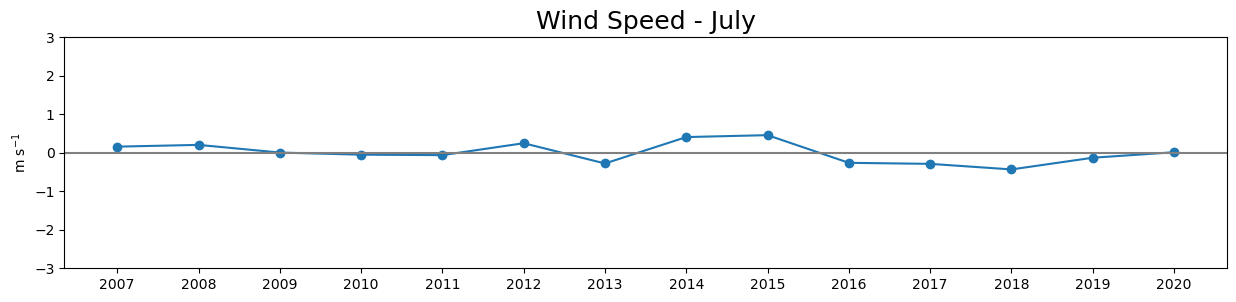

In [114]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[(Jul2007-Jul_Clim),(Jul2008-Jul_Clim),(Jul2009-Jul_Clim),(Jul2010-Jul_Clim),(Jul2011-Jul_Clim),(Jul2012-Jul_Clim),(Jul2013-Jul_Clim),(Jul2014-Jul_Clim),(Jul2015-Jul_Clim),(Jul2016-Jul_Clim),(Jul2017-Jul_Clim),(Jul2018-Jul_Clim),(Jul2019-Jul_Clim),(Jul2020-Jul_Clim)]


ax.plot(x, y,marker='o',label='')

ax.set_title('Wind Speed - July',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(-3,3)
ax.axhline(y=0,color='grey')
ax.set_ylabel('m s$^{-1}$')

### Add PAR data

In [130]:


#years, months, data
monthly_array_PAR_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['PAR']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}


# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = ds.PAR.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_PAR_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['PAR']:
                data[var].append(ds.PAR.isel(deptht=0, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

# Loop through years for wrap files
for year in [2013,2014,2015]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = ds.PAR.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_PAR_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['PAR']:
                data[var].append(ds.PAR.isel(deptht=0, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)



(14, 12)


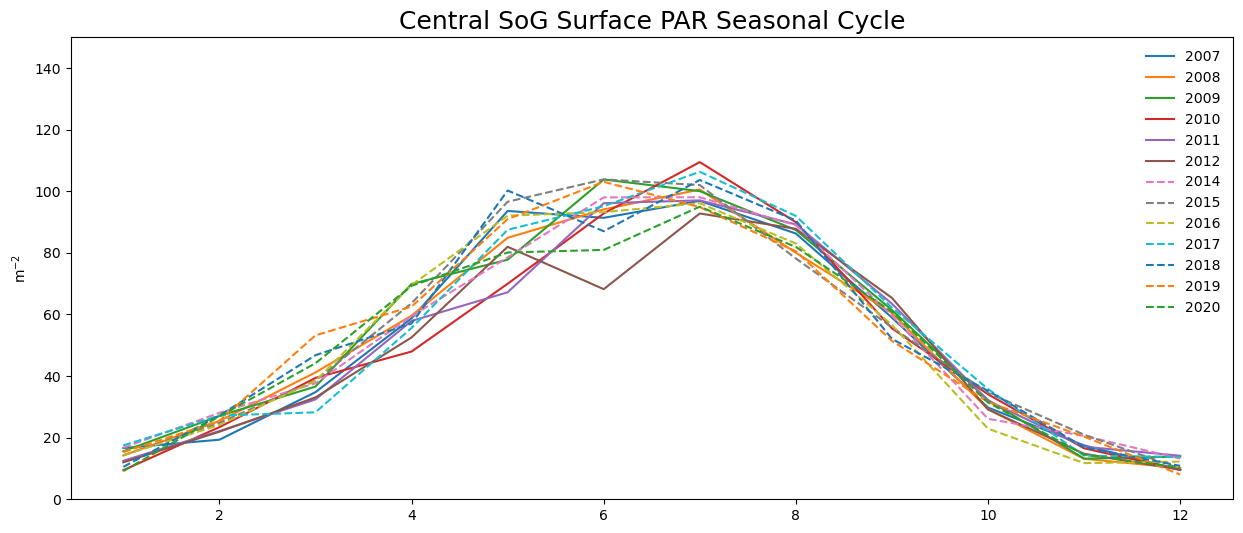

In [97]:
monthly_array_PAR_slice[monthly_array_PAR_slice == 0 ] = np.nan
monthly_array_PAR_slicemean = \
np.nanmean(np.nanmean(monthly_array_PAR_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_PAR_slicemean))


#plot monthly means for 5 years
fig, ax = plt.subplots(figsize=(15, 6))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


for i in range(0,6):
    ax.plot(np.arange(1,13), monthly_array_PAR_slicemean[i,:],label=2007+i)
    ax.set_title('Central SoG PAR Seasonal Cycle',fontsize=18)
    ax.legend(frameon=False)
    ax.set_ylim(40,375)
    ax.set_ylabel('\u03bcmol N')
   
for i in range(7,14):
    ax.plot(np.arange(1,13), monthly_array_PAR_slicemean[i,:],linestyle='--',label=2007+i)
    ax.set_title('Central SoG Surface PAR Seasonal Cycle',fontsize=18)
    ax.legend(frameon=False,bbox_to_anchor=(1, 1))
    ax.set_ylim(0,150)
    ax.set_ylabel('m$^{-2}$')

In [98]:
Mar_PAR_2007=monthly_array_PAR_slicemean[0,2]
Mar_PAR_2008=monthly_array_PAR_slicemean[1,2]
Mar_PAR_2009=monthly_array_PAR_slicemean[2,2]
Mar_PAR_2010=monthly_array_PAR_slicemean[3,2]
Mar_PAR_2011=monthly_array_PAR_slicemean[4,2]
Mar_PAR_2012=monthly_array_PAR_slicemean[5,2]
Mar_PAR_2013=monthly_array_PAR_slicemean[6,2]
Mar_PAR_2014=monthly_array_PAR_slicemean[7,2]
Mar_PAR_2015=monthly_array_PAR_slicemean[8,2]
Mar_PAR_2016=monthly_array_PAR_slicemean[9,2]
Mar_PAR_2017=monthly_array_PAR_slicemean[10,2]
Mar_PAR_2018=monthly_array_PAR_slicemean[11,2]
Mar_PAR_2019=monthly_array_PAR_slicemean[12,2]
Mar_PAR_2020=monthly_array_PAR_slicemean[13,2]

/tmp/ipykernel_1389607/2866997129.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel('Wind Speed (m s$^{-1}$)',Fontsize=15)
/tmp/ipykernel_1389607/2866997129.py:28: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('PAR',Fontsize=15)


Text(0, 0.5, 'PAR')

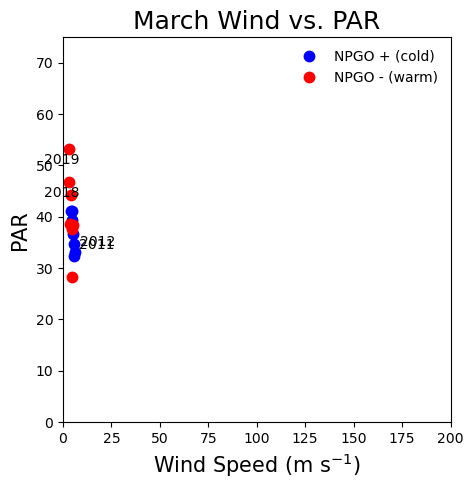

In [99]:
fig, ax = plt.subplots(figsize=(5, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=[Mar2007,Mar2008,Mar2009,Mar2010,Mar2011,Mar2012,Mar2013]
y=[Mar_PAR_2007,Mar_PAR_2008,Mar_PAR_2009,Mar_PAR_2010,Mar_PAR_2011,Mar_PAR_2012,Mar_PAR_2013]
n=[None,None,None,None,2011,2012,None]
n2=[None,None,None,None,2018,2019,None]

x2=[Mar2014,Mar2015,Mar2016,Mar2017,Mar2018,Mar2019,Mar2020]
y2=[Mar_PAR_2014,Mar_PAR_2015,Mar_PAR_2016,Mar_PAR_2017,Mar_PAR_2018,Mar_PAR_2019,Mar_PAR_2020]

ax.plot(x,y,marker='.',linestyle='', markersize=15,color='b',label='NPGO + (cold)');
ax.plot(x2,y2,marker='.',linestyle='', markersize=15,color='r',label='NPGO - (warm)');

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]),xytext=(5, 7),textcoords="offset pixels")
    
for i, txt in enumerate(n2):
    ax.annotate(txt, (x2[i], y2[i]),xytext=(-25,-15),textcoords="offset pixels")

ax.set_title('March Wind vs. PAR',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(00,75)
ax.set_xlim(0,200)
ax.set_xlabel('Wind Speed (m s$^{-1}$)',Fontsize=15)
ax.set_ylabel('PAR',Fontsize=15)

In [100]:
Spr_2007_wind=(Feb2007+Mar2007)/2
Spr_2008_wind=(Jan2008+Feb2008+Mar2008)/3
Spr_2009_wind=(Jan2009+Feb2009+Mar2009)/3
Spr_2010_wind=(Jan2010+Feb2010+Mar2010)/3
Spr_2011_wind=(Jan2011+Feb2011+Mar2011)/3
Spr_2012_wind=(Jan2012+Feb2012+Mar2012)/3
Spr_2013_wind=(Jan2013+Feb2013+Mar2013)/3
Spr_2014_wind=(Jan2014+Feb2014+Mar2014)/3
Spr_2015_wind=(Jan2015+Feb2015+Mar2015)/3
Spr_2016_wind=(Jan2016+Feb2016+Mar2016)/3
Spr_2017_wind=(Jan2017+Feb2017+Mar2017)/3
Spr_2018_wind=(Jan2018+Feb2018+Mar2018)/3
Spr_2019_wind=(Jan2019+Feb2019+Mar2019)/3
Spr_2020_wind=(Jan2020+Feb2020+Mar2020)/3

In [101]:
Spr_2007_PAR=(monthly_array_PAR_slicemean[0,0]+monthly_array_PAR_slicemean[0,1]+monthly_array_PAR_slicemean[0,2])/3
Spr_2008_PAR=(monthly_array_PAR_slicemean[1,0]+monthly_array_PAR_slicemean[1,1]+monthly_array_PAR_slicemean[1,2])/3
Spr_2009_PAR=(monthly_array_PAR_slicemean[2,0]+monthly_array_PAR_slicemean[2,1]+monthly_array_PAR_slicemean[2,2])/3
Spr_2010_PAR=(monthly_array_PAR_slicemean[3,0]+monthly_array_PAR_slicemean[3,1]+monthly_array_PAR_slicemean[3,2])/3
Spr_2011_PAR=(monthly_array_PAR_slicemean[4,0]+monthly_array_PAR_slicemean[4,1]+monthly_array_PAR_slicemean[4,2])/3
Spr_2012_PAR=(monthly_array_PAR_slicemean[5,0]+monthly_array_PAR_slicemean[5,1]+monthly_array_PAR_slicemean[5,2])/3
Spr_2013_PAR=(monthly_array_PAR_slicemean[6,0]+monthly_array_PAR_slicemean[6,1]+monthly_array_PAR_slicemean[6,2])/3
Spr_2014_PAR=(monthly_array_PAR_slicemean[7,0]+monthly_array_PAR_slicemean[7,1]+monthly_array_PAR_slicemean[7,2])/3
Spr_2015_PAR=(monthly_array_PAR_slicemean[8,0]+monthly_array_PAR_slicemean[8,1]+monthly_array_PAR_slicemean[8,2])/3
Spr_2016_PAR=(monthly_array_PAR_slicemean[9,0]+monthly_array_PAR_slicemean[9,1]+monthly_array_PAR_slicemean[9,2])/3
Spr_2017_PAR=(monthly_array_PAR_slicemean[10,0]+monthly_array_PAR_slicemean[10,1]+monthly_array_PAR_slicemean[10,2])/3
Spr_2018_PAR=(monthly_array_PAR_slicemean[11,0]+monthly_array_PAR_slicemean[11,1]+monthly_array_PAR_slicemean[11,2])/3
Spr_2019_PAR=(monthly_array_PAR_slicemean[12,0]+monthly_array_PAR_slicemean[12,1]+monthly_array_PAR_slicemean[12,2])/3
Spr_2020_PAR=(monthly_array_PAR_slicemean[13,0]+monthly_array_PAR_slicemean[13,1]+monthly_array_PAR_slicemean[13,2])/3

No handles with labels found to put in legend.
/tmp/ipykernel_1389607/1607455124.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel('Wind Speed (m s$^{-1}$)',Fontsize=15)
/tmp/ipykernel_1389607/1607455124.py:28: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('PAR',Fontsize=15)


Text(0, 0.5, 'PAR')

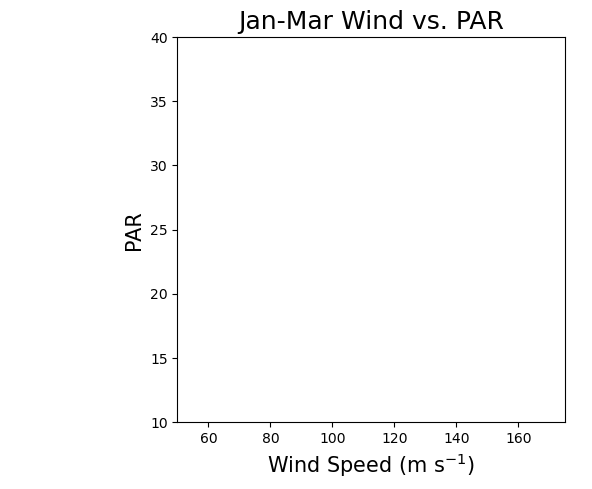

In [102]:
g, ax = plt.subplots(figsize=(5, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=[Spr_2007_wind,Spr_2008_wind,Spr_2009_wind,Spr_2010_wind,Spr_2011_wind,Spr_2012_wind,Spr_2013_wind]
y=[Spr_2007_PAR,Spr_2008_PAR,Spr_2009_PAR,Spr_2010_PAR,Spr_2011_PAR,Spr_2012_PAR,Spr_2013_PAR]
n=[None,None,None,None,2011,2012,None]
n2=[None,None,None,None,2018,2019,None]

x2=[Spr_2014_wind,Spr_2015_wind,Spr_2016_wind,Spr_2017_wind,Spr_2018_wind,Spr_2019_wind,Spr_2020_wind]
y2=[Spr_2014_PAR,Spr_2015_PAR,Spr_2016_PAR,Spr_2017_PAR,Spr_2018_PAR,Spr_2019_PAR,Spr_2020_PAR]

ax.plot(x,y,marker='.',linestyle='', markersize=15,color='b');
ax.plot(x2,y2,marker='.',linestyle='', markersize=15,color='r');

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]),xytext=(5, 7),textcoords="offset pixels")
    
for i, txt in enumerate(n2):
    ax.annotate(txt, (x2[i], y2[i]),xytext=(-25,-15),textcoords="offset pixels")

ax.set_title('Jan-Mar Wind vs. PAR',fontsize=18)
ax.legend(frameon=False,loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylim(10,40)
ax.set_xlim(50,175)
ax.set_xlabel('Wind Speed (m s$^{-1}$)',Fontsize=15)
ax.set_ylabel('PAR',Fontsize=15)

In [103]:
FMA_2007_wind=(Feb2007+Mar2007+Apr2007)/3
FMA_2008_wind=(Feb2008+Mar2008+Apr2008)/3
FMA_2009_wind=(Feb2009+Mar2009+Apr2009)/3
FMA_2010_wind=(Feb2010+Mar2010+Apr2010)/3
FMA_2011_wind=(Feb2011+Mar2011+Apr2011)/3
FMA_2012_wind=(Feb2012+Mar2012+Apr2012)/3
FMA_2013_wind=(Feb2013+Mar2013+Apr2013)/3
FMA_2014_wind=(Feb2014+Mar2014+Apr2014)/3
FMA_2015_wind=(Feb2015+Mar2015+Apr2015)/3
FMA_2016_wind=(Feb2016+Mar2016+Apr2016)/3
FMA_2017_wind=(Feb2017+Mar2017+Apr2017)/3
FMA_2018_wind=(Feb2018+Mar2018+Apr2018)/3
FMA_2019_wind=(Feb2019+Mar2019+Apr2019)/3
FMA_2020_wind=(Feb2020+Mar2020+Apr2020)/3

In [104]:
FMA_2007_PAR=(monthly_array_PAR_slicemean[0,1]+monthly_array_PAR_slicemean[0,2]+monthly_array_PAR_slicemean[0,3])/3
FMA_2008_PAR=(monthly_array_PAR_slicemean[1,1]+monthly_array_PAR_slicemean[1,2]+monthly_array_PAR_slicemean[1,3])/3
FMA_2009_PAR=(monthly_array_PAR_slicemean[2,1]+monthly_array_PAR_slicemean[2,2]+monthly_array_PAR_slicemean[2,3])/3
FMA_2010_PAR=(monthly_array_PAR_slicemean[3,1]+monthly_array_PAR_slicemean[3,2]+monthly_array_PAR_slicemean[3,3])/3
FMA_2011_PAR=(monthly_array_PAR_slicemean[4,1]+monthly_array_PAR_slicemean[4,2]+monthly_array_PAR_slicemean[4,3])/3
FMA_2012_PAR=(monthly_array_PAR_slicemean[5,1]+monthly_array_PAR_slicemean[5,2]+monthly_array_PAR_slicemean[5,3])/3
FMA_2013_PAR=(monthly_array_PAR_slicemean[6,1]+monthly_array_PAR_slicemean[6,2]+monthly_array_PAR_slicemean[6,3])/3
FMA_2014_PAR=(monthly_array_PAR_slicemean[7,1]+monthly_array_PAR_slicemean[7,2]+monthly_array_PAR_slicemean[7,3])/3
FMA_2015_PAR=(monthly_array_PAR_slicemean[8,1]+monthly_array_PAR_slicemean[8,2]+monthly_array_PAR_slicemean[8,3])/3
FMA_2016_PAR=(monthly_array_PAR_slicemean[9,1]+monthly_array_PAR_slicemean[9,2]+monthly_array_PAR_slicemean[9,3])/3
FMA_2017_PAR=(monthly_array_PAR_slicemean[10,1]+monthly_array_PAR_slicemean[10,2]+monthly_array_PAR_slicemean[10,3])/3
FMA_2018_PAR=(monthly_array_PAR_slicemean[11,1]+monthly_array_PAR_slicemean[11,2]+monthly_array_PAR_slicemean[11,3])/3
FMA_2019_PAR=(monthly_array_PAR_slicemean[12,1]+monthly_array_PAR_slicemean[12,2]+monthly_array_PAR_slicemean[12,3])/3
FMA_2020_PAR=(monthly_array_PAR_slicemean[13,1]+monthly_array_PAR_slicemean[13,2]+monthly_array_PAR_slicemean[13,3])/3

No handles with labels found to put in legend.
/tmp/ipykernel_1389607/2853951550.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel('Wind Speed (m s$^{-1}$)',Fontsize=15)
/tmp/ipykernel_1389607/2853951550.py:28: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('PAR',Fontsize=15)


Text(0, 0.5, 'PAR')

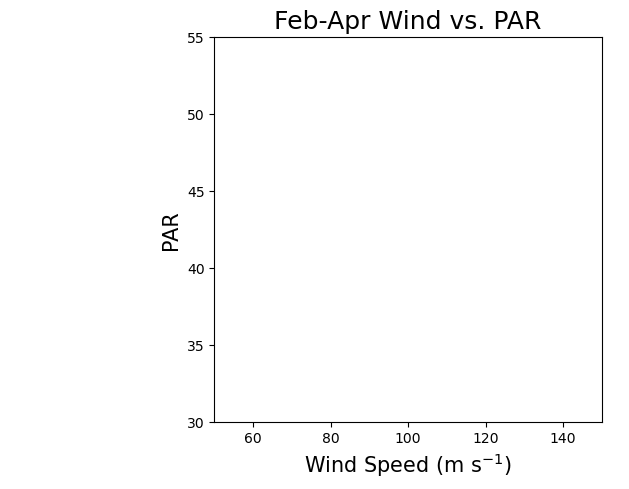

In [105]:
g, ax = plt.subplots(figsize=(5, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=[FMA_2007_wind,FMA_2008_wind,FMA_2009_wind,FMA_2010_wind,FMA_2011_wind,FMA_2012_wind,FMA_2013_wind]
y=[FMA_2007_PAR,FMA_2008_PAR,FMA_2009_PAR,FMA_2010_PAR,FMA_2011_PAR,FMA_2012_PAR,FMA_2013_PAR]
n=[None,None,None,2010,2011,2012,None]
n2=[None,None,None,None,2018,2019,None]

x2=[FMA_2014_wind,FMA_2015_wind,FMA_2016_wind,FMA_2017_wind,FMA_2018_wind,FMA_2019_wind,FMA_2020_wind]
y2=[FMA_2014_PAR,FMA_2015_PAR,FMA_2016_PAR,FMA_2017_PAR,FMA_2018_PAR,FMA_2019_PAR,FMA_2020_PAR]

ax.plot(x,y,marker='.',linestyle='', markersize=15,color='b');
ax.plot(x2,y2,marker='.',linestyle='', markersize=15,color='r');

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]),xytext=(5, 7),textcoords="offset pixels")
    
for i, txt in enumerate(n2):
    ax.annotate(txt, (x2[i], y2[i]),xytext=(-25,-15),textcoords="offset pixels")

ax.set_title('Feb-Apr Wind vs. PAR',fontsize=18)
ax.legend(frameon=False,loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylim(30,55)
ax.set_xlim(50,150)
ax.set_xlabel('Wind Speed (m s$^{-1}$)',Fontsize=15)
ax.set_ylabel('PAR',Fontsize=15)

In [106]:
FM_2007_wind=(Feb2007+Mar2007)/2
FM_2008_wind=(Feb2008+Mar2008)/2
FM_2009_wind=(Feb2009+Mar2009)/2
FM_2010_wind=(Feb2010+Mar2010)/2
FM_2011_wind=(Feb2011+Mar2011)/2
FM_2012_wind=(Feb2012+Mar2012)/2
FM_2013_wind=(Feb2013+Mar2013)/2
FM_2014_wind=(Feb2014+Mar2014)/2
FM_2015_wind=(Feb2015+Mar2015)/2
FM_2016_wind=(Feb2016+Mar2016)/2
FM_2017_wind=(Feb2017+Mar2017)/2
FM_2018_wind=(Feb2018+Mar2018)/2
FM_2019_wind=(Feb2019+Mar2019)/2
FM_2020_wind=(Feb2020+Mar2020)/2

In [107]:
FM_2007_PAR=(monthly_array_PAR_slicemean[0,1]+monthly_array_PAR_slicemean[0,2])/2
FM_2008_PAR=(monthly_array_PAR_slicemean[1,1]+monthly_array_PAR_slicemean[1,2])/2
FM_2009_PAR=(monthly_array_PAR_slicemean[2,1]+monthly_array_PAR_slicemean[2,2])/2
FM_2010_PAR=(monthly_array_PAR_slicemean[3,1]+monthly_array_PAR_slicemean[3,2])/2
FM_2011_PAR=(monthly_array_PAR_slicemean[4,1]+monthly_array_PAR_slicemean[4,2])/2
FM_2012_PAR=(monthly_array_PAR_slicemean[5,1]+monthly_array_PAR_slicemean[5,2])/2
FM_2013_PAR=(monthly_array_PAR_slicemean[6,1]+monthly_array_PAR_slicemean[6,2])/2
FM_2014_PAR=(monthly_array_PAR_slicemean[7,1]+monthly_array_PAR_slicemean[7,2])/2
FM_2015_PAR=(monthly_array_PAR_slicemean[8,1]+monthly_array_PAR_slicemean[8,2])/2
FM_2016_PAR=(monthly_array_PAR_slicemean[9,1]+monthly_array_PAR_slicemean[9,2])/2
FM_2017_PAR=(monthly_array_PAR_slicemean[10,1]+monthly_array_PAR_slicemean[10,2])/2
FM_2018_PAR=(monthly_array_PAR_slicemean[11,1]+monthly_array_PAR_slicemean[11,2])/2
FM_2019_PAR=(monthly_array_PAR_slicemean[12,1]+monthly_array_PAR_slicemean[12,2])/2
FM_2020_PAR=(monthly_array_PAR_slicemean[13,1]+monthly_array_PAR_slicemean[13,2])/2

/tmp/ipykernel_1389607/3347370948.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel('Wind Speed (m s$^{-1}$)',Fontsize=15)
/tmp/ipykernel_1389607/3347370948.py:28: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('PAR',Fontsize=15)


Text(0, 0.5, 'PAR')

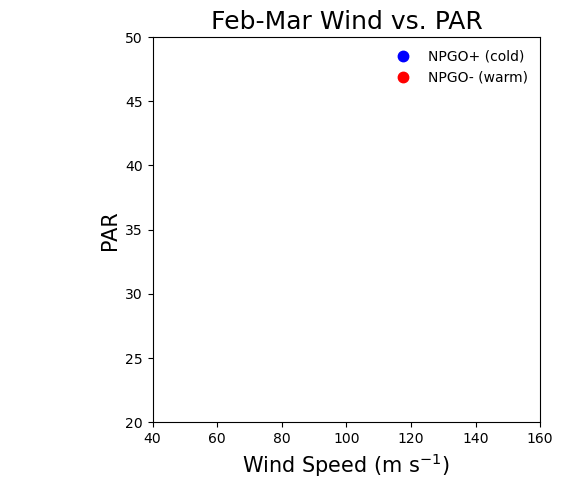

In [108]:
g, ax = plt.subplots(figsize=(5, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=[FM_2007_wind,FM_2008_wind,FM_2009_wind,FM_2010_wind,FM_2011_wind,FM_2012_wind,FM_2013_wind]
y=[FM_2007_PAR,FM_2008_PAR,FM_2009_PAR,FM_2010_PAR,FM_2011_PAR,FM_2012_PAR,FM_2013_PAR]
n=[2007,2008,None,None,2011,2012,None]
n2=[None,None,None,2017,2018,2019,2020]

x2=[FM_2014_wind,FM_2015_wind,FM_2016_wind,FM_2017_wind,FM_2018_wind,FM_2019_wind,FM_2020_wind]
y2=[FM_2014_PAR,FM_2015_PAR,FM_2016_PAR,FM_2017_PAR,FM_2018_PAR,FM_2019_PAR,FM_2020_PAR]

ax.plot(x,y,marker='.',linestyle='', markersize=15,color='b',label='NPGO+ (cold)');
ax.plot(x2,y2,marker='.',linestyle='', markersize=15,color='r',label='NPGO- (warm)');

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]),xytext=(5, 7),textcoords="offset pixels")
    
for i, txt in enumerate(n2):
    ax.annotate(txt, (x2[i], y2[i]),xytext=(-25,-15),textcoords="offset pixels")

ax.set_title('Feb-Mar Wind vs. PAR',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(20,50)
ax.set_xlim(40,160)
ax.set_xlabel('Wind Speed (m s$^{-1}$)',Fontsize=15)
ax.set_ylabel('PAR',Fontsize=15)